# Ryan Code

In [377]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 

In [378]:

#Read in Geographic Data
geographic_data = pd.read_csv(r'Ryan Resources\Geographic_Region_Health_Data.csv')

# Create variable to iterate through "SE" columns in data 
remove_se_columns = [col for col in geographic_data if "SE" in col]

#Use .drop() to remove "SE" columns from data 
geographic_data = geographic_data.drop(columns=remove_se_columns)





#Create an instance variable to store columns 1997 - 2014
column_drop = geographic_data[['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']]


#Use .drop() to remove columns 1997-2014
geographic_data_cleaned = geographic_data.drop(columns=column_drop)


#Rename 'Characteristic' column to 'Geographic Region' and set that column as index 
geographic_data_cleaned = geographic_data_cleaned.rename(columns={'Characteristic': 'Geographic Region'})

geographic_data_cleaned = geographic_data_cleaned.set_index('Geographic Region')

geographic_data_cleaned


 #Transpose data so that the years are now the rows 
geographic_data_transposed = geographic_data_cleaned.transpose()

geographic_data_transposed

#Reset index, set the index as 'index' and rename 'index' to 'Year' so that the years are now the index of the data
geographic_data_reset_index = geographic_data_transposed.reset_index()

geographic_data_set_index = geographic_data_reset_index.set_index('index')

geographic_data_final = geographic_data_set_index.rename_axis('Year')

geographic_data_final


#Append 'Medical Care' on each of the region columns in case this data is concatanated or merged with dataframes that contain the same region names
geographic_data_final = geographic_data_final.rename(columns={col: f"{col}_Medical Care" for col in geographic_data_final.columns})


geographic_data_final


Geographic Region,Northeast_Medical Care,Midwest_Medical Care,South_Medical Care,West_Medical Care
Year,,,,
2015,7.7,9.9,11.0,9.5
2016,6.8,10.1,11.7,8.9
2017,6.8,10.3,11.8,9.3
2018,8.7,11.2,12.6,10.2
2019,8.3,11.6,15.0,10.8


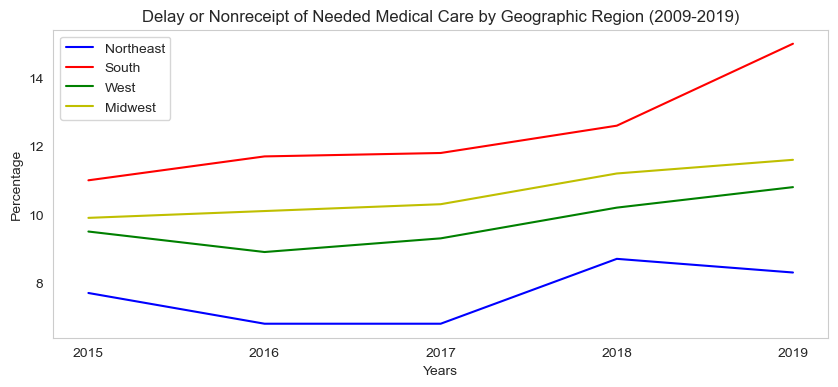

In [379]:
#Create instance variables that store data for each geographic region 

geographic_data_NE = geographic_data_cleaned.loc['Northeast']

geographic_data_south = geographic_data_cleaned.loc['South']
geographic_data_west = geographic_data_cleaned.loc['West']

geographic_data_midwest = geographic_data_cleaned.loc['Midwest']

# iterate through each value in the set index ('Year') and store in an instance variable 
years = [col for col in geographic_data_NE.index]

#Store the row values that are attached to each of the years in the index for each region 
values_ne = geographic_data_NE[years].values

values_south = geographic_data_south[years].values

values_west = geographic_data_west[years].values

values_midwest = geographic_data_midwest[years].values

#Plot the data with necessary information
plt.figure(figsize=[10,4])
plt.plot(years,values_ne,label="Northeast", color='b')
plt.plot(years, values_south, label='South', color='r')
plt.plot(years, values_west, label='West', color='green')
plt.plot(years, values_midwest, label='Midwest', color='y')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.title('Delay or Nonreceipt of Needed Medical Care by Geographic Region (2009-2019)')
plt.legend()
plt.grid()
plt.show()

# Divorce Rate Datasets & Plots

In [380]:
# Read in date state divorced rate file 
state_divorce_data = pd.read_csv(r'Ryan Resources\state-divorce-rates-90-95-00-22.csv')

state_divorce_data.head()

,State,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2001,2000,1995,1990,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,Alabama,3.2,3.6,3.7,3.6,3.7,3.7,3.8,3.9,3.8,...,5.4,5.5,6.0,6.1,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,3.0,3.1,3.2,3.6,3.7,3.6,3.9,4.1,4.0,...,4.3,3.9,5.0,5.5,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,2.3,2.7,2.9,2.9,3.0,3.5,3.4,3.6,3.9,...,4.0,4.6,6.2,6.9,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,3.5,3.6,3.6,4.0,4.1,3.7,3.9,4.8,4.8,...,6.2,6.4,6.3,6.9,NaN,NaN,NaN,NaN,NaN,NaN
4,California,---,---,---,---,---,---,---,---,---,...,---,---,---,4.3,NaN,NaN,NaN,NaN,NaN,NaN


In [381]:
#Read in File 

state_divorce_data = pd.read_csv(r'Ryan Resources\state-divorce-rates-90-95-00-22.csv')

#Drop all columns named "Unnamed"
drop_unnamed_columns = [col for col in state_divorce_data if "Unnamed" in col]

state_divorce_data = state_divorce_data.drop(columns=drop_unnamed_columns)


#Drop an NaNa Values 
state_divorce_data = state_divorce_data.dropna()





#Set Index to 'State'


state_divorce_data = state_divorce_data.set_index("State")

state_divorce_data.head()

#Remove Years 1997 to 2019
state_divorce_data_cleaned = state_divorce_data.iloc[:,3:8]



state_divorce_data_cleaned.head()

,2019,2018,2017,2016,2015
State,,,,,
Alabama,3.6,3.7,3.7,3.8,3.9
Alaska,3.6,3.7,3.6,3.9,4.1
Arizona,2.9,3.0,3.5,3.4,3.6
Arkansas,4.0,4.1,3.7,3.9,4.8
California,---,---,---,---,---


In [382]:
#Create a dictionary to store states into regions 
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'] } 

#create function that iterates through states dataframe and attaches region name to the state in the regions dictionary
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'

#Append the region in the regions dictionary to each state via .map()
state_divorce_data_cleaned['Region'] = state_divorce_data_cleaned.index.map(get_region)

#Group the data by Region and State
geographic_divorce_data = state_divorce_data_cleaned.groupby(['Region','State']).sum()

geographic_divorce_data.head()

2019 2018 2017 2016 2015
Region  State                            
Midwest Illinois  1.3  1.5  1.9  2.2  2.2
        Indiana   ---  ---  ---  ---  ---
        Iowa      2.3  2.2  2.0  1.3  1.2
        Kansas    2.3  2.3  2.4  2.7  2.8
        Michigan  2.3  2.8  2.8  2.9  3.0

In [383]:

#Change all values in the years columns to floats and drop any NA's 
for col in geographic_divorce_data.columns:

    if col != 'State':
        geographic_divorce_data[col] = pd.to_numeric(geographic_divorce_data[col], errors= 'coerce')

   
geographic_divorce_data = geographic_divorce_data.dropna()


geographic_divorce_data.head()

2019  2018  2017  2016  2015
Region  State                                 
Midwest Illinois   1.3   1.5   1.9   2.2   2.2
        Iowa       2.3   2.2   2.0   1.3   1.2
        Kansas     2.3   2.3   2.4   2.7   2.8
        Michigan   2.3   2.8   2.8   2.9   3.0
        Missouri   2.9   3.0   3.1   3.3   3.2

Create Pivot Tables for each year of Regional Divorce Data (2015-2019)

In [384]:
#Create Pivot Tables for each Region by Year

pivot_divorce_2015 = pd.pivot_table(geographic_divorce_data,values='2015', columns='Region',  aggfunc='mean')

pivot_divorce_2016 = pd.pivot_table(geographic_divorce_data,values='2016', columns='Region', aggfunc='mean')

pivot_divorce_2017 = pd.pivot_table(geographic_divorce_data,values='2017', columns='Region', aggfunc='mean')

pivot_divorce_2018 = pd.pivot_table(geographic_divorce_data,values='2018', columns='Region', aggfunc='mean')

pivot_divorce_2019 = pd.pivot_table(geographic_divorce_data,values='2019', columns='Region', aggfunc='mean')

#Concatanate Pivot Tables 

divorce_pivot_combined = pd.concat([pivot_divorce_2015, pivot_divorce_2016, pivot_divorce_2017, pivot_divorce_2018, pivot_divorce_2019])



#Reset Index 

divorce_pivot_reset = divorce_pivot_combined.reset_index()


#Set created 'index' as Index

divorce_pivot_set_index = divorce_pivot_reset.set_index('index')

#Rename 'index' as 'Year 
divorce_pivot_final = divorce_pivot_set_index.rename_axis("Year")

#Append to each columns "_Divorce Rates" to differentiate between Region columns if/when combined into a single DataFrame  
divorce_pivot_final = divorce_pivot_final.rename(columns={col: f"{col}_Divorce Rates" for col in divorce_pivot_final.columns})

divorce_pivot_final

Region,Midwest_Divorce Rates,Northeast_Divorce Rates,Other_Divorce Rates,South_Divorce Rates,West_Divorce Rates
Year,,,,,
2015,2.67,2.955556,2.8,3.480000,3.80
2016,2.65,2.911111,2.7,3.340000,3.70
2017,2.57,2.788889,2.5,3.133333,3.60
2018,2.53,2.822222,2.5,3.093333,3.55
2019,2.40,2.644444,2.4,3.120000,3.42


Summary Statistics for the Regional Divorce Data 

In [385]:
#Run Summary Statistics on Divorce Pivot Table 
divorce_pivot_final.describe()

Region,Midwest_Divorce Rates,Northeast_Divorce Rates,Other_Divorce Rates,South_Divorce Rates,West_Divorce Rates
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2.564000,2.824444,2.580000,3.233333,3.614000
std,0.108074,0.120800,0.164317,0.169312,0.144845
min,2.400000,2.644444,2.400000,3.093333,3.420000
25%,2.530000,2.788889,2.500000,3.120000,3.550000
50%,2.570000,2.822222,2.500000,3.133333,3.600000
75%,2.650000,2.911111,2.700000,3.340000,3.700000
max,2.670000,2.955556,2.800000,3.480000,3.800000


Plot with All Divorce Rates 

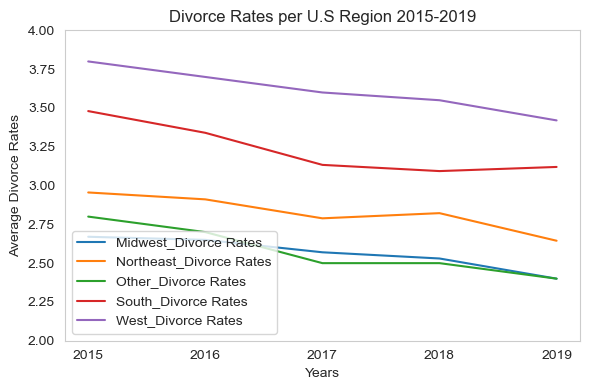

In [386]:
#Plot all Regional Divorce Rates 

divorce_pivot_final.plot(figsize=(6,4))

# Set Y-Axis Limitations 
plt.ylim(2,4)

#Add a Title 
plt.title("Divorce Rates per U.S Region 2015-2019")

#Add X and Y Labels 
plt.xlabel("Years")
plt.ylabel("Average Divorce Rates")

#Add Grid 
plt.grid()

#Add Legend 
plt.legend(loc='lower left')

#Tighten up the Layout 
plt.tight_layout()

#Show Plot 
plt.show()

# State Marriage Dataset and Plots

In [387]:

#Read in Marriage Rate Data 
marriage_state_data = pd.read_csv(r'Ryan Resources\state-marriage-rates-90-95-00-22.csv')

#Iterate through columns and store any containing "Unnamed" in an instance variable 
delete_unnamed = [col for col in marriage_state_data if "Unnamed" in col]


#Drop columns contained in the 'delete_unnamed' variable 
marriage_state_data = marriage_state_data.drop(columns=delete_unnamed)




#Set index as 'State'
marriage_state_data = marriage_state_data.set_index('State')

#Rename "California 1" to "California 1" so that later it can be sorted into its proper region 
marriage_state_data = marriage_state_data.rename(index={"California 1": "California"})

marriage_state_data




#Reverse the order of the columns so that it procees chronologically from left to right in
#the dataframe
marriage_state_data = marriage_state_data[marriage_state_data.columns[::-1]]


#Exclude any years before 2009 and after 2019
marriage_state_data_cleaned = marriage_state_data.iloc[:,11:22]

marriage_state_data_cleaned.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
State,,,,,,,,,,,
Alabama,8.3,8.2,8.4,8.2,7.8,7.8,7.4,7.1,7.0,6.8,6.7
Alaska,7.8,8.0,7.8,7.2,7.3,7.5,7.4,7.1,6.9,6.7,6.5
Arizona,5.6,5.9,5.7,5.6,5.4,5.8,5.9,5.9,5.8,5.5,5.3
Arkansas,10.7,10.8,10.4,10.9,9.8,10.1,10.0,9.9,9.5,8.9,8.4
California,5.8,5.8,5.8,6.0,6.5,6.4,6.2,6.5,6.3,6.0,5.7


Adding Region Column to the Dataset and grouping by Region and State

In [388]:
#Create a dictionary to store states into regions 

regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'] } 

#create function that iterates through states dataframe and attaches region name to the state in the regions dictionary

def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'

#Append the region in the regions dictionary to each state via .map()

marriage_state_data_cleaned['Region'] = marriage_state_data.index.map(get_region)


#Group the data by Region and State

geographic_marriage_data = marriage_state_data_cleaned.groupby(['Region','State']).sum()

geographic_marriage_data.head()

2009  2010  2011  2012 2013 2014  2015  2016  2017  2018  \
Region  State                                                                
Midwest Illinois   5.7   5.7   5.6   5.8  5.4  6.2   5.9   5.8   6.0   5.5   
        Indiana    7.9   6.3   6.8   6.7  6.6  7.1   6.9   6.9   6.9   6.6   
        Iowa       7.0   6.9   6.7   6.8  7.4  6.9   6.3   6.1   6.2   5.7   
        Kansas     6.4   6.4   6.3   6.3  6.0  6.1   5.9   6.2   6.0   5.4   
        Michigan   5.4   5.5   5.7   5.6  5.8  5.8   6.0   5.9   5.9   5.7   

                  2019  
Region  State           
Midwest Illinois   5.2  
        Indiana    6.2  
        Iowa       5.4  
        Kansas     5.3  
        Michigan   5.2

Change DataType from Object to Float and DROP NA's

In [389]:

#Change all values in the years columns to floats and drop any NA's 

for col in geographic_marriage_data.columns:

    if col != 'State':
        geographic_marriage_data[col] = pd.to_numeric(geographic_marriage_data[col], errors= 'coerce')

   
geographic_marriage_data = geographic_marriage_data.dropna()


geographic_marriage_data.head()

2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  \
Region  State                                                                  
Midwest Illinois   5.7   5.7   5.6   5.8   5.4   6.2   5.9   5.8   6.0   5.5   
        Indiana    7.9   6.3   6.8   6.7   6.6   7.1   6.9   6.9   6.9   6.6   
        Iowa       7.0   6.9   6.7   6.8   7.4   6.9   6.3   6.1   6.2   5.7   
        Kansas     6.4   6.4   6.3   6.3   6.0   6.1   5.9   6.2   6.0   5.4   
        Michigan   5.4   5.5   5.7   5.6   5.8   5.8   6.0   5.9   5.9   5.7   

                  2019  
Region  State           
Midwest Illinois   5.2  
        Indiana    6.2  
        Iowa       5.4  
        Kansas     5.3  
        Michigan   5.2

Combined Pivot Data for Marriage Rates based on Geographic Region 

In [390]:
#Create Pivot Tables for each Region by Year

pivot_marriage_2015 = pd.pivot_table(geographic_marriage_data,values='2015', columns='Region',  aggfunc='mean')
pivot_marriage_2016 = pd.pivot_table(geographic_marriage_data,values='2016', columns='Region',  aggfunc='mean')
pivot_marriage_2017 = pd.pivot_table(geographic_marriage_data,values='2017', columns='Region',  aggfunc='mean')
pivot_marriage_2018 = pd.pivot_table(geographic_marriage_data,values='2018', columns='Region',  aggfunc='mean')
pivot_marriage_2019 = pd.pivot_table(geographic_marriage_data,values='2019', columns='Region',  aggfunc='mean')


#Concatanate Pivot Tables 

pivot_marriage_combined = pd.concat([pivot_marriage_2015, pivot_marriage_2016, pivot_marriage_2017, pivot_marriage_2018, pivot_marriage_2019])

#Reset Index 

marriage_pivot_reset_index = pivot_marriage_combined.reset_index()


#Set created 'index' as Index

marriage_pivot_set_index = marriage_pivot_reset_index.set_index('index')

#Rename 'index' as 'Year 

marriage_pivot_final = marriage_pivot_set_index.rename_axis('Year')

#Append to each columns "_Divorce Rates" to differentiate between Region columns if/when combined into a single DataFrame  

marriage_pivot_final = marriage_pivot_final.rename(columns={col: f"{col}_Marriage Rates" for col in marriage_pivot_final.columns})

marriage_pivot_final

Region,Midwest_Marriage Rates,Northeast_Marriage Rates,Other_Marriage Rates,South_Marriage Rates,West_Marriage Rates
Year,,,,,
2015,6.225000,6.466667,8.2,7.313333,9.546154
2016,6.225000,6.666667,8.1,7.126667,9.415385
2017,6.116667,6.566667,8.2,6.973333,9.276923
2018,5.825000,6.455556,7.8,6.553333,9.038462
2019,5.475000,6.144444,7.8,6.233333,8.692308


Regional Marriage Rate Data Summary Statistics 

In [391]:
#Run Summary Statistics for Marriage Pivot Table Data

marriage_pivot_final.describe()

Region,Midwest_Marriage Rates,Northeast_Marriage Rates,Other_Marriage Rates,South_Marriage Rates,West_Marriage Rates
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,5.973333,6.460000,8.020000,6.840000,9.193846
std,0.323093,0.196041,0.204939,0.439949,0.337560
min,5.475000,6.144444,7.800000,6.233333,8.692308
25%,5.825000,6.455556,7.800000,6.553333,9.038462
50%,6.116667,6.466667,8.100000,6.973333,9.276923
75%,6.225000,6.566667,8.200000,7.126667,9.415385
max,6.225000,6.666667,8.200000,7.313333,9.546154


All Regional Marriage Rates Plot

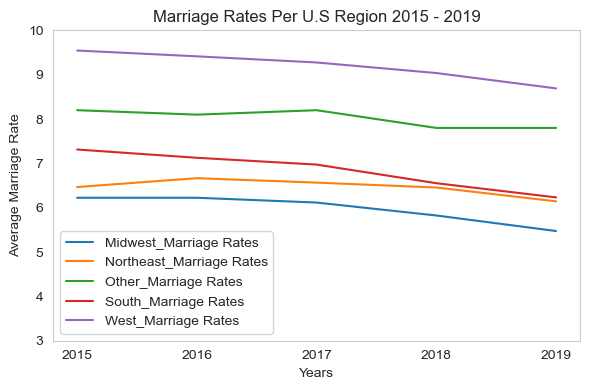

In [392]:
#Plot Marriage Pivot Table Data 

marriage_pivot_final.plot(figsize=[6,4])
plt.title('Marriage Rates Per U.S Region 2015 - 2019')
plt.xlabel("Years")
plt.ylabel("Average Marriage Rate")
plt.ylim(3,10)
plt.grid()
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

# Time Series (Prophet) Data for Marriage (Was not able to execute - Please disregard)

In [555]:
# Midwest Time Series 
marriage_pivot_midwest = marriage_pivot_final[['Midwest_Marriage Rates']].copy()

marriage_pivot_midwest

Region,Midwest_Marriage Rates
Year,
2015,6.225000
2016,6.225000
2017,6.116667
2018,5.825000
2019,5.475000


In [556]:
# Midwest Time Series 
marriage_pivot_northeast = marriage_pivot_final[['Northeast_Marriage Rates']].copy()

marriage_pivot_northeast

Region,Northeast_Marriage Rates
Year,
2015,6.466667
2016,6.666667
2017,6.566667
2018,6.455556
2019,6.144444


In [557]:
# Midwest Time Series 

marriage_pivot_west = marriage_pivot_final[['West_Marriage Rates']].copy()

marriage_pivot_west

Region,West_Marriage Rates
Year,
2015,9.546154
2016,9.415385
2017,9.276923
2018,9.038462
2019,8.692308


In [558]:
# Midwest Time Series 

marriage_pivot_south = marriage_pivot_final[['South_Marriage Rates']].copy()

marriage_pivot_south

Region,South_Marriage Rates
Year,
2015,7.313333
2016,7.126667
2017,6.973333
2018,6.553333
2019,6.233333


# Plotting Marriage vs. Divorce vs. Medical Care Data Together

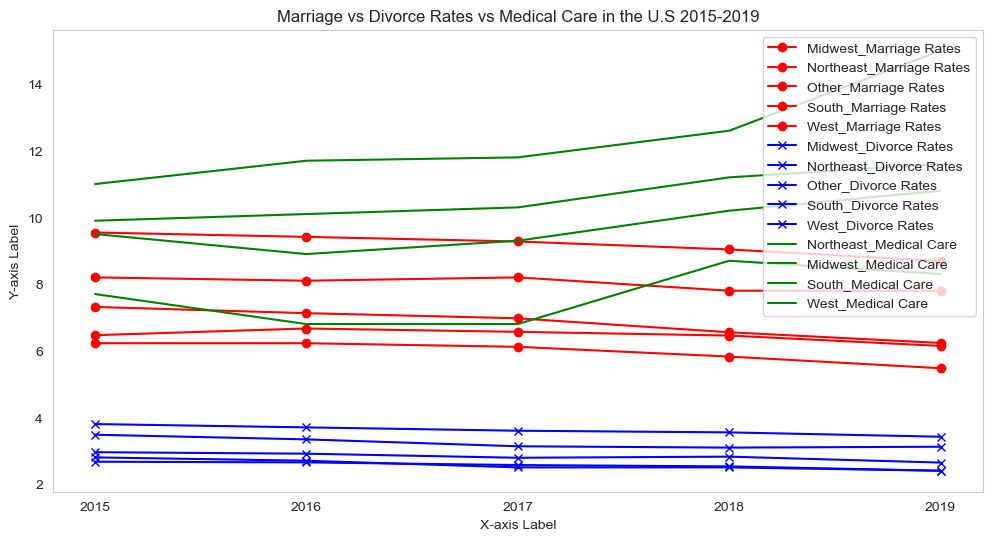

In [397]:
#Create a subplot for the data 

fig, ax = plt.subplots(figsize=(12, 6))

# Plot data from each dataframe
marriage_pivot_final.plot(ax=ax, label='Marriage Rates', marker='o', color='r')
divorce_pivot_final.plot(ax=ax, label='Divorce Rates', marker='x', color='b')
geographic_data_final.plot(ax=ax, label='Medical', color='g')

# Customize the plot
plt.title('Marriage vs Divorce Rates vs Medical Care in the U.S 2015-2019')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.grid()
plt.legend()

# Display the plot
plt.show()

Merging Marriage and Divorce Rates Dataframes

In [398]:
#Merge Marriage and Divorce Data

marriage_divorce = pd.merge(marriage_pivot_final, divorce_pivot_final, on='Year')
marriage_divorce

Region,Midwest_Marriage Rates,Northeast_Marriage Rates,Other_Marriage Rates,South_Marriage Rates,West_Marriage Rates,Midwest_Divorce Rates,Northeast_Divorce Rates,Other_Divorce Rates,South_Divorce Rates,West_Divorce Rates
Year,,,,,,,,,,
2015,6.225000,6.466667,8.2,7.313333,9.546154,2.67,2.955556,2.8,3.480000,3.80
2016,6.225000,6.666667,8.1,7.126667,9.415385,2.65,2.911111,2.7,3.340000,3.70
2017,6.116667,6.566667,8.2,6.973333,9.276923,2.57,2.788889,2.5,3.133333,3.60
2018,5.825000,6.455556,7.8,6.553333,9.038462,2.53,2.822222,2.5,3.093333,3.55
2019,5.475000,6.144444,7.8,6.233333,8.692308,2.40,2.644444,2.4,3.120000,3.42


Marriage vs Divorce in US. West

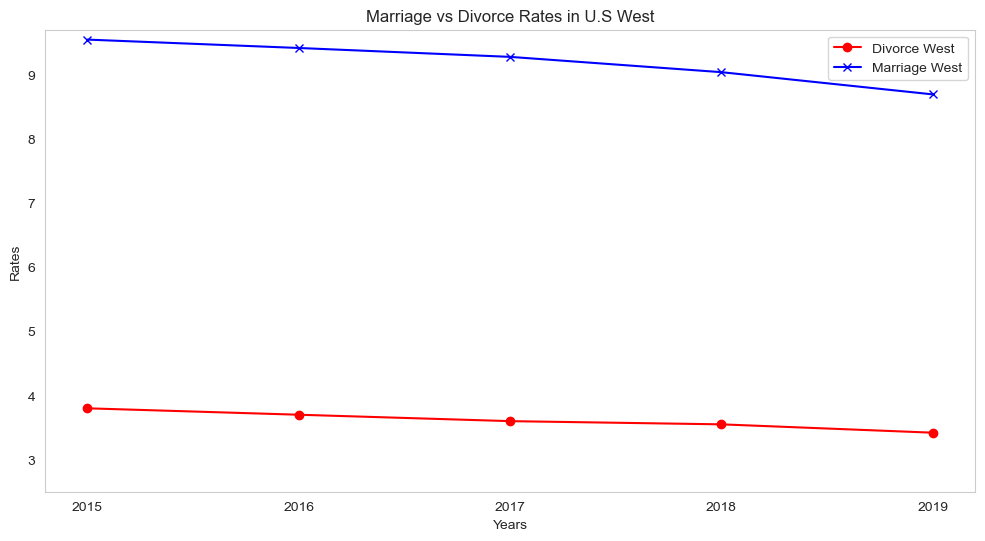

In [399]:
#Plot Data for West Marriage and Divorce Rates 

divorce_west = marriage_divorce['West_Divorce Rates']
marriage_west = marriage_divorce['West_Marriage Rates']
fig, ax = plt.subplots(figsize=(12, 6))
divorce_west.plot(ax=ax, label='Divorce West', marker='o', color='r')
marriage_west.plot(ax=ax, label='Marriage West', marker='x', color='b')

plt.title('Marriage vs Divorce Rates in U.S West')
plt.xlabel('Years')
plt.ylabel('Rates')
plt.ylim(2.5,9.7)
plt.grid()
plt.legend()
plt.show()

Northeast Marriage vs Divorce Rates Plot

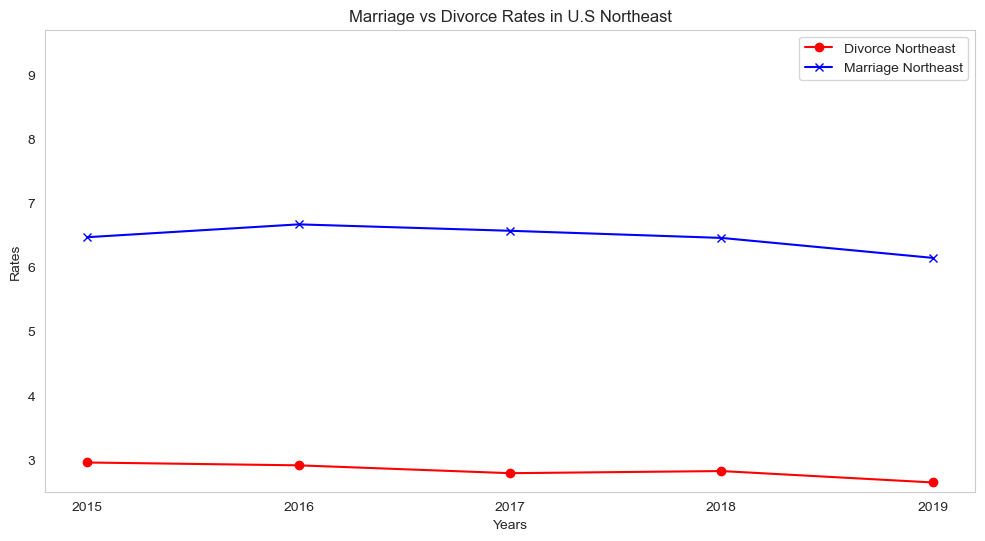

In [400]:
#Plot Marriage vs Divorce Rates in Northeast 

divorce_northeast = marriage_divorce['Northeast_Divorce Rates']
marriage_northeast = marriage_divorce['Northeast_Marriage Rates']
fig, ax = plt.subplots(figsize=(12, 6))
divorce_northeast.plot(ax=ax, label='Divorce Northeast', marker='o', color='r')
marriage_northeast.plot(ax=ax, label='Marriage Northeast', marker='x', color='b')

plt.title('Marriage vs Divorce Rates in U.S Northeast')
plt.xlabel('Years')
plt.ylabel('Rates')
plt.ylim(2.5,9.7)
plt.grid()
plt.legend()
plt.show()

Marriage vs Divorce Rates in the U.S Midwest

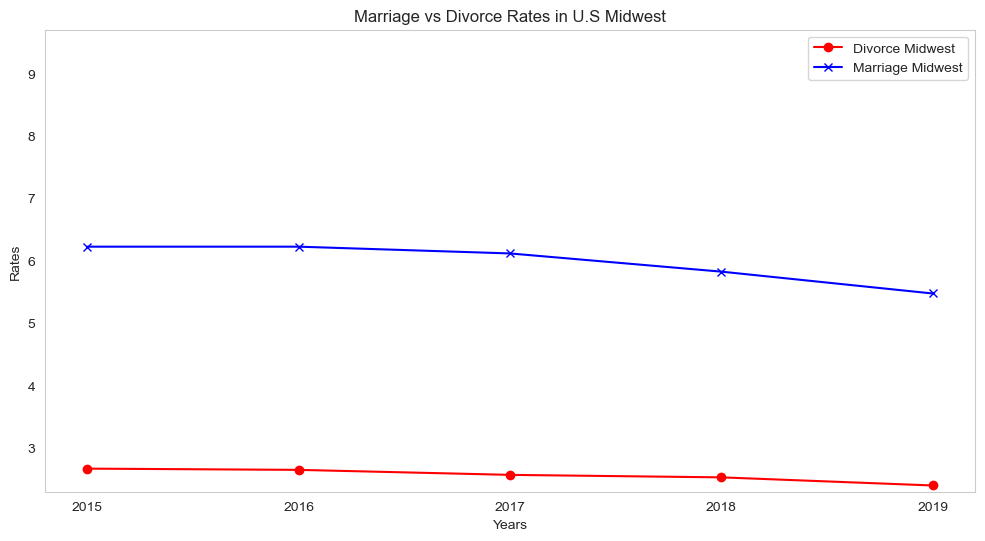

In [401]:
#Plot Marriage vs Divorce Rates in the U.S Midwest 

divorce_midwest = marriage_divorce['Midwest_Divorce Rates']
marriage_midwest = marriage_divorce['Midwest_Marriage Rates']
fig, ax = plt.subplots(figsize=(12, 6))
divorce_midwest.plot(ax=ax, label='Divorce Midwest', marker='o', color='r')
marriage_midwest.plot(ax=ax, label='Marriage Midwest', marker='x', color='b')

plt.title('Marriage vs Divorce Rates in U.S Midwest')
plt.xlabel('Years')
plt.ylabel('Rates')
plt.ylim(2.3,9.7)
plt.grid()
plt.legend()
plt.show()

Marriage vs Divorce Rates in the U.S South

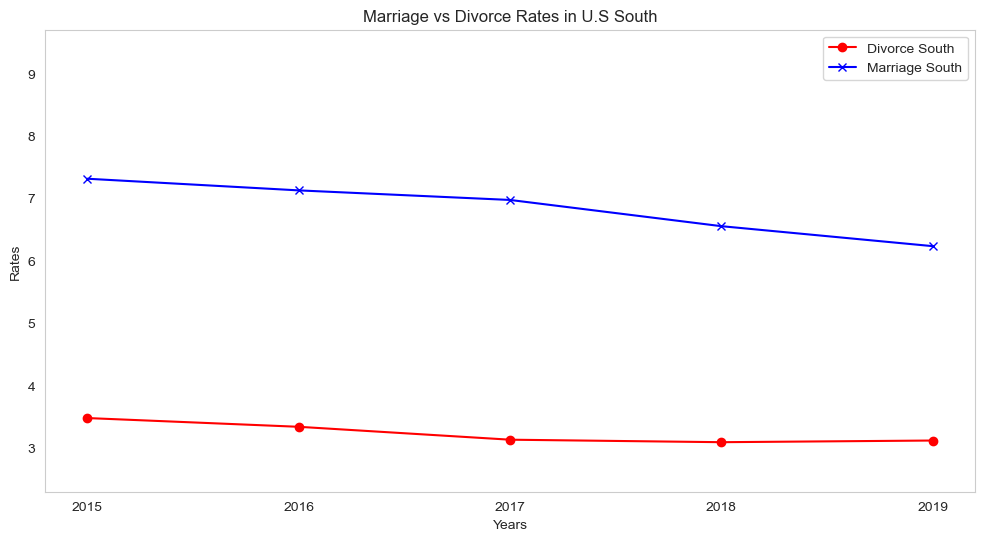

In [402]:
#Plot Marriage vs Divorce Rates in the U.S South 

divorce_south = marriage_divorce['South_Divorce Rates']
marriage_south = marriage_divorce['South_Marriage Rates']
fig, ax = plt.subplots(figsize=(12, 6))
divorce_south.plot(ax=ax, label='Divorce South', marker='o', color='r')
marriage_south.plot(ax=ax, label='Marriage South', marker='x', color='b')

plt.title('Marriage vs Divorce Rates in U.S South')
plt.xlabel('Years')
plt.ylabel('Rates')
plt.ylim(2.3,9.7)
plt.grid()
plt.legend()
plt.show()

Marriage and Divorce Summary Statistics

In [403]:
#Marriage and Divorce Summary Statistics

marriage_divorce.describe()

Region,Midwest_Marriage Rates,Northeast_Marriage Rates,Other_Marriage Rates,South_Marriage Rates,West_Marriage Rates,Midwest_Divorce Rates,Northeast_Divorce Rates,Other_Divorce Rates,South_Divorce Rates,West_Divorce Rates
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,5.973333,6.460000,8.020000,6.840000,9.193846,2.564000,2.824444,2.580000,3.233333,3.614000
std,0.323093,0.196041,0.204939,0.439949,0.337560,0.108074,0.120800,0.164317,0.169312,0.144845
min,5.475000,6.144444,7.800000,6.233333,8.692308,2.400000,2.644444,2.400000,3.093333,3.420000
25%,5.825000,6.455556,7.800000,6.553333,9.038462,2.530000,2.788889,2.500000,3.120000,3.550000
50%,6.116667,6.466667,8.100000,6.973333,9.276923,2.570000,2.822222,2.500000,3.133333,3.600000
75%,6.225000,6.566667,8.200000,7.126667,9.415385,2.650000,2.911111,2.700000,3.340000,3.700000
max,6.225000,6.666667,8.200000,7.313333,9.546154,2.670000,2.955556,2.800000,3.480000,3.800000


Marriage and Divorce IQR Data

In [404]:
#Marriage and Divorce IQR Data 

south_divorce_rates = marriage_divorce['South_Divorce Rates']
Q1 = south_divorce_rates.quantile(0.25)
median_south_divorce = south_divorce_rates.quantile(0.5)
Q3 = south_divorce_rates.quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 = {round(Q1,3)}")
print(f"Median = {round(median_south_divorce,3)}")
print(f"Q3 = {round(Q3,3)}")

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"Value may be an outlier if below : {round(lower_bound,3)}")
print(f"Value may be an outlier if above: {round(upper_bound,3)}")

Q1 = 3.12
Median = 3.133
Q3 = 3.34
Value may be an outlier if below : 2.79
Value may be an outlier if above: 3.67


# Plot Marriage and/or Divorce Data with Access to Healthcare Data 

In [405]:
#Merge Marriage/Divorce Data with Geographic Medical Care Data 

healthcare_marriage_divorce = pd.merge(marriage_divorce, geographic_data_final, on='Year')

healthcare_marriage_divorce

,Midwest_Marriage Rates,Northeast_Marriage Rates,Other_Marriage Rates,South_Marriage Rates,West_Marriage Rates,Midwest_Divorce Rates,Northeast_Divorce Rates,Other_Divorce Rates,South_Divorce Rates,West_Divorce Rates,Northeast_Medical Care,Midwest_Medical Care,South_Medical Care,West_Medical Care
Year,,,,,,,,,,,,,,
2015,6.225000,6.466667,8.2,7.313333,9.546154,2.67,2.955556,2.8,3.480000,3.80,7.7,9.9,11.0,9.5
2016,6.225000,6.666667,8.1,7.126667,9.415385,2.65,2.911111,2.7,3.340000,3.70,6.8,10.1,11.7,8.9
2017,6.116667,6.566667,8.2,6.973333,9.276923,2.57,2.788889,2.5,3.133333,3.60,6.8,10.3,11.8,9.3
2018,5.825000,6.455556,7.8,6.553333,9.038462,2.53,2.822222,2.5,3.093333,3.55,8.7,11.2,12.6,10.2
2019,5.475000,6.144444,7.8,6.233333,8.692308,2.40,2.644444,2.4,3.120000,3.42,8.3,11.6,15.0,10.8


Divorce vs Marriage vs Medical Care Rates Data Plots

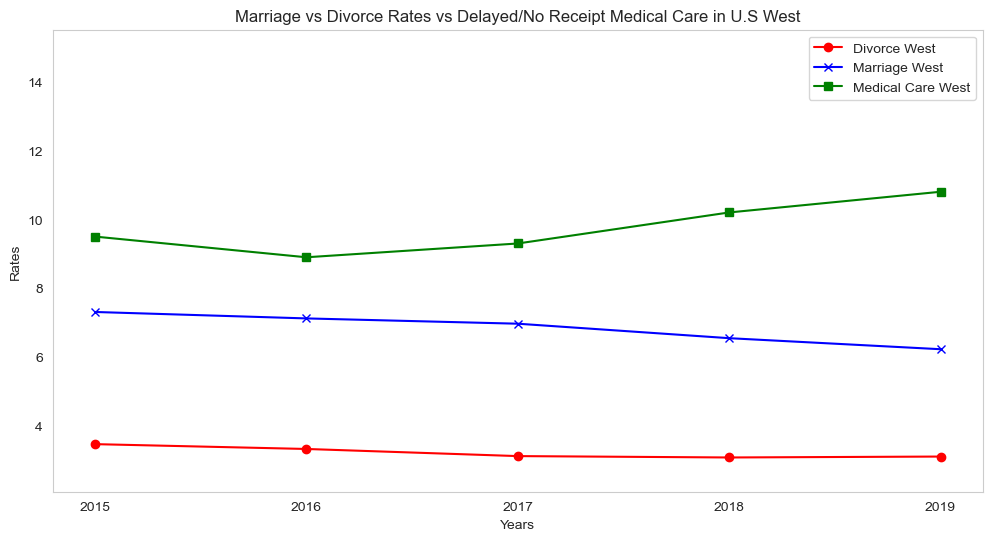

In [406]:
#Plot Divorce vs Marriage vs Medical Care Rates data for the U.S West

#Parse DataFrame by Region (West)
divorce_west = healthcare_marriage_divorce['West_Divorce Rates']
marriage_west = healthcare_marriage_divorce['West_Marriage Rates']
healthcare_west = healthcare_marriage_divorce['West_Medical Care']

#Plot Data 
fig, ax = plt.subplots(figsize=(12, 6))
divorce_south.plot(ax=ax, label='Divorce West', marker='o', color='r')
marriage_south.plot(ax=ax, label='Marriage West', marker='x', color='b')
healthcare_west.plot(ax=ax, label='Medical Care West', marker='s', color='g')

#Add Title and Labels 
plt.title('Marriage vs Divorce Rates vs Delayed/No Receipt Medical Care in U.S West')
plt.xlabel('Years')
plt.ylabel('Rates')

#Set Y-Axis Limits 
plt.ylim(2.1, 15.5)

#Add Grid Layout & Legend 
plt.grid()
plt.legend()

#Show Graph 
plt.show()

West Correlation Data 

In [407]:
#Merge West Divorce and Marriage Data 
west_data_part = pd.merge(divorce_west, marriage_west, on='Year')

#Merge West Divorce and Marriage Data with Healthcare Data 
west_data_total = pd.merge(west_data_part, healthcare_west, on='Year')

west_data_total

# Run a correlation on the merged West Data 
west_correlation = west_data_total.corr()

west_correlation

,West_Divorce Rates,West_Marriage Rates,West_Medical Care
West_Divorce Rates,1.000000,0.974876,-0.788470
West_Marriage Rates,0.974876,1.000000,-0.890635
West_Medical Care,-0.788470,-0.890635,1.000000


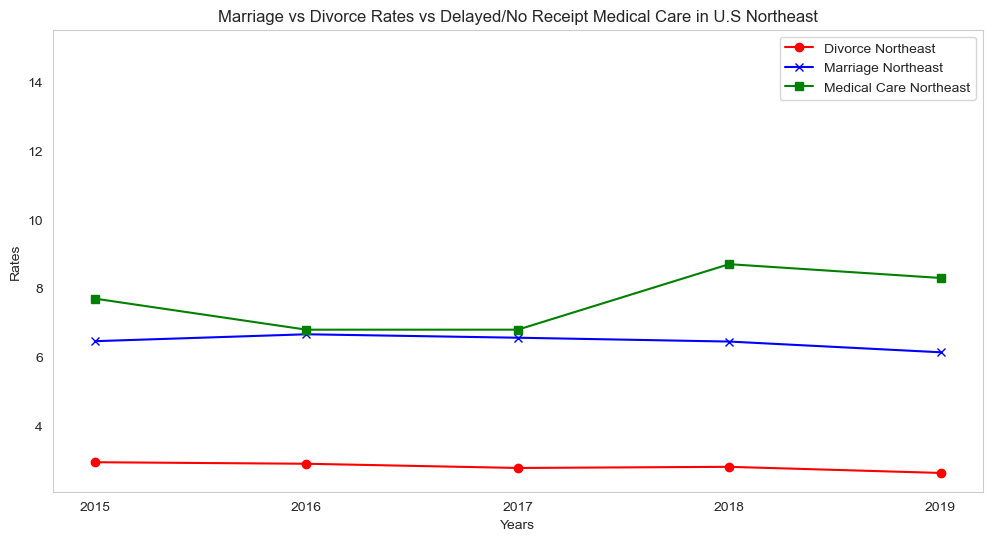

In [408]:
#Plot Divorce vs Marriage vs Medical Care Rates data for the U.S Northeast 


#Parse DataFrame by Region (Northeast)
divorce_northeast = healthcare_marriage_divorce['Northeast_Divorce Rates']
marriage_northeast = healthcare_marriage_divorce['Northeast_Marriage Rates']
healthcare_northeast = healthcare_marriage_divorce['Northeast_Medical Care']

#Plot Data 
fig, ax = plt.subplots(figsize=(12, 6))
divorce_northeast.plot(ax=ax, label='Divorce Northeast', marker='o', color='r')
marriage_northeast.plot(ax=ax, label='Marriage Northeast', marker='x', color='b')
healthcare_northeast.plot(ax=ax, label='Medical Care Northeast', marker='s', color='g')

#Add Title and Labels 
plt.title('Marriage vs Divorce Rates vs Delayed/No Receipt Medical Care in U.S Northeast')
plt.xlabel('Years')
plt.ylabel('Rates')

#Set Y-Axis Limits 
plt.ylim(2.1, 15.5)

#Add Grid Layout & Legend 
plt.grid()
plt.legend()

#Show Graph 
plt.show()

Northeast Correlation Data

In [409]:
#Merge Northeast Divorce and Marriage Data 
northeast_data_part = pd.merge(divorce_northeast, marriage_northeast, on='Year')

#Merge Northeast Divorce and Marriage Data with Healthcare Data 
northeast_data_total = pd.merge(northeast_data_part, healthcare_northeast, on='Year')

northeast_data_total

# Run a correlation on the merged Northeast Data 
northeast_correlation = northeast_data_total.corr()

northeast_correlation

,Northeast_Divorce Rates,Northeast_Marriage Rates,Northeast_Medical Care
Northeast_Divorce Rates,1.000000,0.757995,-0.375079
Northeast_Marriage Rates,0.757995,1.000000,-0.703887
Northeast_Medical Care,-0.375079,-0.703887,1.000000


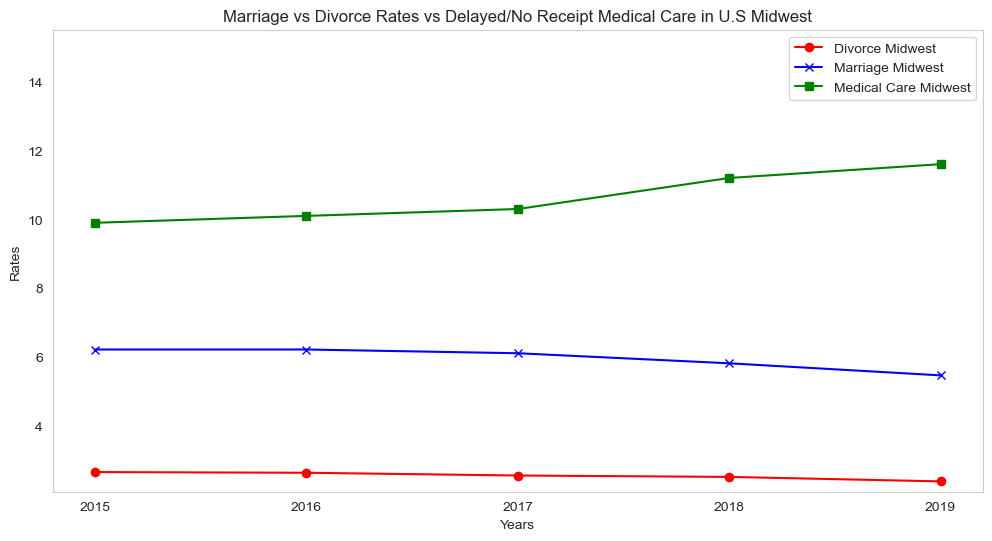

In [410]:
#Plot Divorce vs Marriage vs Medical Care Rates data for the U.S Midwest

#Parse DataFrame by Region (Midwest)
divorce_midwest = healthcare_marriage_divorce['Midwest_Divorce Rates']
marriage_midwest = healthcare_marriage_divorce['Midwest_Marriage Rates']
healthcare_midwest = healthcare_marriage_divorce['Midwest_Medical Care']

#Plot Data 
fig, ax = plt.subplots(figsize=(12, 6))
divorce_midwest.plot(ax=ax, label='Divorce Midwest', marker='o', color='r')
marriage_midwest.plot(ax=ax, label='Marriage Midwest', marker='x', color='b')
healthcare_midwest.plot(ax=ax, label='Medical Care Midwest', marker='s', color='g')

#Add Title and Labels 
plt.title('Marriage vs Divorce Rates vs Delayed/No Receipt Medical Care in U.S Midwest')
plt.xlabel('Years')
plt.ylabel('Rates')

#Set Y-Axis Limits 
plt.ylim(2.1, 15.5)

#Add Grid Layout & Legend 
plt.grid()
plt.legend()

#Show Graph
plt.show()

Midwest Correlation Data 

In [411]:
#Merge Midwest Divorce and Marriage Data 
midwest_data_part = pd.merge(divorce_midwest, marriage_midwest, on='Year')

#Merge Midwest Divorce and Marriage Data with Healthcare Data 
midwest_data_total = pd.merge(midwest_data_part, healthcare_midwest, on='Year')

midwest_data_total

# Run a correlation on the merged Midwest Data 
midwest_correlation = midwest_data_total.corr()

midwest_correlation

,Midwest_Divorce Rates,Midwest_Marriage Rates,Midwest_Medical Care
Midwest_Divorce Rates,1.000000,0.973354,-0.948944
Midwest_Marriage Rates,0.973354,1.000000,-0.975417
Midwest_Medical Care,-0.948944,-0.975417,1.000000


South Plot 

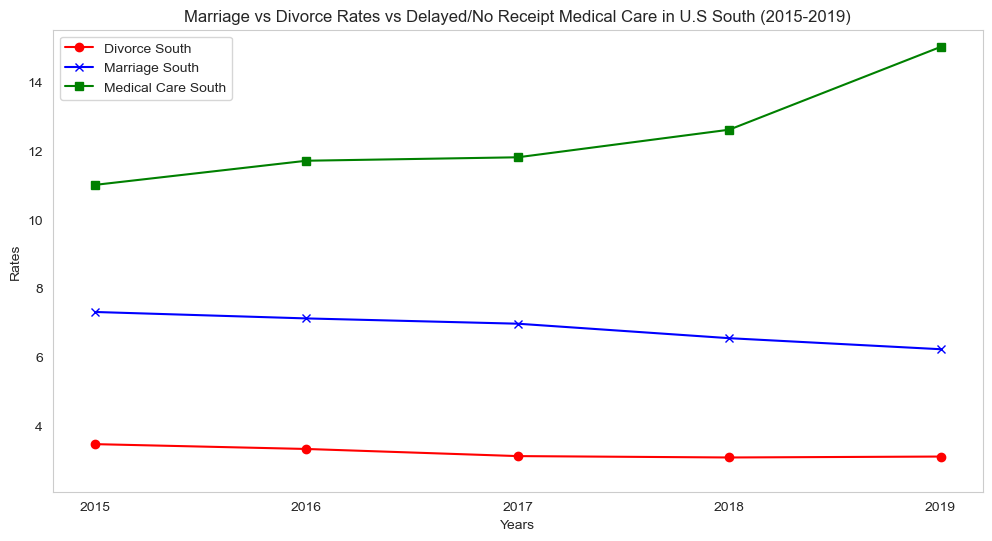

In [412]:
#Plot Divorce vs Marriage vs Medical Care Rates data for the U.S South

#Parse DataFrame by Region 
divorce_south = healthcare_marriage_divorce['South_Divorce Rates']
marriage_south = healthcare_marriage_divorce['South_Marriage Rates']
healthcare_south = healthcare_marriage_divorce['South_Medical Care']

#Plot Data 
fig, ax = plt.subplots(figsize=(12, 6))
divorce_south.plot(ax=ax, label='Divorce South', marker='o', color='r')
marriage_south.plot(ax=ax, label='Marriage South', marker='x', color='b')
healthcare_south.plot(ax=ax, label='Medical Care South', marker='s', color='g')

#Add Title and Labels 
plt.title('Marriage vs Divorce Rates vs Delayed/No Receipt Medical Care in U.S South (2015-2019)')
plt.xlabel('Years')
plt.ylabel('Rates')

#Set Y-Axis Limits 
plt.ylim(2.1, 15.5)

#Add Grid Layout & Legend 
plt.grid()
plt.legend()

#Show Graph
plt.show()

South Correlation Data

In [413]:
#Merge South Divorce and Marriage Data 
south_data_part = pd.merge(divorce_south,marriage_south, on='Year')

#Merge South Divorce and Marriage Data with Healthcare Data 
south_data_total = pd.merge(south_data_part, healthcare_south, on='Year')

south_data_total

# Run a correlation on the merged South Data 
south_correlation = south_data_total.corr()

south_correlation

,South_Divorce Rates,South_Marriage Rates,South_Medical Care
South_Divorce Rates,1.000000,0.815185,-0.650390
South_Marriage Rates,0.815185,1.000000,-0.945222
South_Medical Care,-0.650390,-0.945222,1.000000


Medical Care vs Marriage vs Divorce Correlation Data 

In [414]:
#Create Correlation Table for Marriage vs Divorce vs Medical Care Data 

healthcare_marriage_divorce_corr = healthcare_marriage_divorce.corr()

healthcare_marriage_divorce_corr

,Midwest_Marriage Rates,Northeast_Marriage Rates,Other_Marriage Rates,South_Marriage Rates,West_Marriage Rates,Midwest_Divorce Rates,Northeast_Divorce Rates,Other_Divorce Rates,South_Divorce Rates,West_Divorce Rates,Northeast_Medical Care,Midwest_Medical Care,South_Medical Care,West_Medical Care
Midwest_Marriage Rates,1.000000,0.895528,0.881607,0.976510,0.984080,0.973354,0.895096,0.827219,0.693891,0.922131,-0.720682,-0.975417,-0.968480,-0.952008
Northeast_Marriage Rates,0.895528,1.000000,0.667887,0.780693,0.815817,0.838042,0.757995,0.581204,0.372131,0.695728,-0.703887,-0.790088,-0.855187,-0.941171
Other_Marriage Rates,0.881607,0.667887,1.000000,0.911314,0.869536,0.796890,0.648537,0.683001,0.653242,0.796716,-0.829313,-0.943447,-0.812285,-0.844441
South_Marriage Rates,0.976510,0.780693,0.911314,1.000000,0.993462,0.972018,0.903176,0.899143,0.815185,0.968494,-0.678137,-0.993697,-0.945222,-0.891818
West_Marriage Rates,0.984080,0.815817,0.869536,0.993462,1.000000,0.989754,0.938391,0.902134,0.790948,0.974876,-0.627613,-0.978417,-0.971604,-0.890635
Midwest_Divorce Rates,0.973354,0.838042,0.796890,0.972018,0.989754,1.000000,0.971507,0.920692,0.793335,0.974514,-0.577519,-0.948944,-0.963299,-0.885604
Northeast_Divorce Rates,0.895096,0.757995,0.648537,0.903176,0.938391,0.971507,1.000000,0.940413,0.804921,0.963010,-0.375079,-0.855630,-0.923155,-0.766732
Other_Divorce Rates,0.827219,0.581204,0.683001,0.899143,0.902134,0.920692,0.940413,1.000000,0.958514,0.970571,-0.395377,-0.859886,-0.812834,-0.695436
South_Divorce Rates,0.693891,0.372131,0.653242,0.815185,0.790948,0.793335,0.804921,0.958514,1.000000,0.890964,-0.366582,-0.785269,-0.650390,-0.564381
West_Divorce Rates,0.922131,0.695728,0.796716,0.968494,0.974876,0.974514,0.963010,0.970571,0.890964,1.000000,-0.490979,-0.936744,-0.923666,-0.788470


# Alexandra Code Section


In [415]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [416]:
# Read the CSV file
df_2022 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2022.csv')


df_2022.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,990",681,13.6
1,Alaska,708,68,9.6
2,Arizona,"7,239",920,12.7
3,Arkansas,"2,993",496,16.6
4,California,"38,690","4,346",11.2


In [417]:
# List columns
df_2022.columns

Index(['State', 'Total population', 'Number in poverty ',
       'Percent in poverty'],
      dtype='object')

In [418]:
# Check Dtype Total Population

print(df_2022['Total population'].dtype)

object


In [419]:
# Print Dtypes

print(df_2022.head().to_string())

        State Total population Number in poverty   Percent in poverty
0     Alabama            4,990                681                13.6
1      Alaska              708                 68                 9.6
2     Arizona            7,239                920                12.7
3    Arkansas            2,993                496                16.6
4  California           38,690              4,346                11.2


In [420]:
# Clean the data & data type conversion 
df_2022['Total population'] = df_2022['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2022['Number in poverty '] = df_2022['Number in poverty '].replace(',', '', regex=True).astype(float).astype(int)
df_2022['Percent in poverty'] = df_2022['Percent in poverty'].astype(float)

# Set the index
df_2022.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2022.head().to_string())

            Total population  Number in poverty   Percent in poverty
State                                                               
Alabama                 4990                 681                13.6
Alaska                   708                  68                 9.6
Arizona                 7239                 920                12.7
Arkansas                2993                 496                16.6
California             38690                4346                11.2


In [421]:
#Add year to all colums 
df_rename_2022 = df_2022.rename(columns={
    'Total population': 'Total population (2022)',
    'Number in poverty ': 'Number in poverty (2022)',
    'Percent in poverty': 'Percent in poverty (2022)'
})

df_rename_2022.head()

,Total population (2022),Number in poverty (2022),Percent in poverty (2022)
State,,,
Alabama,4990,681,13.6
Alaska,708,68,9.6
Arizona,7239,920,12.7
Arkansas,2993,496,16.6
California,38690,4346,11.2


In [422]:
# Sort the DataFrame by 'Percent in poverty' in ascending order

df_sorted_2022 = df_rename_2022.sort_values('Percent in poverty (2022)')
df_sorted_2022

# Create a simple string table
table = "| State | Total population | Number in poverty | Percent in poverty |\n"
table += "|-------|-------------------------|--------------------------|---------------------|\n"
df_sorted_2022.head()


,Total population (2022),Number in poverty (2022),Percent in poverty (2022)
State,,,
Utah,3338,200,6.0
Wisconsin,5807,386,6.6
Wyoming,562,40,7.1
Minnesota,5626,427,7.6
Nebraska,1946,154,7.9


In [423]:
#assign the new colum names to the DataFrame 
df_sorted_2022.head()

,Total population (2022),Number in poverty (2022),Percent in poverty (2022)
State,,,
Utah,3338,200,6.0
Wisconsin,5807,386,6.6
Wyoming,562,40,7.1
Minnesota,5626,427,7.6
Nebraska,1946,154,7.9


In [424]:
#define the regions and which states belong to each.
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

In [425]:
#Now, let's create a function to assign a region to each state:
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'  # for states not in the defined regions (e.g., District of Columbia)

In [426]:
#Add a new 'Region' column to your DataFrame:
df_rename_2022['Region'] = df_rename_2022.index.map(get_region)
df_rename_2022.head()

,Total population (2022),Number in poverty (2022),Percent in poverty (2022),Region
State,,,,
Alabama,4990,681,13.6,South
Alaska,708,68,9.6,West
Arizona,7239,920,12.7,West
Arkansas,2993,496,16.6,South
California,38690,4346,11.2,West


In [427]:
#Now you can group the data by region:
grouped_by_region_2022 = df_rename_2022.groupby(['Region', 'State']).mean()
grouped_by_region_2022.head()

Total population (2022)  Number in poverty (2022)  \
Region  State                                                         
Midwest Illinois                  12350.0                    1173.0   
        Indiana                    6792.0                     704.0   
        Iowa                       3183.0                     299.0   
        Kansas                     2846.0                     298.0   
        Michigan                   9961.0                    1206.0   

                  Percent in poverty (2022)  
Region  State                                
Midwest Illinois                        9.5  
        Indiana                        10.4  
        Iowa                            9.4  
        Kansas                         10.5  
        Michigan                       12.1

In [428]:
# Read the CSV file
df_2021 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2021.csv')

df_2021.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,961",787,15.9
1,Alaska,712,81,11.4
2,Arizona,"7,303",922,12.6
3,Arkansas,"2,981",502,16.8
4,California,"38,770","4,615",11.9


In [429]:
# List columns
df_2021.columns

Index(['State', 'Total population', 'Number in poverty', 'Percent in poverty'], dtype='object')

In [430]:
#Check index type
print(df_2021['Total population'].dtype)
print(df_2021['Number in poverty'].dtype)
print(df_2021['Percent in poverty'].dtype)

object
object
float64


In [431]:
# Print Dtype

print(df_2021.head().to_string())

        State Total population Number in poverty  Percent in poverty
0     Alabama            4,961               787                15.9
1      Alaska              712                81                11.4
2     Arizona            7,303               922                12.6
3    Arkansas            2,981               502                16.8
4  California           38,770             4,615                11.9


In [432]:
# Clean the data & data type conversion 
df_2021['Total population'] = df_2021['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2021['Number in poverty'] = df_2021['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2021['Percent in poverty'] = df_2021['Percent in poverty'].astype(float)

# Set the index
df_2021.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2021.head().to_string())

            Total population  Number in poverty  Percent in poverty
State                                                              
Alabama                 4961                787                15.9
Alaska                   712                 81                11.4
Arizona                 7303                922                12.6
Arkansas                2981                502                16.8
California             38770               4615                11.9


In [433]:
#Add year to all colums 
df_rename_2021 = df_2021.rename(columns={
    'Total population': 'Total population (2021)',
    'Number in poverty': 'Number in poverty (2021)',
    'Percent in poverty': 'Percent in poverty (2021)'
})

df_rename_2021.head()

,Total population (2021),Number in poverty (2021),Percent in poverty (2021)
State,,,
Alabama,4961,787,15.9
Alaska,712,81,11.4
Arizona,7303,922,12.6
Arkansas,2981,502,16.8
California,38770,4615,11.9


In [434]:
# Sort the DataFrame by 'Percent in poverty' in ascending order

df_sorted_2021 = df_rename_2021.sort_values('Percent in poverty (2021)')
df_sorted_2021

# Create a simple string table
table = "| State | Total population | Number in poverty | Percent in poverty |\n"
table += "|-------|-------------------------|--------------------------|---------------------|\n"
df_sorted_2021.head()

,Total population (2021),Number in poverty (2021),Percent in poverty (2021)
State,,,
Minnesota,5532,382,6.9
New Hampshire,1390,96,6.9
Kansas,2891,206,7.1
Vermont,631,47,7.5
New Jersey,9220,698,7.6


In [435]:
#define the regions and which states belong to each.
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']}

In [436]:
#Now, let's create a function to assign a region to each state:
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'  # for states not in the defined regions (e.g., District of Columbia)

In [437]:
#Add a new 'Region' column to your DataFrame:
df_rename_2021['Region'] = df_rename_2021.index.map(get_region)
df_rename_2021.head()

,Total population (2021),Number in poverty (2021),Percent in poverty (2021),Region
State,,,,
Alabama,4961,787,15.9,South
Alaska,712,81,11.4,West
Arizona,7303,922,12.6,West
Arkansas,2981,502,16.8,South
California,38770,4615,11.9,West


In [438]:
#Now you can group the data by region:
grouped_by_region_2021 = df_rename_2021.groupby(['Region', 'State']).mean()
grouped_by_region_2021.head()

Total population (2021)  Number in poverty (2021)  \
Region  State                                                         
Midwest Illinois                  12460.0                    1339.0   
        Indiana                    6778.0                     704.0   
        Iowa                       3182.0                     309.0   
        Kansas                     2891.0                     206.0   
        Michigan                   9842.0                    1147.0   

                  Percent in poverty (2021)  
Region  State                                
Midwest Illinois                       10.7  
        Indiana                        10.4  
        Iowa                            9.7  
        Kansas                          7.1  
        Michigan                       11.7

In [439]:
# Read the CSV file
df_2020 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2020.csv')

df_2020.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"5,001",744,14.9
1,Alaska,708,95,13.4
2,Arizona,"7,203",783,10.9
3,Arkansas,"2,974",420,14.1
4,California,"39,200","4,332",11.1


In [440]:
# List columns
df_2020.columns

Index(['State', 'Total population', 'Number in poverty', 'Percent in poverty'], dtype='object')

In [441]:
#Check index type
print(df_2020['Total population'].dtype)
print(df_2020['Number in poverty'].dtype)
print(df_2020['Percent in poverty'].dtype)

object
object
float64


In [442]:
# Print Dtype

print(df_2020.head().to_string())

        State Total population Number in poverty  Percent in poverty
0     Alabama            5,001               744                14.9
1      Alaska              708                95                13.4
2     Arizona            7,203               783                10.9
3    Arkansas            2,974               420                14.1
4  California           39,200             4,332                11.1


In [443]:
# Clean the data & data type conversion 
df_2020['Total population'] = df_2020['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2020['Number in poverty'] = df_2020['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2020['Percent in poverty'] = df_2020['Percent in poverty'].astype(float)

# Set the index
df_2020.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2020.head().to_string())

            Total population  Number in poverty  Percent in poverty
State                                                              
Alabama                 5001                744                14.9
Alaska                   708                 95                13.4
Arizona                 7203                783                10.9
Arkansas                2974                420                14.1
California             39200               4332                11.1


In [444]:
#Add year to all colums 
df_rename_2020 = df_2020.rename(columns={
    'Total population': 'Total population (2020)',
    'Number in poverty': 'Number in poverty (2020)',
    'Percent in poverty': 'Percent in poverty (2020)'
})

df_rename_2020.head()

,Total population (2020),Number in poverty (2020),Percent in poverty (2020)
State,,,
Alabama,5001,744,14.9
Alaska,708,95,13.4
Arizona,7203,783,10.9
Arkansas,2974,420,14.1
California,39200,4332,11.1


In [445]:
# Sort the DataFrame by 'Percent in poverty' in ascending order

df_sorted_2020 = df_rename_2020.sort_values('Percent in poverty (2020)')
df_sorted_2020

# Create a simple string table
table = "| State | Total population | Number in poverty | Percent in poverty |\n"
table += "|-------|-------------------------|--------------------------|---------------------|\n"
df_sorted_2020.head()

,Total population (2020),Number in poverty (2020),Percent in poverty (2020)
State,,,
New Hampshire,1387,87,6.2
Utah,3272,242,7.4
Virginia,8501,663,7.8
Maine,1366,109,8.0
Wisconsin,5836,466,8.0


In [446]:
# Assign States To Regions
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

In [447]:
#Now, let's create a function to assign a region to each state:
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'  # for states not in the defined regions (e.g., District of Columbia)

In [448]:
#Add a new "Region" column to your DataFrame 
df_rename_2020['Region'] = df_2020.index.map(get_region)

In [449]:
#Now you can group the data by region:
grouped_by_region_2020 = df_rename_2020.groupby(['Region', 'State']).mean()
grouped_by_region_2020.head()

Total population (2020)  Number in poverty (2020)  \
Region  State                                                         
Midwest Illinois                  12640.0                    1010.0   
        Indiana                    6685.0                     807.0   
        Iowa                       3163.0                     290.0   
        Kansas                     2891.0                     267.0   
        Michigan                   9891.0                    1112.0   

                  Percent in poverty (2020)  
Region  State                                
Midwest Illinois                        8.0  
        Indiana                        12.1  
        Iowa                            9.2  
        Kansas                          9.3  
        Michigan                       11.2

In [450]:
# Isolate Percent in Poverty in group by Regions
Regions_2020 = grouped_by_region_2020['Percent in poverty (2020)']
Regions_2020

Region     State               
Midwest    Illinois                 8.0
           Indiana                 12.1
           Iowa                     9.2
           Kansas                   9.3
           Michigan                11.2
           Minnesota                8.5
           Missouri                10.7
           Nebraska                 8.3
           North Dakota            10.7
           Ohio                    12.7
           South Dakota            11.6
           Wisconsin                8.0
Northeast  Connecticut             11.2
           Maine                    8.0
           Massachusetts            8.4
           New Hampshire            6.2
           New Jersey               8.2
           New York                11.8
           Pennsylvania            10.7
           Rhode Island             8.5
           Vermont                  8.6
Other      District of Columbia    16.8
South      Alabama                 14.9
           Arkansas                14.1
        

2019

In [451]:
# Read the CSV file
df_2019 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2019.csv')

df_2019.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,873",627,12.9
1,Alaska,701,72,10.2
2,Arizona,"7,285",725,9.9
3,Arkansas,"2,915",412,14.1
4,California,"39,380","3,980",10.1


In [452]:
# List columns
df_2019.columns

Index(['State', 'Total population', 'Number in poverty', 'Percent in poverty'], dtype='object')

In [453]:
#Check index type
print(df_2019['Total population'].dtype)
print(df_2019['Number in poverty'].dtype)
print(df_2019['Percent in poverty'].dtype)

object
object
float64


In [454]:
# Print Dtype
print(df_2019.head().to_string())

        State Total population Number in poverty  Percent in poverty
0     Alabama            4,873               627                12.9
1      Alaska              701                72                10.2
2     Arizona            7,285               725                 9.9
3    Arkansas            2,915               412                14.1
4  California           39,380             3,980                10.1


In [455]:
# Clean the data & data type conversion 
df_2019['Total population'] = df_2019['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2019['Number in poverty'] = df_2019['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2019['Percent in poverty'] = df_2019['Percent in poverty'].astype(float)

# Set the index
df_2019.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2019.head().to_string())

            Total population  Number in poverty  Percent in poverty
State                                                              
Alabama                 4873                627                12.9
Alaska                   701                 72                10.2
Arizona                 7285                725                 9.9
Arkansas                2915                412                14.1
California             39380               3980                10.1


In [456]:
#Add year to all colums 
df_rename_2019 = df_2019.rename(columns={
    'Total population': 'Total population (2019)',
    'Number in poverty': 'Number in poverty (2019)',
    'Percent in poverty': '2019'
})


df_rename_2019.head()

,Total population (2019),Number in poverty (2019),2019
State,,,
Alabama,4873,627,12.9
Alaska,701,72,10.2
Arizona,7285,725,9.9
Arkansas,2915,412,14.1
California,39380,3980,10.1


In [457]:
# Sort the DataFrame by 'Percent in poverty' in ascending order

df_sorted_2019 = df_rename_2019.sort_values('2019')
df_sorted_2019

# Create a simple string table
table = "| State | Total population | Number in poverty | Percent in poverty |\n"
table += "|-------|-------------------------|--------------------------|---------------------|\n"
df_sorted_2019.head()

,Total population (2019),Number in poverty (2019),2019
State,,,
New Hampshire,1351,49,3.7
Minnesota,5681,322,5.7
New Jersey,8738,554,6.3
Delaware,971,63,6.5
Washington,7549,527,7.0


In [458]:
#Add a new "Region" column to your DataFrame 
df_rename_2019['Region'] = df_2019.index.map(get_region)

In [459]:
#Now you can group the data by region:
grouped_by_region_2019 = df_rename_2019.groupby(['Region', 'State']).mean()
grouped_by_region_2019.head()

Total population (2019)  Number in poverty (2019)  2019
Region  State                                                            
Midwest Illinois                  12500.0                    1160.0   9.3
        Indiana                    6691.0                     677.0  10.1
        Iowa                       3137.0                     298.0   9.5
        Kansas                     2813.0                     266.0   9.5
        Michigan                   9901.0                    1007.0  10.2

In [460]:
# Read the CSV file
df_2018 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2018.csv')

df_2018.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,877",779,16.0
1,Alaska,720,94,13.1
2,Arizona,"7,241",929,12.8
3,Arkansas,"2,912",462,15.9
4,California,"39,150","4,664",11.9


In [461]:
# List columns
df_2018.columns

Index(['State', 'Total population ', 'Number in poverty',
       'Percent in poverty'],
      dtype='object')

In [462]:
#Check index type
print(df_2018['Total population '].dtype)
print(df_2018['Number in poverty'].dtype)
print(df_2018['Percent in poverty'].dtype)

object
object
float64


In [463]:
# Clean the data & data type conversion 
df_2018['Total population '] = df_2018['Total population '].replace(',', '', regex=True).astype(float).astype(int)
df_2018['Number in poverty'] = df_2018['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2018['Percent in poverty'] = df_2018['Percent in poverty'].astype(float)

# Set the index
df_2018.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2018.head().to_string())

            Total population   Number in poverty  Percent in poverty
State                                                               
Alabama                  4877                779                16.0
Alaska                    720                 94                13.1
Arizona                  7241                929                12.8
Arkansas                 2912                462                15.9
California              39150               4664                11.9


In [464]:
#Add year to all colums AND rename Percent in poverty to just year 
df_rename_2018 = df_2018.rename(columns={
    'Total population ': 'Total population (2018)',
    'Number in poverty': 'Number in poverty (2018)',
    'Percent in poverty': '2018'
})


df_rename_2018.head()

,Total population (2018),Number in poverty (2018),2018
State,,,
Alabama,4877,779,16.0
Alaska,720,94,13.1
Arizona,7241,929,12.8
Arkansas,2912,462,15.9
California,39150,4664,11.9


In [465]:
#Add a new "Region" column to your DataFrame 
df_rename_2018['Region'] = df_2018.index.map(get_region)

In [466]:
#Now you can group the data by region:
grouped_by_region_2018 = df_rename_2018.groupby(['Region', 'State']).mean()
grouped_by_region_2018.head()

Total population (2018)  Number in poverty (2018)  2018
Region  State                                                            
Midwest Illinois                  12590.0                    1292.0  10.3
        Indiana                    6582.0                     761.0  11.6
        Iowa                       3110.0                     277.0   8.9
        Kansas                     2835.0                     212.0   7.5
        Michigan                   9913.0                    1036.0  10.5

2017

In [467]:
# Read the CSV file
df_2017 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2017.csv')

df_2017.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,806",723,15.0
1,Alaska,717,103,14.4
2,Arizona,"6,990",926,13.2
3,Arkansas,"2,924",432,14.8
4,California,"39,240","4,872",12.4


In [468]:
#Check index type
print(df_2017['Total population'].dtype)
print(df_2017['Number in poverty'].dtype)
print(df_2017['Percent in poverty'].dtype)

object
object
float64


In [469]:
# Clean the data & data type conversion 
df_2017['Total population'] = df_2017['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2017['Number in poverty'] = df_2017['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2017['Percent in poverty'] = df_2017['Percent in poverty'].astype(float)

# Set the index
df_2017.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2017.head().to_string())

            Total population  Number in poverty  Percent in poverty
State                                                              
Alabama                 4806                723                15.0
Alaska                   717                103                14.4
Arizona                 6990                926                13.2
Arkansas                2924                432                14.8
California             39240               4872                12.4


In [470]:
#Add year to all colums rename Percent in Poverty to '2019'
df_rename_2017 = df_2017.rename(columns={
    'Total population': 'Total population (2017)',
    'Number in poverty': 'Number in poverty (2017)',
    'Percent in poverty': '2017'
})


df_rename_2017.head()

,Total population (2017),Number in poverty (2017),2017
State,,,
Alabama,4806,723,15.0
Alaska,717,103,14.4
Arizona,6990,926,13.2
Arkansas,2924,432,14.8
California,39240,4872,12.4


In [471]:
#Add a new "Region" column to your DataFrame 
df_rename_2017['Region'] = df_2017.index.map(get_region)

In [472]:
#Now you can group the data by region:
grouped_by_region_2017 = df_rename_2017.groupby(['Region', 'State']).mean()
grouped_by_region_2017.head()

Total population (2017)  Number in poverty (2017)  2017
Region  State                                                            
Midwest Illinois                  12600.0                    1379.0  10.9
        Indiana                    6533.0                     748.0  11.4
        Iowa                       3054.0                     278.0   9.1
        Kansas                     2870.0                     421.0  14.7
        Michigan                   9889.0                    1259.0  12.7

2016

In [473]:
# Read the CSV file
df_2016 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2016.csv')

df_2016.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,821",782,16.2
1,Alaska,708,89,12.6
2,Arizona,"6,878","1,108",16.1
3,Arkansas,"2,941",471,16.0
4,California,"39,140","5,435",13.9


In [474]:
#Check index type
print(df_2016['Total population'].dtype)
print(df_2016['Number in poverty'].dtype)
print(df_2016['Percent in poverty'].dtype)

object
object
float64


In [475]:
# Clean the data & data type conversion 
df_2016['Total population'] = df_2016['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2016['Number in poverty'] = df_2016['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2016['Percent in poverty'] = df_2016['Percent in poverty'].astype(float)

# Set the index
df_2016.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2016.head().to_string())

            Total population  Number in poverty  Percent in poverty
State                                                              
Alabama                 4821                782                16.2
Alaska                   708                 89                12.6
Arizona                 6878               1108                16.1
Arkansas                2941                471                16.0
California             39140               5435                13.9


In [476]:
#Add year to all colums rename Percent in Poverty to '2016'
df_rename_2016 = df_2016.rename(columns={
    'Total population': 'Total population (2016)',
    'Number in poverty': 'Number in poverty (2016)',
    'Percent in poverty': '2016'
})


df_rename_2016.head()

,Total population (2016),Number in poverty (2016),2016
State,,,
Alabama,4821,782,16.2
Alaska,708,89,12.6
Arizona,6878,1108,16.1
Arkansas,2941,471,16.0
California,39140,5435,13.9


In [477]:
#Add a new "Region" column to your DataFrame 
df_rename_2016['Region'] = df_2016.index.map(get_region)

In [478]:
#Now you can group the data by region:
grouped_by_region_2016 = df_rename_2016.groupby(['Region', 'State']).mean()
grouped_by_region_2016.head()

Total population (2016)  Number in poverty (2016)  2016
Region  State                                                            
Midwest Illinois                  12580.0                    1517.0  12.1
        Indiana                    6493.0                     768.0  11.8
        Iowa                       3099.0                     302.0   9.8
        Kansas                     2859.0                     321.0  11.2
        Michigan                   9875.0                    1091.0  11.1

2015

In [479]:
# Read the CSV file
df_2015 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2015.csv')

df_2015.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,820",784,16.3
1,Alaska,703,65,9.2
2,Arizona,"6,728","1,156",17.2
3,Arkansas,"2,951",475,16.1
4,California,"39,080","5,441",13.9


In [480]:
#Check index type
print(df_2015['Total population'].dtype)
print(df_2015['Number in poverty'].dtype)
print(df_2015['Percent in poverty'].dtype)

object
object
float64


In [481]:
# Clean the data & data type conversion 
df_2015['Total population'] = df_2015['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2015['Number in poverty'] = df_2015['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2015['Percent in poverty'] = df_2015['Percent in poverty'].astype(float)

# Set the index
df_2015.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2015.head().to_string())

            Total population  Number in poverty  Percent in poverty
State                                                              
Alabama                 4820                784                16.3
Alaska                   703                 65                 9.2
Arizona                 6728               1156                17.2
Arkansas                2951                475                16.1
California             39080               5441                13.9


In [482]:
#Add year to all colums rename Percent in Poverty to '2015'
df_rename_2015 = df_2015.rename(columns={
    'Total population': 'Total population (2015)',
    'Number in poverty': 'Number in poverty (2015)',
    'Percent in poverty': '2015'
})


df_rename_2015.head()

,Total population (2015),Number in poverty (2015),2015
State,,,
Alabama,4820,784,16.3
Alaska,703,65,9.2
Arizona,6728,1156,17.2
Arkansas,2951,475,16.1
California,39080,5441,13.9


In [483]:
#Add a new "Region" column to your DataFrame 
df_rename_2015['Region'] = df_2015.index.map(get_region)

In [484]:
#Now you can group the data by region:
grouped_by_region_2015 = df_rename_2015.groupby(['Region', 'State']).mean()
grouped_by_region_2015.head()

Total population (2015)  Number in poverty (2015)  2015
Region  State                                                            
Midwest Illinois                  12680.0                    1380.0  10.9
        Indiana                    6502.0                     880.0  13.5
        Iowa                       3100.0                     321.0  10.4
        Kansas                     2849.0                     404.0  14.2
        Michigan                   9852.0                    1259.0  12.8

Grouped Years By Region


In [485]:
####Merged Data for all years 

Regions_combined= pd.merge(grouped_by_region_2019,grouped_by_region_2018, on=['State', 'Region'])
Regions_adding_2017= pd.merge(Regions_combined,grouped_by_region_2017, on=['State', 'Region'])
Regions_adding_2016= pd.merge(Regions_adding_2017,grouped_by_region_2016, on=['State', 'Region'])
Regions_adding_2015= pd.merge(Regions_adding_2016,grouped_by_region_2015, on=['State', 'Region'])

Regions_adding_2015

Regions_grouped = Regions_combined.groupby('Region').mean()
Regions_grouped

,Total population (2019),Number in poverty (2019),2019,Total population (2018),Number in poverty (2018),2018
Region,,,,,,
Midwest,5626.666667,543.166667,9.325000,5628.166667,583.666667,10.033333
Northeast,6122.000000,575.333333,8.355556,6140.888889,631.333333,9.588889
Other,702.000000,88.000000,12.500000,692.000000,102.000000,14.700000
South,7715.187500,922.375000,12.518750,7673.312500,1040.875000,13.800000
West,5999.230769,572.692308,9.384615,5967.461538,669.230769,10.938462


In [486]:
#Combine years 

Regions_grouped = Regions_adding_2016.groupby('Region').mean()
Regions_grouped

,Total population (2019),Number in poverty (2019),2019,Total population (2018),Number in poverty (2018),2018,Total population (2017),Number in poverty (2017),2017,Total population (2016),Number in poverty (2016),2016
Region,,,,,,,,,,,,
Midwest,5626.666667,543.166667,9.325000,5628.166667,583.666667,10.033333,5611.666667,637.333333,11.116667,5574.333333,650.833333,11.441667
Northeast,6122.000000,575.333333,8.355556,6140.888889,631.333333,9.588889,6218.555556,708.222222,10.633333,6163.888889,663.111111,10.211111
Other,702.000000,88.000000,12.500000,692.000000,102.000000,14.700000,692.000000,94.000000,13.600000,685.000000,112.000000,16.300000
South,7715.187500,922.375000,12.518750,7673.312500,1040.875000,13.800000,7597.375000,1032.250000,13.943750,7530.000000,1057.312500,14.762500
West,5999.230769,572.692308,9.384615,5967.461538,669.230769,10.938462,5922.000000,697.615385,11.753846,5875.000000,754.615385,11.800000


In [487]:
#Combine years 

Regions_grouped = Regions_adding_2015.groupby('Region').mean()
Regions_grouped

,Total population (2019),Number in poverty (2019),2019,Total population (2018),Number in poverty (2018),2018,Total population (2017),Number in poverty (2017),2017,Total population (2016),Number in poverty (2016),2016,Total population (2015),Number in poverty (2015),2015
Region,,,,,,,,,,,,,,,
Midwest,5626.666667,543.166667,9.325000,5628.166667,583.666667,10.033333,5611.666667,637.333333,11.116667,5574.333333,650.833333,11.441667,5586.000000,654.166667,11.608333
Northeast,6122.000000,575.333333,8.355556,6140.888889,631.333333,9.588889,6218.555556,708.222222,10.633333,6163.888889,663.111111,10.211111,6197.888889,765.555556,11.155556
Other,702.000000,88.000000,12.500000,692.000000,102.000000,14.700000,692.000000,94.000000,13.600000,685.000000,112.000000,16.300000,676.000000,113.000000,16.600000
South,7715.187500,922.375000,12.518750,7673.312500,1040.875000,13.800000,7597.375000,1032.250000,13.943750,7530.000000,1057.312500,14.762500,7455.125000,1137.000000,15.200000
West,5999.230769,572.692308,9.384615,5967.461538,669.230769,10.938462,5922.000000,697.615385,11.753846,5875.000000,754.615385,11.800000,5822.153846,775.307692,12.338462


Merged Data for all years 

In [488]:
####Merged Data for all years 

Regions_combined= pd.merge(grouped_by_region_2019,grouped_by_region_2018, on=['State', 'Region'])
Regions_adding_2017= pd.merge(Regions_combined,grouped_by_region_2017, on=['State', 'Region'])
Regions_adding_2016= pd.merge(Regions_adding_2017,grouped_by_region_2016, on=['State', 'Region'])
Regions_adding_2015= pd.merge(Regions_adding_2016,grouped_by_region_2015, on=['State', 'Region'])

Regions_adding_2015

,,Total population (2019),Number in poverty (2019),2019,Total population (2018),Number in poverty (2018),2018,Total population (2017),Number in poverty (2017),2017,Total population (2016),Number in poverty (2016),2016,Total population (2015),Number in poverty (2015),2015
State,Region,,,,,,,,,,,,,,,
Illinois,Midwest,12500.0,1160.0,9.3,12590.0,1292.0,10.3,12600.0,1379.0,10.9,12580.0,1517.0,12.1,12680.0,1380.0,10.9
Indiana,Midwest,6691.0,677.0,10.1,6582.0,761.0,11.6,6533.0,748.0,11.4,6493.0,768.0,11.8,6502.0,880.0,13.5
Iowa,Midwest,3137.0,298.0,9.5,3110.0,277.0,8.9,3054.0,278.0,9.1,3099.0,302.0,9.8,3100.0,321.0,10.4
Kansas,Midwest,2813.0,266.0,9.5,2835.0,212.0,7.5,2870.0,421.0,14.7,2859.0,321.0,11.2,2849.0,404.0,14.2
Michigan,Midwest,9901.0,1007.0,10.2,9913.0,1036.0,10.5,9889.0,1259.0,12.7,9875.0,1091.0,11.1,9852.0,1259.0,12.8
Minnesota,Midwest,5681.0,322.0,5.7,5746.0,456.0,7.9,5619.0,519.0,9.2,5430.0,470.0,8.7,5458.0,428.0,7.8
Missouri,Midwest,6063.0,568.0,9.4,6026.0,745.0,12.4,5979.0,666.0,11.1,5878.0,762.0,13.0,5946.0,582.0,9.8
Nebraska,Midwest,1885.0,165.0,8.7,1893.0,199.0,10.5,1875.0,194.0,10.4,1870.0,179.0,9.6,1858.0,192.0,10.3
North Dakota,Midwest,749.0,61.0,8.1,745.0,72.0,9.7,742.0,84.0,11.3,749.0,83.0,11.1,763.0,82.0,10.7


Region Pivot Tables for each Year 

In [489]:
# Create 2019 Piviot Table 

Region_pivot_2019 = pd.pivot_table(Regions_grouped,values='2019', columns='Region', aggfunc='mean')
Region_pivot_2019

Region,Midwest,Northeast,Other,South,West
2019,9.325,8.355556,12.5,12.51875,9.384615


In [490]:
# Create 2018 Piviot Table

Region_pivot_2018 = pd.pivot_table(Regions_grouped,values='2018', columns='Region', aggfunc='mean')
Region_pivot_2018

Region,Midwest,Northeast,Other,South,West
2018,10.033333,9.588889,14.7,13.8,10.938462


In [491]:
#Create piviot table for 2017

Region_pivot_2017 = pd.pivot_table(Regions_grouped,values='2017', columns='Region', aggfunc='mean')
Region_pivot_2017

Region,Midwest,Northeast,Other,South,West
2017,11.116667,10.633333,13.6,13.94375,11.753846


In [492]:
#Create piviot table for 2016

Region_pivot_2016 = pd.pivot_table(Regions_grouped,values='2016', columns='Region', aggfunc='mean')
Region_pivot_2016

Region,Midwest,Northeast,Other,South,West
2016,11.441667,10.211111,16.3,14.7625,11.8


In [493]:
#Create piviot table for 2015

Region_pivot_2015 = pd.pivot_table(Regions_grouped,values='2015', columns='Region', aggfunc='mean')
Region_pivot_2015

Region,Midwest,Northeast,Other,South,West
2015,11.608333,11.155556,16.6,15.2,12.338462


Combining Pivot Tables 

In [494]:
# Combine all years using piviot Table 

Region_pivot_total= pd.concat([Region_pivot_2019,Region_pivot_2018,Region_pivot_2017,Region_pivot_2016,Region_pivot_2015])
Region_pivot_total

Region,Midwest,Northeast,Other,South,West
2019,9.325000,8.355556,12.5,12.51875,9.384615
2018,10.033333,9.588889,14.7,13.80000,10.938462
2017,11.116667,10.633333,13.6,13.94375,11.753846
2016,11.441667,10.211111,16.3,14.76250,11.800000
2015,11.608333,11.155556,16.6,15.20000,12.338462


In [495]:
# Reset Index to Year 

Region_pivot_reset= Region_pivot_total.reset_index()
Region_pivot_set_index= Region_pivot_reset.set_index('index')
Region_pivot_final= Region_pivot_set_index.rename_axis('Year')
Region_pivot_final = Region_pivot_final.iloc[::-1]
Region_pivot_final

Region,Midwest,Northeast,Other,South,West
Year,,,,,
2015,11.608333,11.155556,16.6,15.20000,12.338462
2016,11.441667,10.211111,16.3,14.76250,11.800000
2017,11.116667,10.633333,13.6,13.94375,11.753846
2018,10.033333,9.588889,14.7,13.80000,10.938462
2019,9.325000,8.355556,12.5,12.51875,9.384615


Plot Region Pivot Data 

<function matplotlib.pyplot.show(close=None, block=None)>

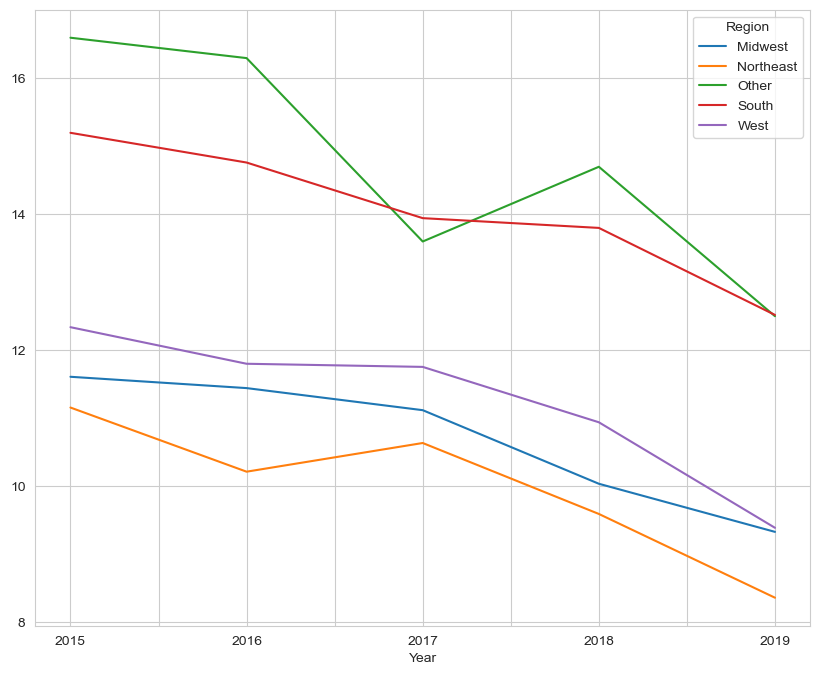

In [496]:
# Plot Region Piviot Table 
Region_pivot_final.plot(figsize=(10,8))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

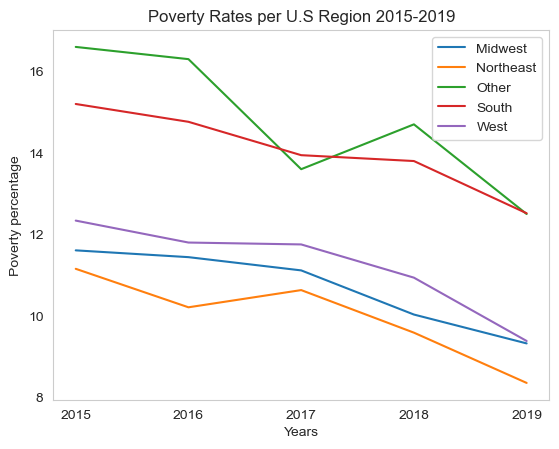

In [497]:
# Final Plot of Povertey Rates per U.S Region 2015-2019 

Region_pivot_final.plot()
plt.title('Poverty Rates per U.S Region 2015-2019')
plt.xlabel('Years')
plt.ylabel('Poverty percentage')
plt.ylim()
plt.legend(loc='upper right')
plt.grid()
plt.show

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019')])

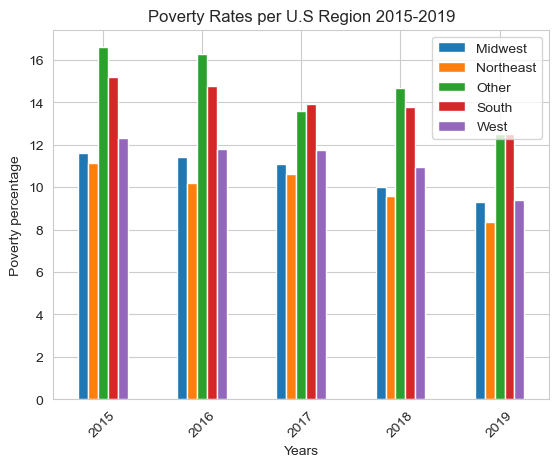

In [498]:
# Final Bar of Povertey Rates per U.S Region 2015-2019

Region_pivot_final.plot(kind="bar")
plt.title('Poverty Rates per U.S Region 2015-2019')
plt.xlabel('Years')
plt.ylabel('Poverty percentage')
plt.ylim()
plt.legend(loc='upper right')
plt.xticks(rotation=45)

# Aaliyah Code 

In [499]:
import pandas as pd
import matplotlib.pyplot as plt

In [500]:
#Load Csv File 2019
Cancer_data_2019 = pd.read_csv("Aaliyahs Resources/CANCER_2019.csv") 
Cancer_data_2019.head()

,YEAR,STATE,RATE,DEATHS
0,2019,AL,160.8,10266
1,2019,AK,146.9,1021
2,2019,AZ,131.1,12503
3,2019,AR,165.7,6482
4,2019,CA,131.6,59512


In [501]:
# Reading CSV File 2018

Cancer_data_2018 = pd.read_csv("Aaliyahs Resources/CANCER_2018.csv") 
Cancer_data_2018.head()

,YEAR,STATE,RATE,DEATHS
0,2018,AL,170.4,10632
1,2018,AK,141.5,957
2,2018,AZ,131.9,12113
3,2018,AR,168.8,6491
4,2018,CA,135.0,59962


In [502]:
# Reading CSV File 2017

Cancer_data_2017 = pd.read_csv("Aaliyahs Resources/CANCER_2017.csv") 
Cancer_data_2017.head()

,YEAR,STATE,RATE,DEATHS
0,2017,AL,170.0,"10,410"
1,2017,AK,139.2,926
2,2017,AZ,135.8,"12,008"
3,2017,AR,173.6,"6,517"
4,2017,CA,136.7,"59,516"


In [503]:
# Reading CSV File 2016

Cancer_data_2016 = pd.read_csv("Aaliyahs Resources/CANCER_2016.csv") 
Cancer_data_2016.head()

,YEAR,STATE,RATE,DEATHS
0,2016,AL,174.0,"10,419"
1,2016,AK,158.7,995
2,2016,AZ,136.8,"11,876"
3,2016,AR,178.8,"6,612"
4,2016,CA,139.7,"59,515"


In [504]:
# Reading CSV File 2015

Cancer_data_20155 = pd.read_csv("Aaliyahs Resources/CANCER_20155.csv") 
Cancer_data_20155.head()

,YEAR,STATE,RATE,DEATHS
0,2015,AL,175.6,"10,354"
1,2015,AK,159.8,978
2,2015,AZ,141.3,"11,776"
3,2015,AR,185.4,"6,727"
4,2015,CA,142.8,"59,629"


In [505]:
# Setting Index , Columns and Name for 2015 


Cancer_data_20155_rates = Cancer_data_20155.drop(columns="DEATHS")
Cancer_data_20155_rates = Cancer_data_20155_rates.set_index("STATE")
Cancer_data_20155_rates = Cancer_data_20155_rates.drop(columns="YEAR")
Cancer_data_20155_rates = Cancer_data_20155_rates.rename(columns={"RATE":"2015"})
Cancer_data_20155_rates

,2015
STATE,
AL,175.6
AK,159.8
AZ,141.3
AR,185.4
CA,142.8
CO,134.4
CT,146.2
DE,165.6
FL,150.6


In [506]:
# # Setting Index , Columns and Name for 2016

Cancer_data_2016_rates = Cancer_data_2016.drop(columns="DEATHS")
Cancer_data_2016_rates = Cancer_data_2016_rates.set_index("STATE")
Cancer_data_2016_rates = Cancer_data_2016_rates.drop(columns="YEAR")
Cancer_data_2016_rates = Cancer_data_2016_rates.rename(columns={"RATE":"2016"})
Cancer_data_2016_rates

,2016
STATE,
AL,174.0
AK,158.7
AZ,136.8
AR,178.8
CA,139.7
CO,137.1
CT,144.9
DE,170.8
FL,146.9


In [507]:
# Setting Index , Columns and Name for 2017

Cancer_data_2017_rates = Cancer_data_2017.drop(columns="DEATHS")
Cancer_data_2017_rates = Cancer_data_2017_rates.set_index("STATE")
Cancer_data_2017_rates = Cancer_data_2017_rates.drop(columns="YEAR")
Cancer_data_2017_rates = Cancer_data_2017_rates.rename(columns={"RATE":"2017"})
Cancer_data_2017_rates

,2017
STATE,
AL,170.0
AK,139.2
AZ,135.8
AR,173.6
CA,136.7
CO,130.9
CT,139.5
DE,160.4
FL,145.9


In [508]:
# Setting Index , Columns and Name for 2018

Cancer_data_2018_rates = Cancer_data_2018.drop(columns="DEATHS")
Cancer_data_2018_rates = Cancer_data_2018_rates.set_index("STATE")
Cancer_data_2018_rates = Cancer_data_2018_rates.drop(columns="YEAR")
Cancer_data_2018_rates = Cancer_data_2018_rates.rename(columns={"RATE":"2018"})
Cancer_data_2018_rates

,2018
STATE,
AL,170.4
AK,141.5
AZ,131.9
AR,168.8
CA,135.0
CO,127.6
CT,134.1
DE,159.4
FL,141.7


In [509]:
# Setting Index , Columns and Name for 2019

Cancer_data_2019_rates = Cancer_data_2019.drop(columns="DEATHS")
Cancer_data_2019_rates = Cancer_data_2019_rates.set_index("STATE")
Cancer_data_2019_rates = Cancer_data_2019_rates.drop(columns="YEAR")
Cancer_data_2019_rates = Cancer_data_2019_rates.rename(columns={"RATE":"2019"})
Cancer_data_2019_rates

,2019
STATE,
AL,160.8
AK,146.9
AZ,131.1
AR,165.7
CA,131.6
CO,125.9
CT,131.9
DE,151.9
FL,139.1


In [510]:
# Merge the DataFrames
merged_data = Cancer_data_20155_rates.merge(Cancer_data_2016_rates, on="STATE") \
                 .merge(Cancer_data_2017_rates, on="STATE") \
                 .merge(Cancer_data_2018_rates, on="STATE") \
                 .merge(Cancer_data_2019_rates, on="STATE")


merged_data.head()

,2015,2016,2017,2018,2019
STATE,,,,,
AL,175.6,174.0,170.0,170.4,160.8
AK,159.8,158.7,139.2,141.5,146.9
AZ,141.3,136.8,135.8,131.9,131.1
AR,185.4,178.8,173.6,168.8,165.7
CA,142.8,139.7,136.7,135.0,131.6


In [511]:
# Assigning State to Regions 

regions = {
  'Northeast': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NY', 'NJ', 'PA'],
  'Midwest': ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD'],
  'South': ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'AL', 'KY', 'MI', 'TN', 'AR', 'LA', 'OK', 'TX'],
  'West': ['AZ', 'CO', 'ID', 'MT', 'NE', 'NM', 'Utah', 'WY', 'AL', 'CA', 'HI', 'OR', 'WA'] }
#create function that iterates through states dataframe and attaches region name to the state in the regions dictionary
def get_region(state):
  for region, states in regions.items():
    if state in states:
      return region
  return 'Other'

#Append the region in the regions dictionary to each state via .map()
merged_data["Region"] = merged_data.index.map(get_region)
merged_data = merged_data.groupby(["Region","STATE"]).sum()
merged_data.head()

2015   2016   2017   2018   2019
Region  STATE                                   
Midwest IA     164.1  159.8  158.0  155.3  150.9
        IL     167.6  163.5  157.9  153.5  151.9
        IN     176.3  172.5  170.0  165.7  163.4
        KS     164.6  158.6  157.2  156.4  153.8
        MI     168.0  166.4  161.3  161.1  157.1

In [512]:
#Change all values in the years columns to floats and drop any NA's
for col in merged_data.columns:
    if col != 'State':
        merged_data[col] = pd.to_numeric(merged_data[col], errors= 'coerce')
merged_data = merged_data.dropna()
merged_data.head()

2015   2016   2017   2018   2019
Region  STATE                                   
Midwest IA     164.1  159.8  158.0  155.3  150.9
        IL     167.6  163.5  157.9  153.5  151.9
        IN     176.3  172.5  170.0  165.7  163.4
        KS     164.6  158.6  157.2  156.4  153.8
        MI     168.0  166.4  161.3  161.1  157.1

In [513]:
# Converting Data into Percentage 

def get_percentage(data):
    return (data/100000) * 100

merged_data = get_percentage(merged_data) 
merged_data

2015    2016    2017    2018    2019
Region    STATE                                        
Midwest   IA     0.1641  0.1598  0.1580  0.1553  0.1509
          IL     0.1676  0.1635  0.1579  0.1535  0.1519
          IN     0.1763  0.1725  0.1700  0.1657  0.1634
          KS     0.1646  0.1586  0.1572  0.1564  0.1538
          MI     0.1680  0.1664  0.1613  0.1611  0.1571
          MN     0.1530  0.1486  0.1468  0.1431  0.1422
          MO     0.1734  0.1670  0.1672  0.1653  0.1597
          ND     0.1529  0.1427  0.1426  0.1452  0.1407
          NE     0.1578  0.1536  0.1526  0.1505  0.1474
          OH     0.1751  0.1734  0.1712  0.1652  0.1630
          SD     0.1540  0.1567  0.1569  0.1452  0.1534
          WI     0.1593  0.1580  0.1532  0.1515  0.1496
Northeast CT     0.1462  0.1449  0.1395  0.1341  0.1319
          MA     0.1529  0.1502  0.1493  0.1428  0.1399
          ME     0.1780  0.1689  0.1708  0.1621  0.1642
          NH     0.1613  0.1641  0.1535  0.1437  0.1474
          NJ     0.1508  0.1497  0.1446  0.1413  0.1365
          NY     0.1484  0.1475  0.1412  0.1382  0.1329
          PA     0.1672  0.1647  0.1610  0.1566  0.1535
          RI     0.1631  0.1580  0.1542  0.1516  0.1536
          VT     0.1653  0.1584  0.1645  0.1560  0.1504
Other     AK     0.1598  0.1587  0.1392  0.1415  0.1469
          MS     0.1884  0.1877  0.1831  0.1797  0.1791
          NV     0.1572  0.1573  0.1553  0.1465  0.1490
          UT     0.1252  0.1224  0.1203  0.1200  0.1172
South     AL     0.1756  0.1740  0.1700  0.1704  0.1608
          AR     0.1854  0.1788  0.1736  0.1688  0.1657
          DE     0.1656  0.1708  0.1604  0.1594  0.1519
          FL     0.1506  0.1469  0.1459  0.1417  0.1391
          GA     0.1630  0.1602  0.1549  0.1524  0.1514
          KY     0.1959  0.1938  0.1857  0.1816  0.1764
          LA     0.1802  0.1719  0.1749  0.1690  0.1681
          MD     0.1550  0.1565  0.1515  0.1499  0.1444
          NC     0.1647  0.1616  0.1571  0.1542  0.1520
          OK     0.1843  0.1778  0.1773  0.1781  0.1730
          SC     0.1666  0.1677  0.1627  0.1573  0.1540
          TN     0.1805  0.1799  0.1734  0.1680  0.1670
          TX     0.1492  0.1485  0.1465  0.1429  0.1414
          VA     0.1595  0.1561  0.1526  0.1493  0.1449
          WV     0.1904  0.1822  0.1794  0.1795  0.1750
West      AZ     0.1413  0.1368  0.1358  0.1319  0.1311
          CA     0.1428  0.1397  0.1367  0.1350  0.1316
          CO     0.1344  0.1371  0.1309  0.1276  0.1259
          HI     0.1353  0.1287  0.1286  0.1235  0.1273
          ID     0.1536  0.1509  0.1532  0.1495  0.1381
          MT     0.1569  0.1459  0.1526  0.1407  0.1409
          NM     0.1433  0.1388  0.1383  0.1364  0.1319
          OR     0.1602  0.1559  0.1542  0.1506  0.1450
          WA     0.1564  0.1509  0.1484  0.1453  0.1434
          WY     0.1394  0.1409  0.1361  0.1406  0.1389

In [514]:
#Create Pivot Tables for each Region by Year
pivot_cancer_data_20155 = pd.pivot_table(merged_data,values='2015', columns='Region', aggfunc='mean')
pivot_cancer_data_2016 = pd.pivot_table(merged_data,values='2016', columns='Region',  aggfunc='mean')
pivot_cancer_data_2017 = pd.pivot_table(merged_data,values='2017', columns='Region',  aggfunc='mean')
pivot_cancer_data_2018 = pd.pivot_table(merged_data,values='2018', columns='Region',  aggfunc='mean')
pivot_cancer_data_2019 = pd.pivot_table(merged_data,values='2019', columns='Region',  aggfunc='mean')

In [515]:
#Concatanate Pivot Tables
pivot_cancer_data_combined = pd.concat([pivot_cancer_data_20155, pivot_cancer_data_2016, pivot_cancer_data_2017, pivot_cancer_data_2018, pivot_cancer_data_2019])


In [516]:
#Reset Index
cancer_data_pivot_reset_index = pivot_cancer_data_combined.reset_index()

In [517]:
#Set created 'index' as Index
cancer_data_pivot_set_index = cancer_data_pivot_reset_index.set_index('index')

In [518]:
#Rename 'index' as 'Year
cancer_data_pivot_final = cancer_data_pivot_set_index.rename_axis('Year')

In [519]:
#Append to each columns "_Divorce Rates" to differentiate between Region columns if/when combined into a single DataFrame
cancer_data_pivot_final = cancer_data_pivot_final.rename(columns={col: f"{col}_Cancer Rates" for col in cancer_data_pivot_final.columns})
cancer_data_pivot_final

#cancer_years = ["2015", "2016", "2017", "2018", "2019"]

#cancer_data_pivot_final.index = cancer_years
cancer_data_pivot_final

Region,Midwest_Cancer Rates,Northeast_Cancer Rates,Other_Cancer Rates,South_Cancer Rates,West_Cancer Rates
Year,,,,,
2015,0.163842,0.159244,0.157650,0.171100,0.14636
2016,0.160067,0.156267,0.156525,0.168447,0.14256
2017,0.157908,0.153178,0.149475,0.164393,0.14148
2018,0.154833,0.147378,0.146925,0.161500,0.13811
2019,0.152758,0.145589,0.148050,0.157673,0.13541


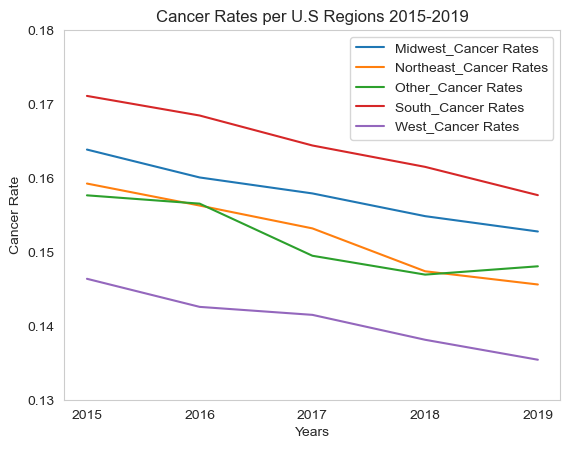

In [520]:
# Final Plot Cancer Rate per U.S Regions 2015-2019 

cancer_data_pivot_final.plot()
plt.title('Cancer Rates per U.S Regions 2015-2019')
plt.xlabel('Years')
plt.ylabel('Cancer Rate')
plt.ylim(.13, .18)
plt.legend(loc='upper right')
plt.grid()

In [521]:
# Merge Cancer and Divorce Data 

Merged_cancer_divorce = pd.merge(cancer_data_pivot_final, divorce_pivot_final, on='Year')
Merged_cancer_divorce

Region,Midwest_Cancer Rates,Northeast_Cancer Rates,Other_Cancer Rates,South_Cancer Rates,West_Cancer Rates,Midwest_Divorce Rates,Northeast_Divorce Rates,Other_Divorce Rates,South_Divorce Rates,West_Divorce Rates
Year,,,,,,,,,,
2015,0.163842,0.159244,0.157650,0.171100,0.14636,2.67,2.955556,2.8,3.480000,3.80
2016,0.160067,0.156267,0.156525,0.168447,0.14256,2.65,2.911111,2.7,3.340000,3.70
2017,0.157908,0.153178,0.149475,0.164393,0.14148,2.57,2.788889,2.5,3.133333,3.60
2018,0.154833,0.147378,0.146925,0.161500,0.13811,2.53,2.822222,2.5,3.093333,3.55
2019,0.152758,0.145589,0.148050,0.157673,0.13541,2.40,2.644444,2.4,3.120000,3.42


In [522]:
# Merge Cancer and Marriage Data 

Merged_cancer_divorce_marriage= pd.merge(Merged_cancer_divorce,marriage_pivot_final, on='Year')
Merged_cancer_divorce_marriage

Region,Midwest_Cancer Rates,Northeast_Cancer Rates,Other_Cancer Rates,South_Cancer Rates,West_Cancer Rates,Midwest_Divorce Rates,Northeast_Divorce Rates,Other_Divorce Rates,South_Divorce Rates,West_Divorce Rates,Midwest_Marriage Rates,Northeast_Marriage Rates,Other_Marriage Rates,South_Marriage Rates,West_Marriage Rates
Year,,,,,,,,,,,,,,,
2015,0.163842,0.159244,0.157650,0.171100,0.14636,2.67,2.955556,2.8,3.480000,3.80,6.225000,6.466667,8.2,7.313333,9.546154
2016,0.160067,0.156267,0.156525,0.168447,0.14256,2.65,2.911111,2.7,3.340000,3.70,6.225000,6.666667,8.1,7.126667,9.415385
2017,0.157908,0.153178,0.149475,0.164393,0.14148,2.57,2.788889,2.5,3.133333,3.60,6.116667,6.566667,8.2,6.973333,9.276923
2018,0.154833,0.147378,0.146925,0.161500,0.13811,2.53,2.822222,2.5,3.093333,3.55,5.825000,6.455556,7.8,6.553333,9.038462
2019,0.152758,0.145589,0.148050,0.157673,0.13541,2.40,2.644444,2.4,3.120000,3.42,5.475000,6.144444,7.8,6.233333,8.692308


In [523]:
# Isolate South cancer Divorce and Marriage Rates 

South_data= Merged_cancer_divorce_marriage[['South_Cancer Rates', 'South_Divorce Rates', 'South_Marriage Rates']]
South_data

Region,South_Cancer Rates,South_Divorce Rates,South_Marriage Rates
Year,,,
2015,0.171100,3.480000,7.313333
2016,0.168447,3.340000,7.126667
2017,0.164393,3.133333,6.973333
2018,0.161500,3.093333,6.553333
2019,0.157673,3.120000,6.233333


In [524]:
# South Cancer Divorce Rates 

South_cancer_data= Merged_cancer_divorce_marriage['South_Cancer Rates']
South_cancer_data

Year
2015    0.171100
2016    0.168447
2017    0.164393
2018    0.161500
2019    0.157673
Name: South_Cancer Rates, dtype: float64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019')])

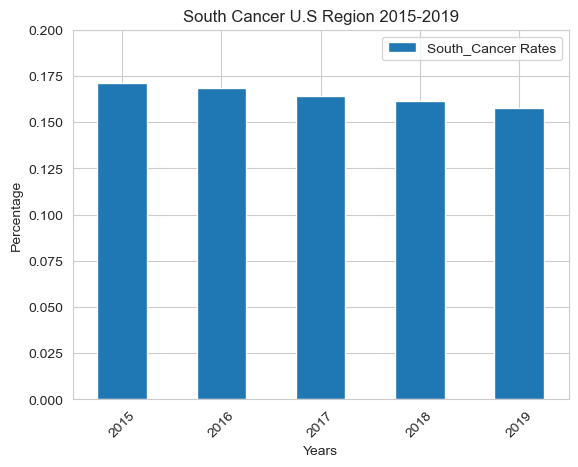

In [525]:
# Bar Plot South Cancer Rates 

South_cancer_data.plot(kind='bar')
plt.title('South Cancer U.S Region 2015-2019')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.ylim(0.00, 0.20)
plt.legend(loc='upper right')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019')])

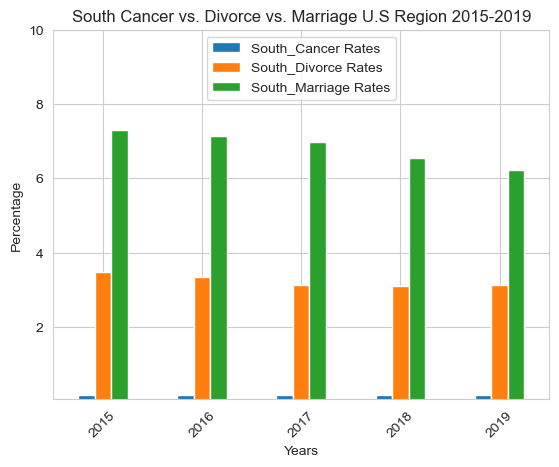

In [526]:
# Final Bar South Cancer vs. Divorce vs. Marriage U.S Region 2015-2019

South_data.plot(kind='bar')
plt.title('South Cancer vs. Divorce vs. Marriage U.S Region 2015-2019')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.ylim(.05, 10)
plt.legend(loc='upper center')
plt.xticks(rotation=45)

In [527]:
# Show Correlation Rate Between Cancer And Divorce Rates 

South_data_correlation= South_data.corr()
South_data_correlation

Region,South_Cancer Rates,South_Divorce Rates,South_Marriage Rates
Region,,,
South_Cancer Rates,1.000000,0.897169,0.980909
South_Divorce Rates,0.897169,1.000000,0.815185
South_Marriage Rates,0.980909,0.815185,1.000000


# Maroofs Code 

In [528]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

%matplotlib inline
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick

In [529]:

# Load all the uploaded CSV files


df_2015 = pd.read_csv (r'C:\Users\memon\.anaconda\Class_Project_Final\Maroofs Resources\2015.csv' )
df_2016 = pd.read_csv (r'C:\Users\memon\.anaconda\Class_Project_Final\Maroofs Resources\2016.csv')
df_2017 = pd.read_csv (r'C:\Users\memon\.anaconda\Class_Project_Final\Maroofs Resources\2017.csv')
df_2018 = pd.read_csv (r'C:\Users\memon\.anaconda\Class_Project_Final\Maroofs Resources\2018.csv')
df_2019 = pd.read_csv (r'C:\Users\memon\.anaconda\Class_Project_Final\Maroofs Resources\2019.csv')


df_2019.head(50)



,Location,Medicaid,Uninsured,Total
0,Alabama,929500,460400,"1,389,900.00"
1,Alaska,149400,80500,"229,900.00"
2,Arizona,1489600,789100,"2,278,700.00"
3,Arkansas,767000,265800,"1,032,800.00"
4,California,9790000,3005400,"12,795,400.00"
5,Colorado,942300,436700,"1,379,000.00"
6,Connecticut,743900,204500,"948,400.00"
7,Delaware,191400,62500,"253,900.00"
8,District of Columbia,171000,24200,"195,200.00"
9,Florida,3643200,2757000,"6,400,200.00"


In [530]:
# Print 2018 Data 

df_2018.head(50)

,Location,Medicaid,Uninsured,Total
0,Alabama,928300,483400,1411700
1,Alaska,151200,85400,236600
2,Arizona,1568300,743500,2311800
3,Arkansas,796600,242000,1038600
4,California,10194300,2774100,12968400
5,Colorado,1027200,425200,1452400
6,Connecticut,715200,185100,900300
7,Delaware,200500,54000,254500
8,District of Columbia,184800,21200,206000
9,Florida,3759600,2741500,6501100


In [531]:
# Print 2017 Data 

df_2017.head(50)

,Location,Medicaid,Uninsured,Total
0,Alabama,977900,452600,1430500
1,Alaska,156400,98700,255100
2,Arizona,1526400,686400,2212800
3,Arkansas,784600,233100,1017700
4,California,10238500,2799600,13038100
5,Colorado,1073700,409800,1483500
6,Connecticut,706200,196500,902700
7,Delaware,166900,52000,218900
8,District of Columbia,184500,23900,208400
9,Florida,3819300,2653500,6472800


In [532]:
# Print 2016 Data 

df_2016.head(50)

,Location,Medicaid,Uninsured,Total
0,Alabama,952800,435200,1388000
1,Alaska,137900,103500,241400
2,Arizona,1585800,674800,2260600
3,Arkansas,771800,232200,1004000
4,California,10466200,2841000,13307200
5,Colorado,1045500,413700,1459200
6,Connecticut,700500,170000,870500
7,Delaware,178900,53500,232400
8,District of Columbia,183900,26000,209900
9,Florida,3825400,2524000,6349400


In [533]:
# Print 2015 Data 

df_2015.head(50)

,Location,Medicaid,Uninsured,Total
0,Alabama,948700,480300,1429000
1,Alaska,140000,102800,242800
2,Arizona,1463900,736600,2200500
3,Arkansas,738400,271500,1009900
4,California,10173800,3276000,13449800
5,Colorado,1021200,430000,1451200
6,Connecticut,683000,210900,893900
7,Delaware,188000,51500,239500
8,District of Columbia,168000,23600,191600
9,Florida,3724900,2653500,6378400


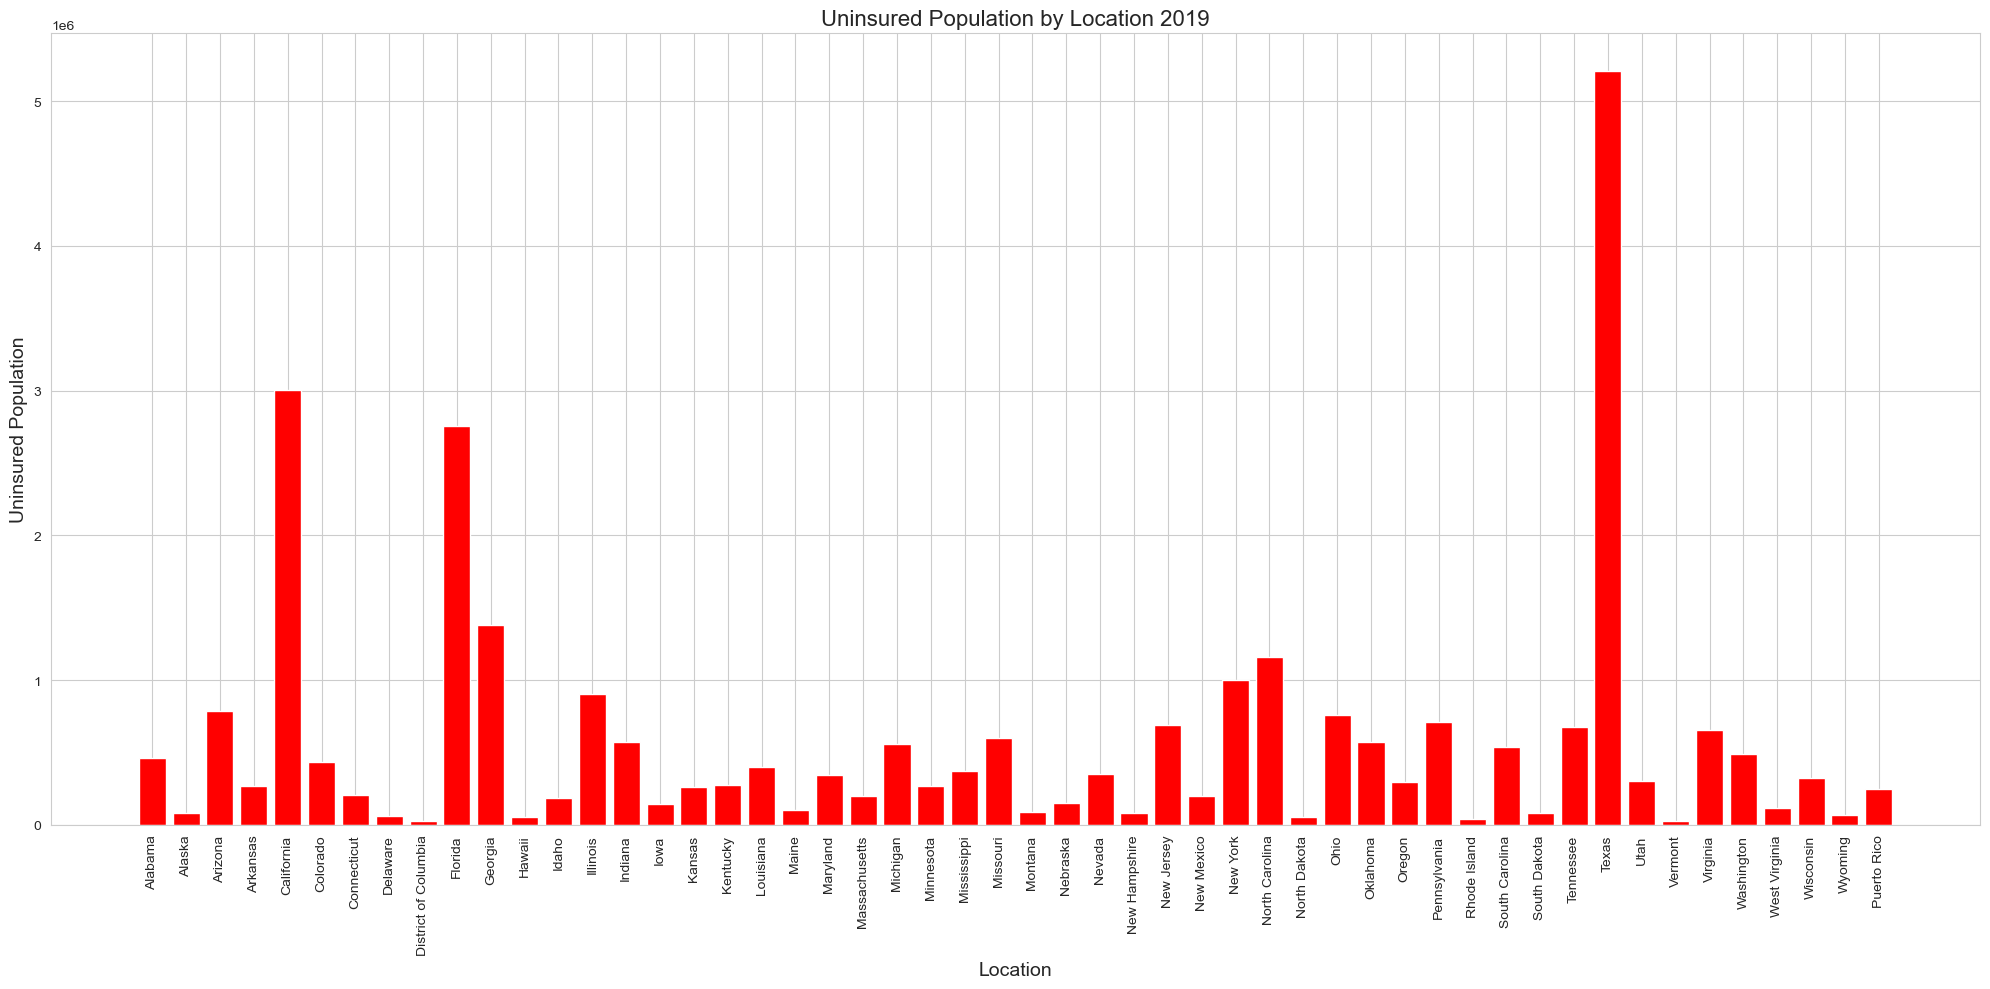

In [534]:
# Plot uninsured people by location
# Convert Medicaid and Uninsured columns to numeric


# Drop rows with NaN values in the Uninsured column
# Plot uninsured people by location with commas for thousands separators
plt.figure(figsize=(20, 10))  # Increase the figure size
bars = plt.bar(df_2019['Location'], df_2019['Uninsured'], color='red')
plt.xlabel('Location', fontsize=14)  # Increase the font size of the labels
plt.ylabel('Uninsured Population', fontsize=14)
plt.title('Uninsured Population by Location 2019', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  # Rotate labels for better spacing and adjust font size
plt.yticks(fontsize=10)
plt.tight_layout()

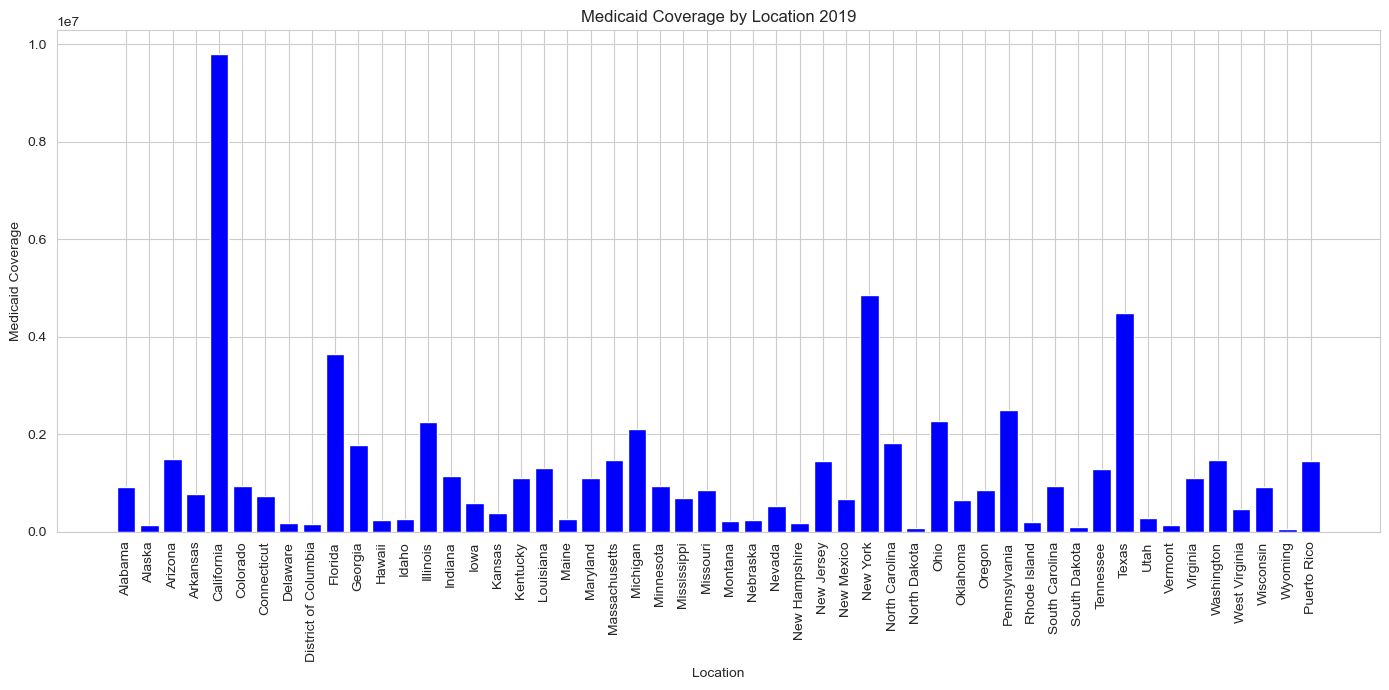

In [535]:
# Plot Medicaid coverage by location
plt.figure(figsize=(14, 7))
plt.bar(df_2019['Location'], df_2019['Medicaid'], color='blue')
plt.xlabel('Location')
plt.ylabel('Medicaid Coverage')
plt.title('Medicaid Coverage by Location 2019')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

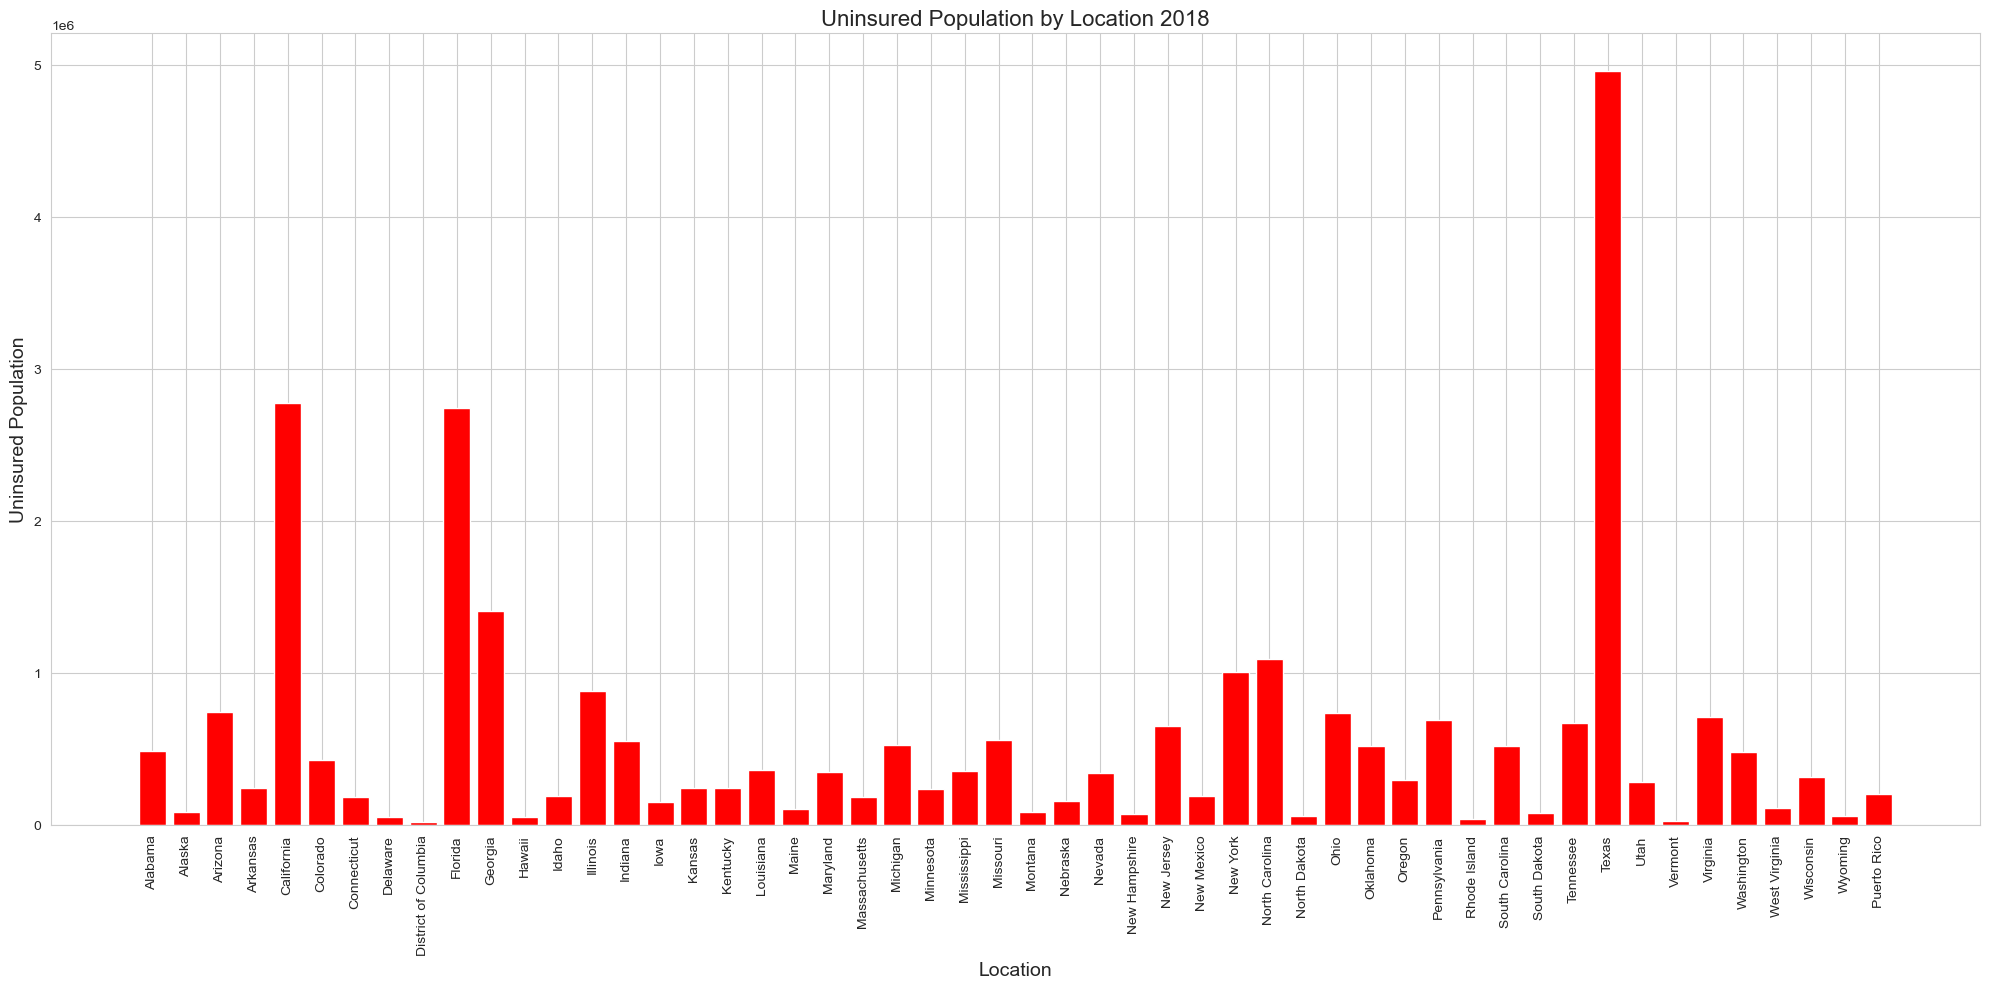

In [536]:
#2018 
# Plot uninsured people by location

# Convert Medicaid and Uninsured columns to numeric


# Drop rows with NaN values in the Uninsured column
# Plot uninsured people by location with commas for thousands separators
plt.figure(figsize=(20, 10))  # Increase the figure size
bars = plt.bar(df_2018['Location'], df_2018['Uninsured'], color='red')
plt.xlabel('Location', fontsize=14)  # Increase the font size of the labels
plt.ylabel('Uninsured Population', fontsize=14)
plt.title('Uninsured Population by Location 2018', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  # Rotate labels for better spacing and adjust font size
plt.yticks(fontsize=10)
plt.tight_layout()

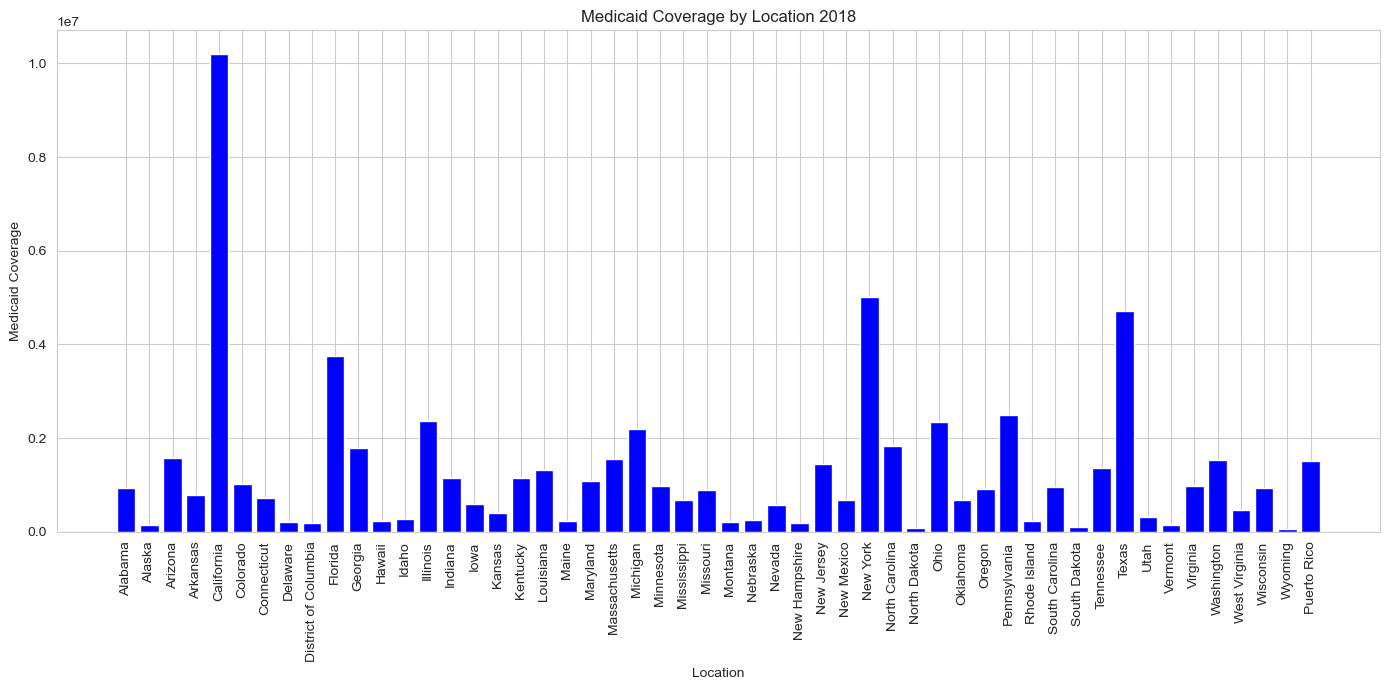

In [537]:
# Plot Medicaid coverage by location
plt.figure(figsize=(14, 7))
plt.bar(df_2018['Location'], df_2018['Medicaid'], color='blue')
plt.xlabel('Location')
plt.ylabel('Medicaid Coverage')
plt.title('Medicaid Coverage by Location 2018')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

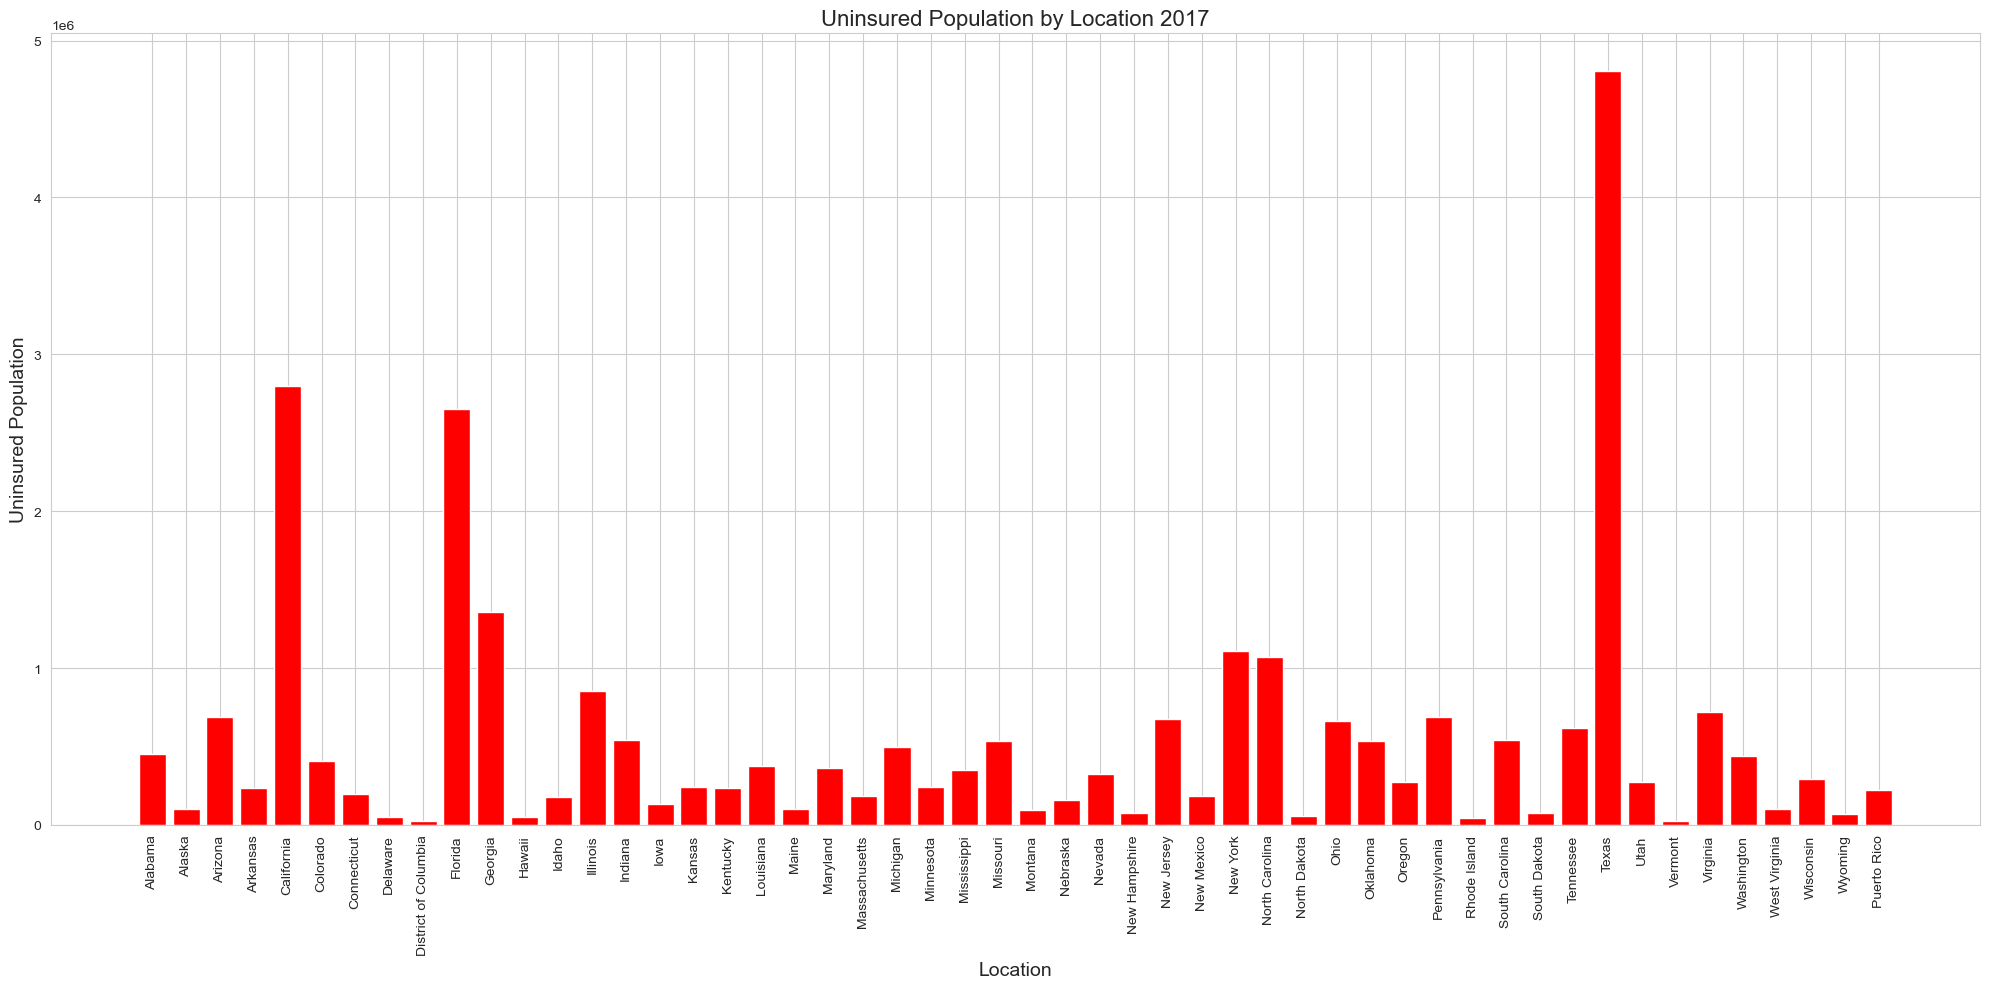

In [538]:
#2017 
# Plot uninsured people by location

# Convert Medicaid and Uninsured columns to numeric


# Drop rows with NaN values in the Uninsured column
# Plot uninsured people by location with commas for thousands separators
plt.figure(figsize=(20, 10))  # Increase the figure size
bars = plt.bar(df_2017['Location'], df_2017['Uninsured'], color='red')
plt.xlabel('Location', fontsize=14)  # Increase the font size of the labels
plt.ylabel('Uninsured Population', fontsize=14)
plt.title('Uninsured Population by Location 2017', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  # Rotate labels for better spacing and adjust font size
plt.yticks(fontsize=10)
plt.tight_layout()

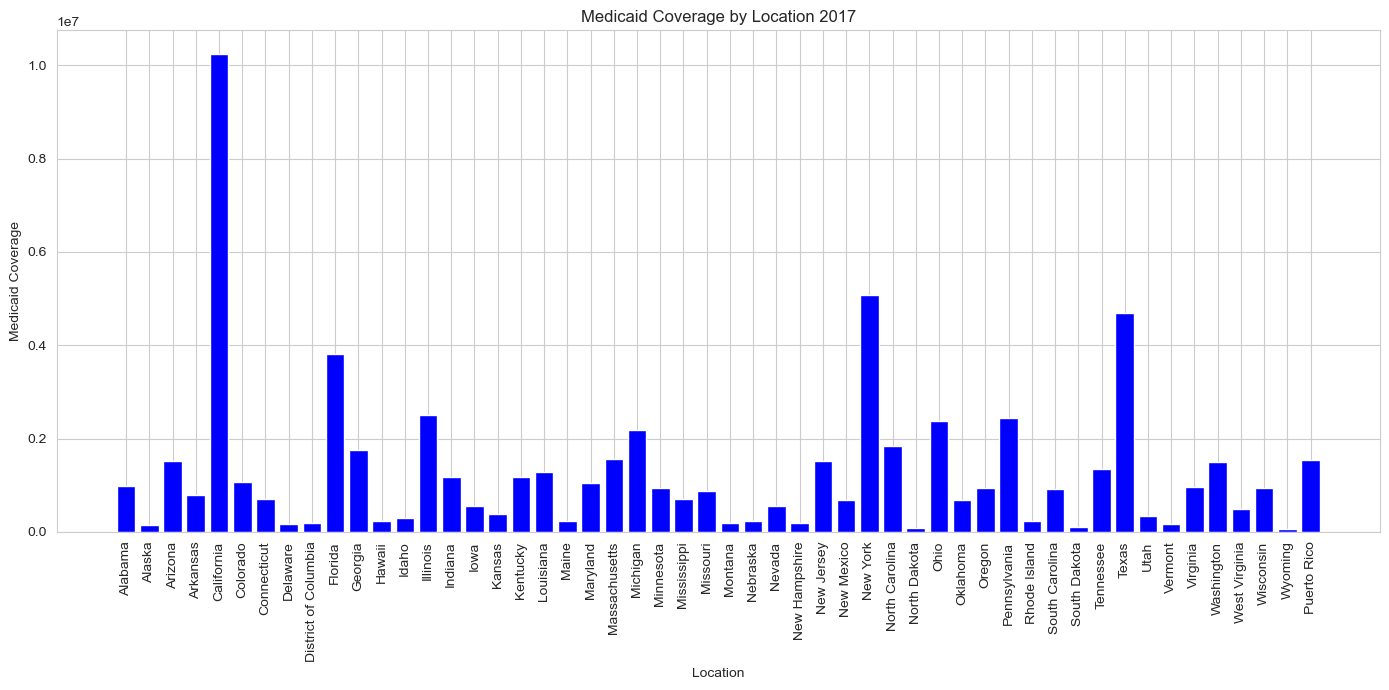

In [539]:
# Plot Medicaid coverage by location
plt.figure(figsize=(14, 7))
plt.bar(df_2017['Location'], df_2017['Medicaid'], color='blue')
plt.xlabel('Location')
plt.ylabel('Medicaid Coverage')
plt.title('Medicaid Coverage by Location 2017')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

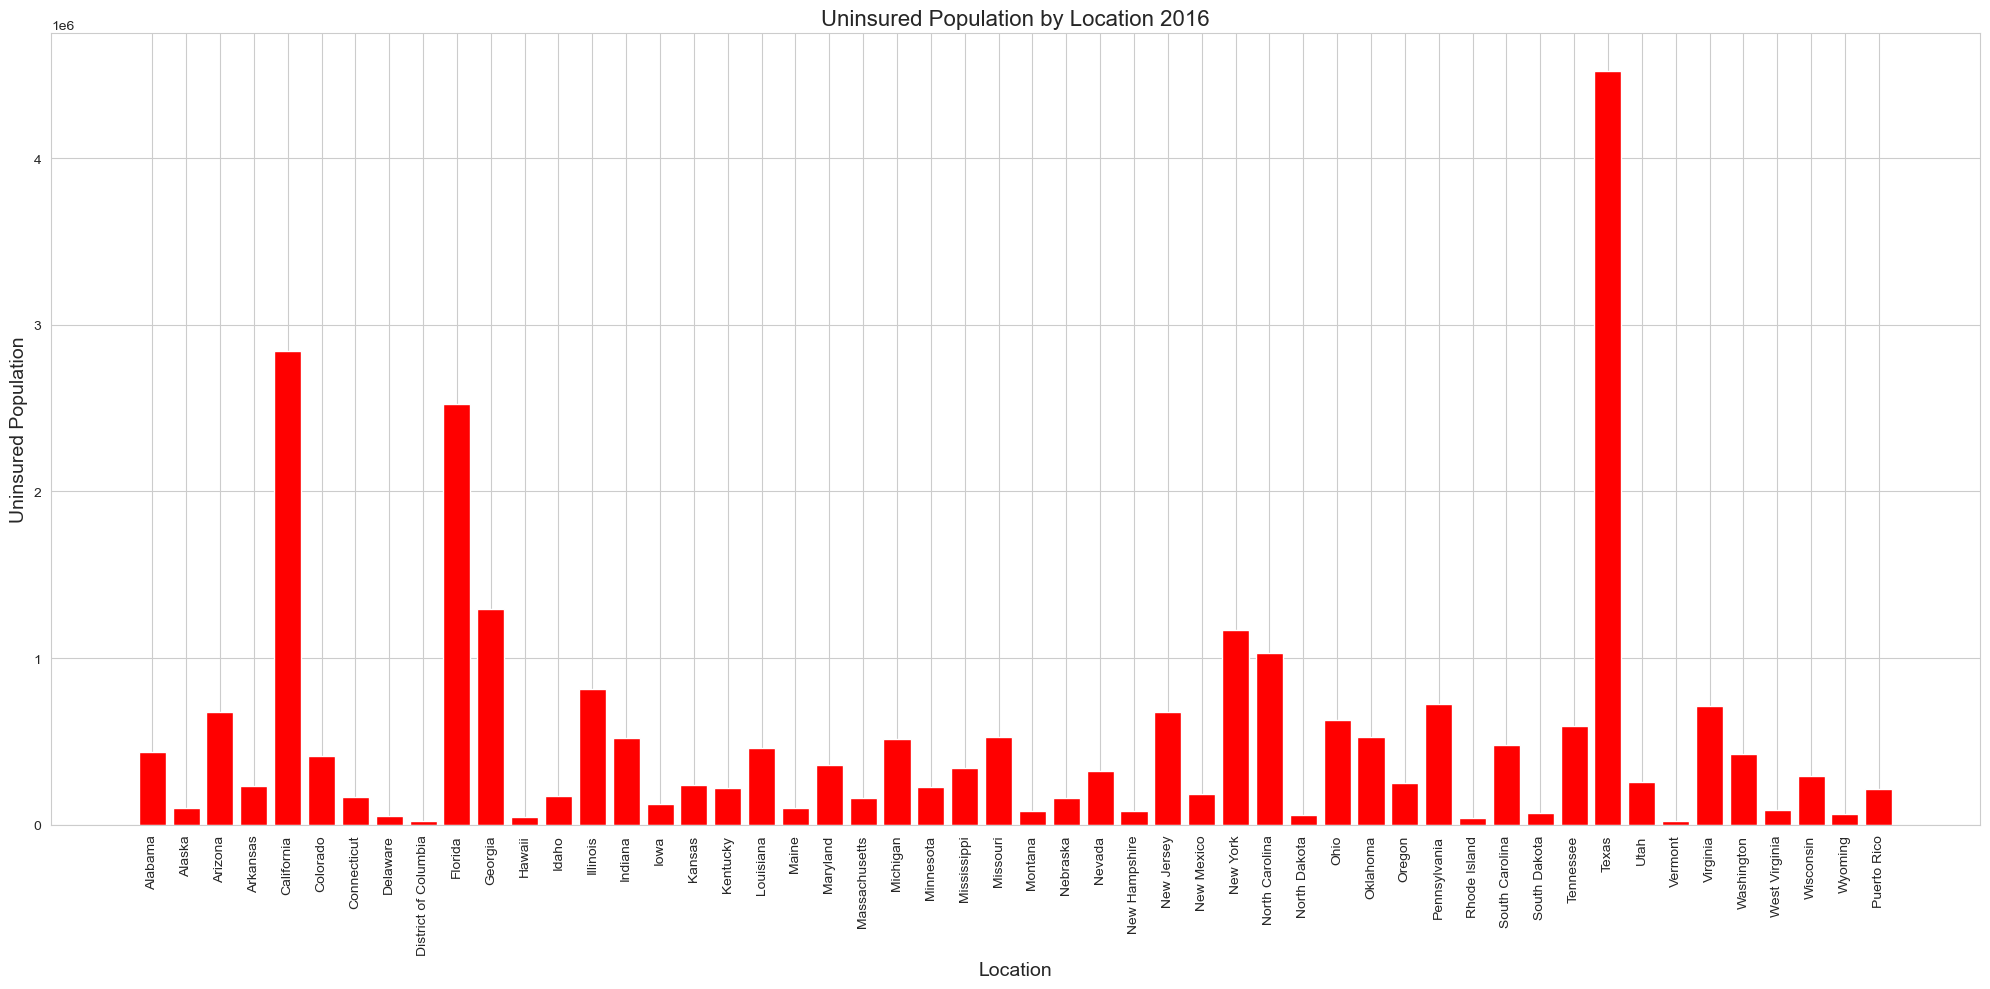

In [540]:
# Plot uninsured people by location
# Convert Medicaid and Uninsured columns to numeric


# Drop rows with NaN values in the Uninsured column
# Plot uninsured people by location with commas for thousands separators
plt.figure(figsize=(20, 10))  # Increase the figure size
bars = plt.bar(df_2016['Location'], df_2016['Uninsured'], color='red')
plt.xlabel('Location', fontsize=14)  # Increase the font size of the labels
plt.ylabel('Uninsured Population', fontsize=14)
plt.title('Uninsured Population by Location 2016', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  # Rotate labels for better spacing and adjust font size
plt.yticks(fontsize=10)
plt.tight_layout()

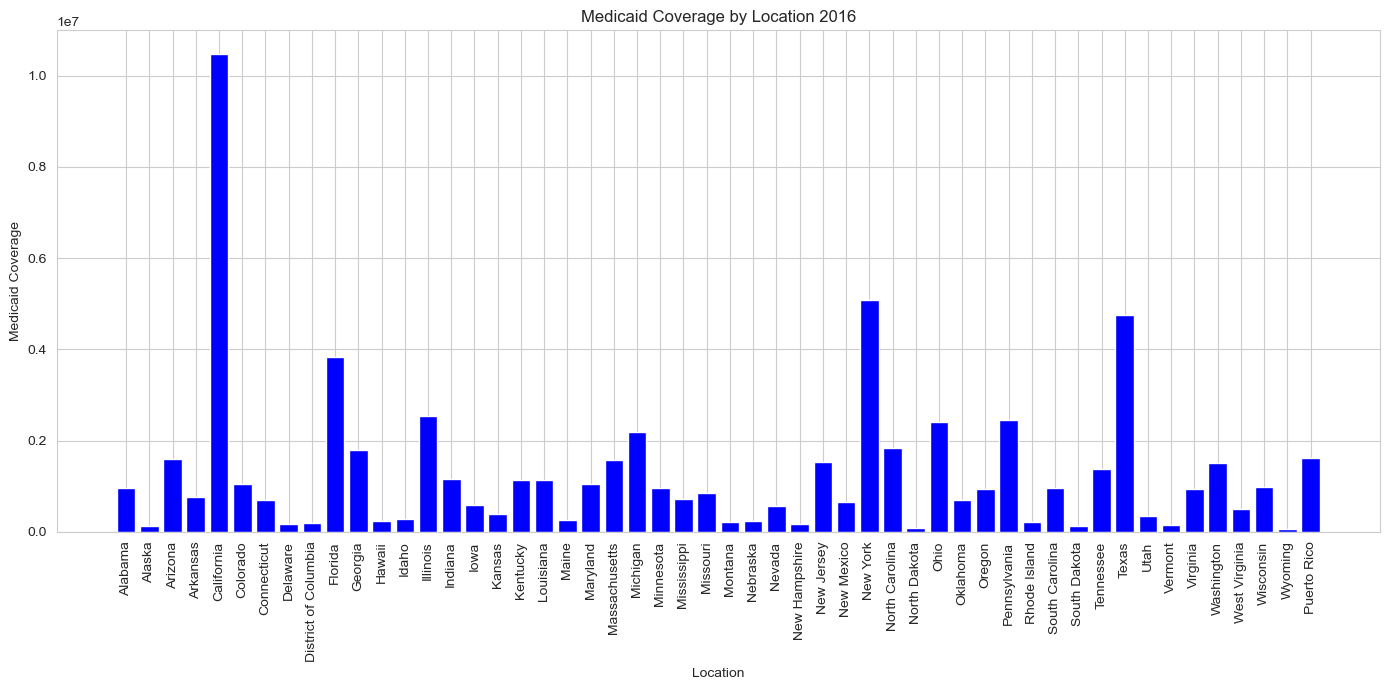

In [541]:
# Plot Medicaid coverage by location
plt.figure(figsize=(14, 7))
plt.bar(df_2016['Location'], df_2016['Medicaid'], color='blue')
plt.xlabel('Location')
plt.ylabel('Medicaid Coverage')
plt.title('Medicaid Coverage by Location 2016')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

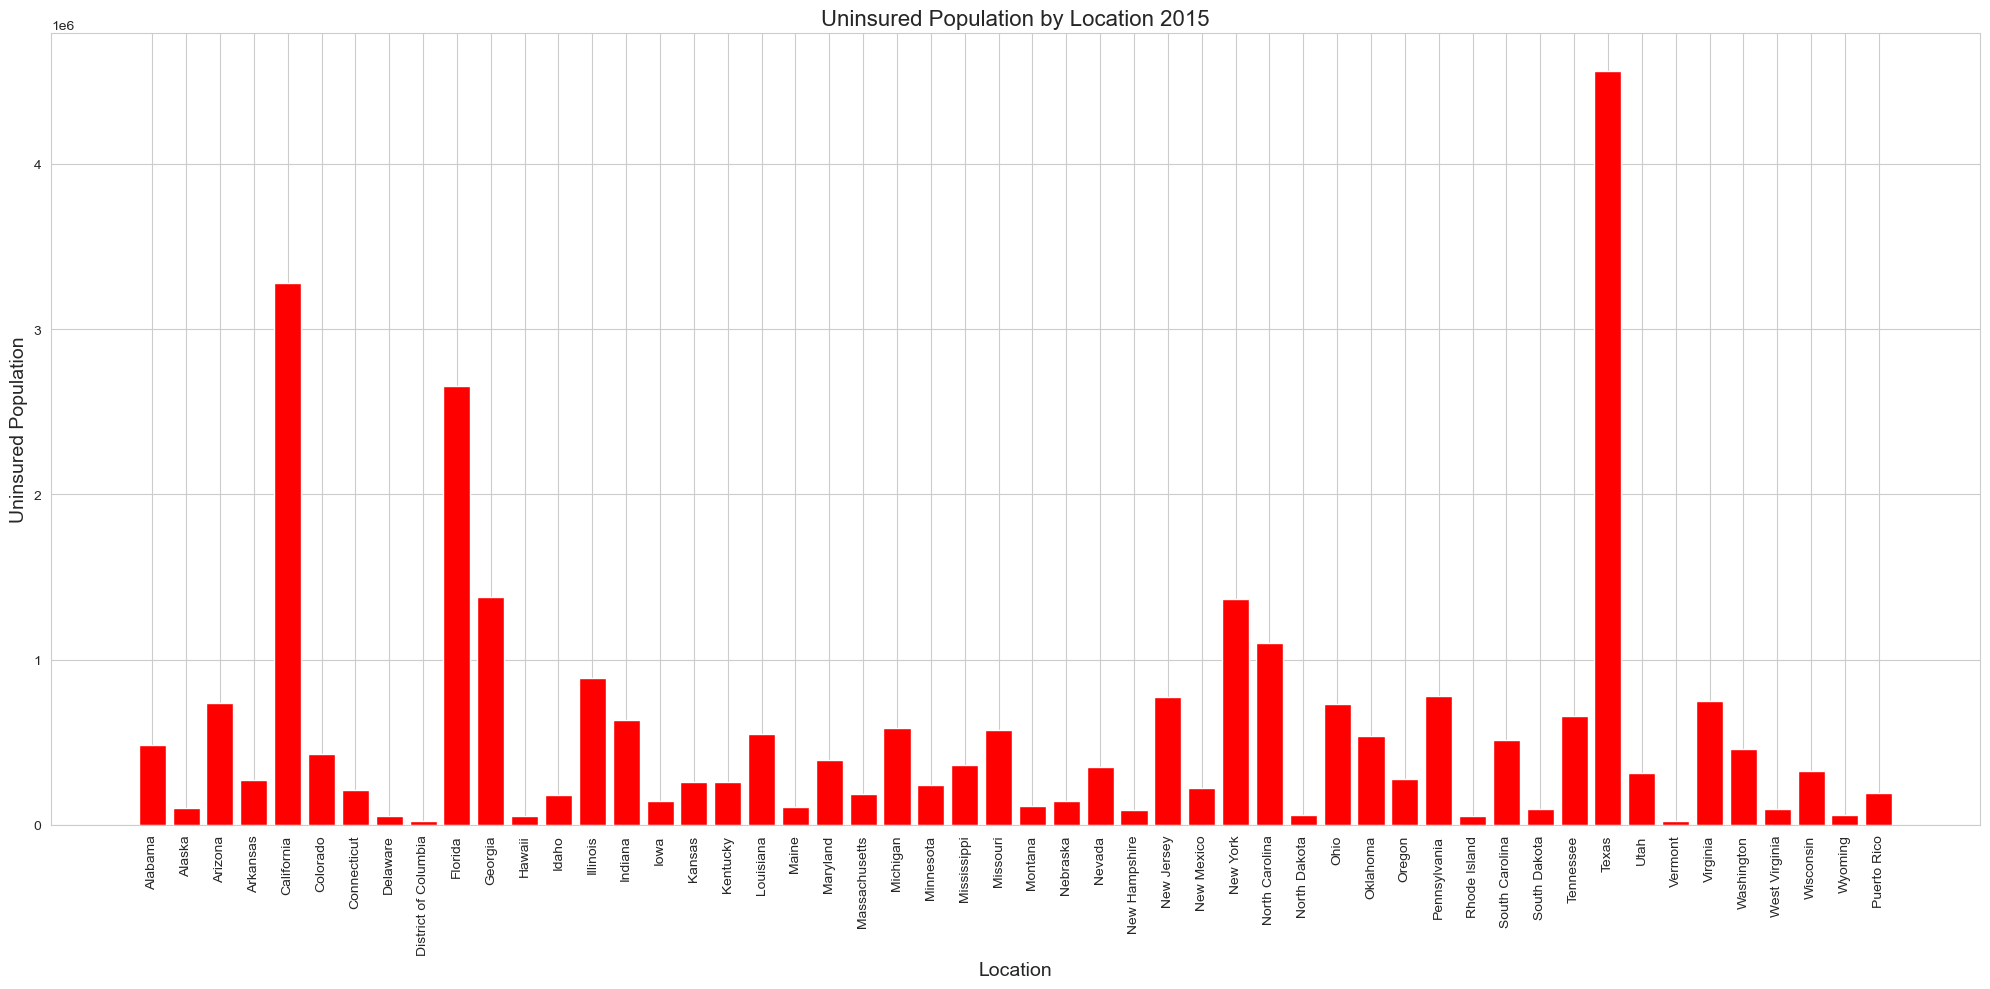

In [542]:
# Plot uninsured people by location
# Convert Medicaid and Uninsured columns to numeric


# Drop rows with NaN values in the Uninsured column
# Plot uninsured people by location with commas for thousands separators
plt.figure(figsize=(20, 10))  # Increase the figure size
bars = plt.bar(df_2015['Location'], df_2015['Uninsured'], color='red')
plt.xlabel('Location', fontsize=14)  # Increase the font size of the labels
plt.ylabel('Uninsured Population', fontsize=14)
plt.title('Uninsured Population by Location 2015', fontsize=16)
plt.xticks(rotation=90, fontsize=10)  # Rotate labels for better spacing and adjust font size
plt.yticks(fontsize=10)
plt.tight_layout()

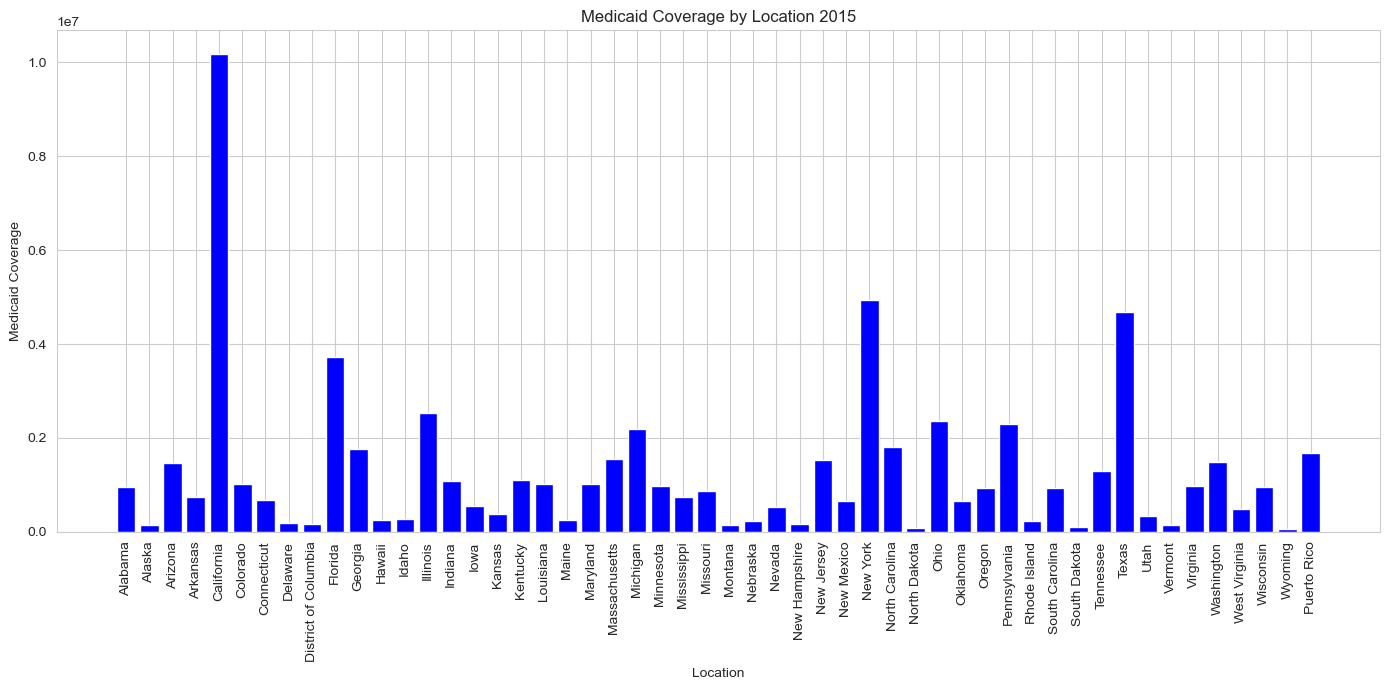

In [543]:
# Plot Medicaid coverage by location
plt.figure(figsize=(14, 7))
plt.bar(df_2015['Location'], df_2015['Medicaid'], color='blue')
plt.xlabel('Location')
plt.ylabel('Medicaid Coverage')
plt.title('Medicaid Coverage by Location 2015')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

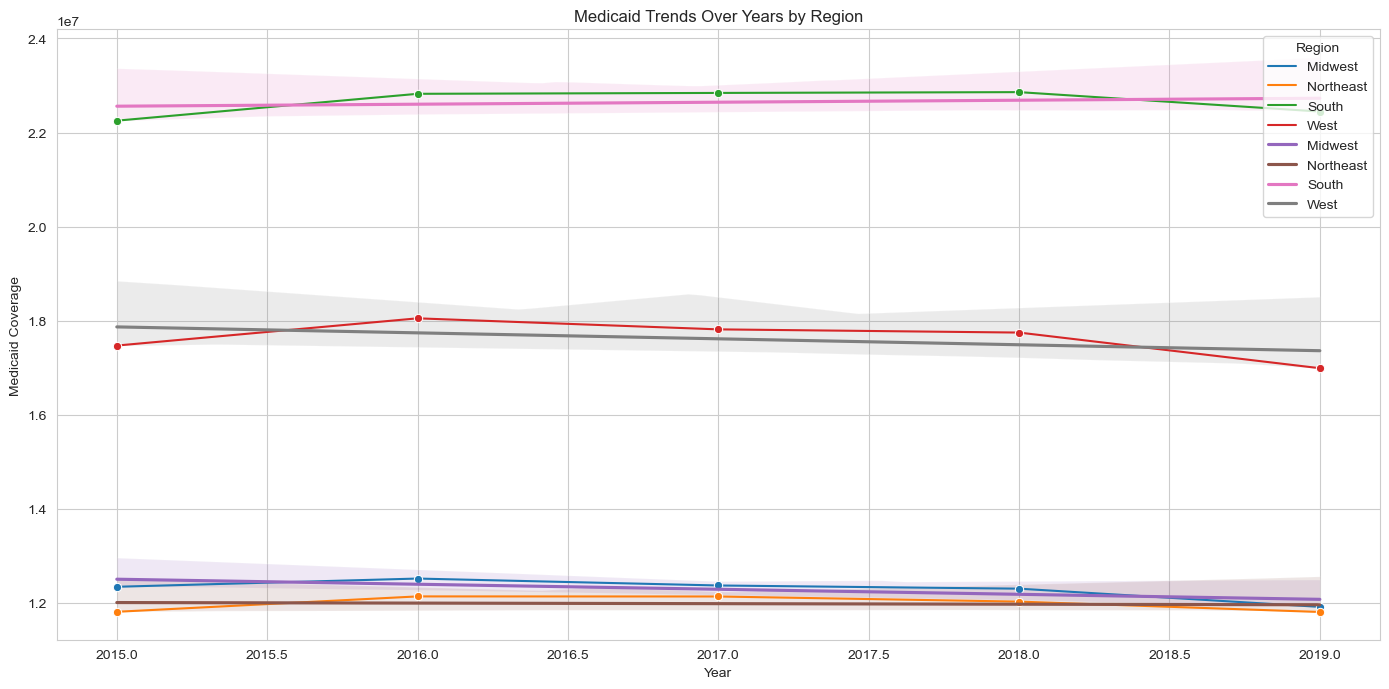

c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

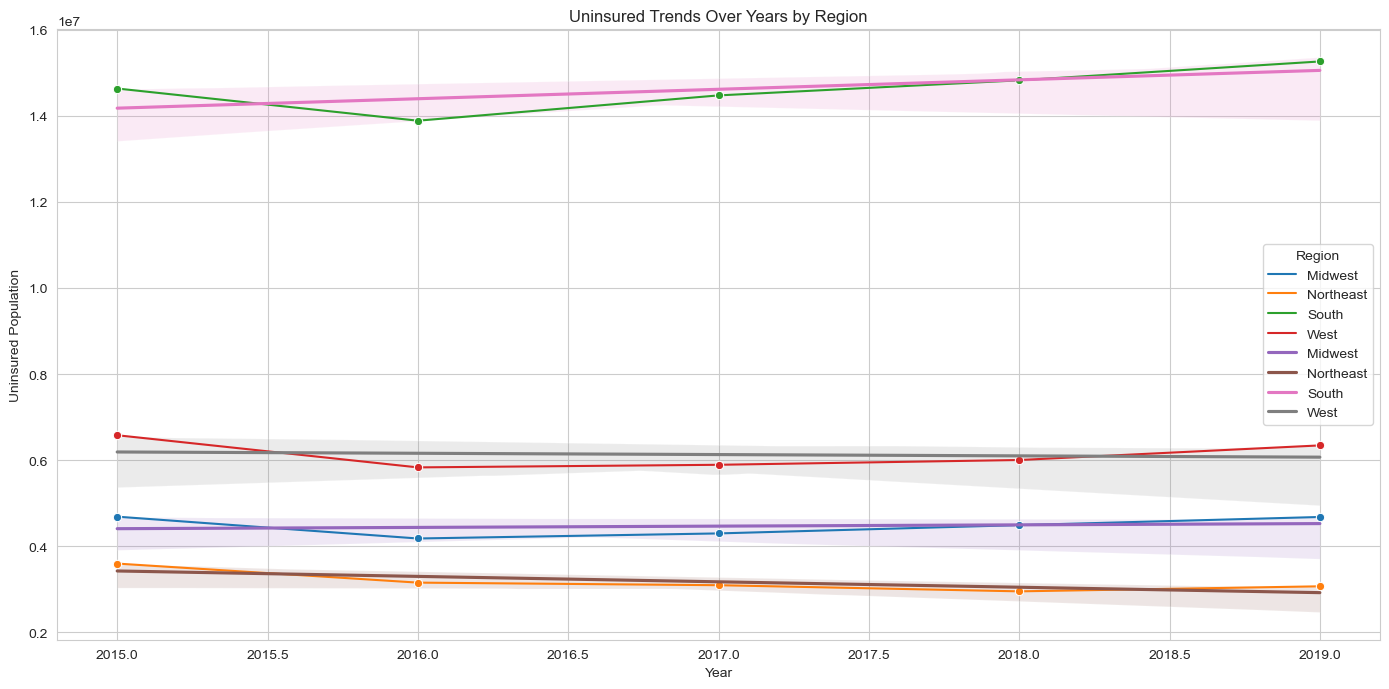

In [544]:
# Add a year column to each dataframe
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

# Rename columns if necessary
for df in [df_2015, df_2016, df_2017, df_2018, df_2019]:
    df.rename(columns={'location': 'Location', 'medicaid': 'Medicaid', 'uninsured': 'Uninsured'}, inplace=True)

# Concatenate all dataframes
combined_df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

# Define the regions for each state
regions = {
    "Northeast": ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont", 
                  "New Jersey", "New York", "Pennsylvania"],
    "Midwest": ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", "Kansas", "Minnesota", 
                "Missouri", "Nebraska", "North Dakota", "South Dakota"],
    "South": ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", 
              "District of Columbia", "West Virginia", "Alabama", "Kentucky", "Mississippi", "Tennessee", 
              "Arkansas", "Louisiana", "Oklahoma", "Texas"],
    "West": ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming", 
             "Alaska", "California", "Hawaii", "Oregon", "Washington"]
}

# Create a mapping from state to region
state_to_region = {}
for region, states in regions.items():
    for state in states:
        state_to_region[state] = region

# Add a region column to the dataframe
combined_df['Region'] = combined_df['Location'].map(state_to_region)

# Replace infinite values with NaN
combined_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Drop any remaining rows with NaN values
combined_df.dropna(inplace=True)

# Create a pivot table with years as columns and region and location as indices
pivot_df = combined_df.pivot_table(
    index=['Region', 'Location'],
    columns='Year',
    values=['Medicaid', 'Uninsured'],
    aggfunc='sum'
)

# Reorder the columns to have Medicaid and Uninsured in sequence for each year
pivot_df = pivot_df.swaplevel(axis=1).sort_index(axis=1)

# Display the pivot table
display(HTML(pivot_df.to_html()))

# Group by Region and Year and sum the values
trend_df = combined_df.groupby(['Region', 'Year']).sum(numeric_only=True).reset_index()

# Plot Medicaid trends over the years by region with trend lines
plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_df, x='Year', y='Medicaid', hue='Region', marker='o')
for region in trend_df['Region'].unique():
    sns.regplot(data=trend_df[trend_df['Region'] == region], x='Year', y='Medicaid', scatter=False, label=region)
plt.title('Medicaid Trends Over Years by Region')
plt.xlabel('Year')
plt.ylabel('Medicaid Coverage')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Uninsured trends over the years by region with trend lines
plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_df, x='Year', y='Uninsured', hue='Region', marker='o')
for region in trend_df['Region'].unique():
    sns.regplot(data=trend_df[trend_df['Region'] == region], x='Year', y='Uninsured', scatter=False, label=region)
plt.title('Uninsured Trends Over Years by Region')
plt.xlabel('Year')
plt.ylabel('Uninsured Population')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

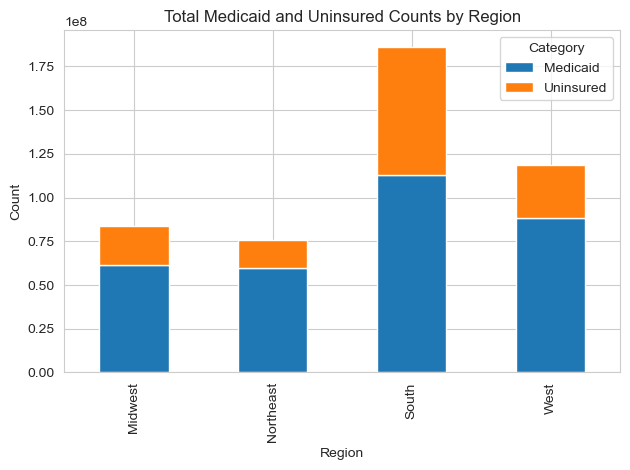

In [545]:
# Group by region and calculate the total Medicaid and Uninsured counts
region_totals = combined_df.groupby('Region')[['Medicaid', 'Uninsured']].sum().reset_index()

# Plot total Medicaid and Uninsured counts by region
plt.figure(figsize=(14, 7))
region_totals.set_index('Region').plot(kind='bar', stacked=True)
plt.title('Total Medicaid and Uninsured Counts by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

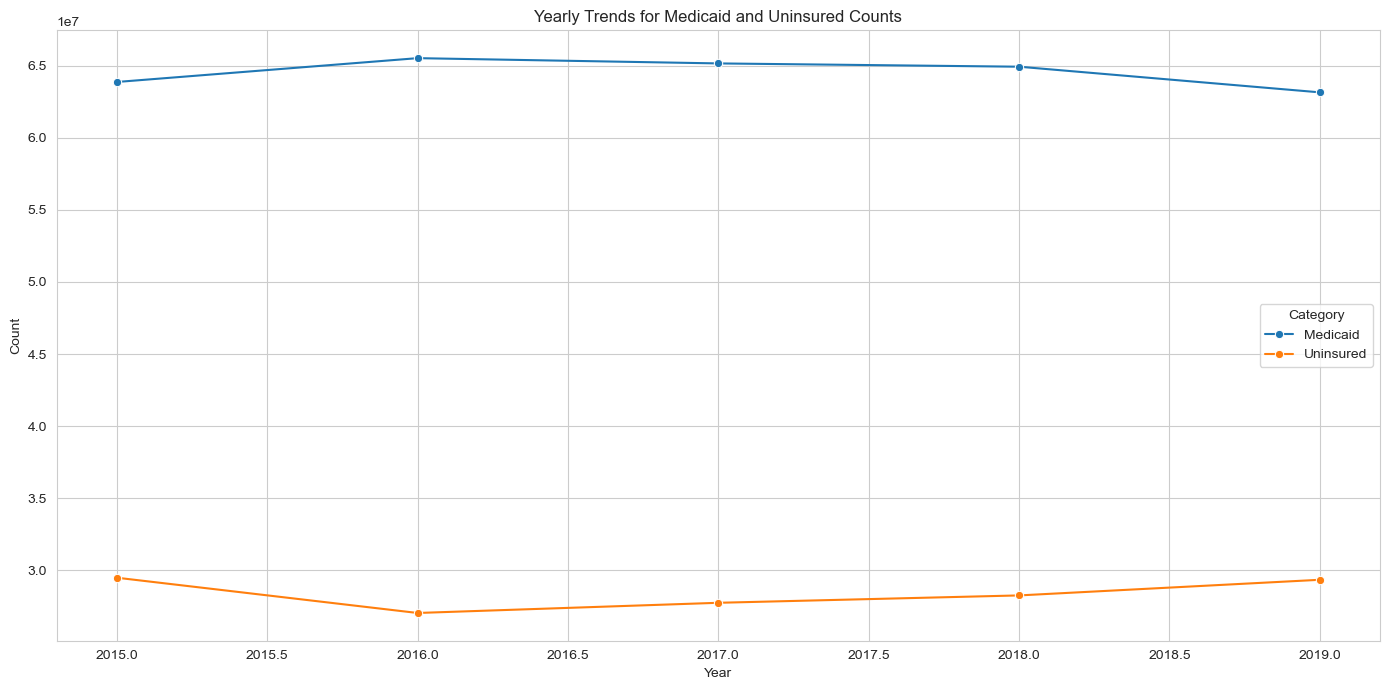

In [546]:
# Group by year and calculate the total Medicaid and Uninsured counts
yearly_totals = combined_df.groupby('Year')[['Medicaid', 'Uninsured']].sum().reset_index()

# Plot yearly trends for Medicaid and Uninsured counts
plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_totals, x='Year', y='Medicaid', marker='o', label='Medicaid')
sns.lineplot(data=yearly_totals, x='Year', y='Uninsured', marker='o', label='Uninsured')
plt.title('Yearly Trends for Medicaid and Uninsured Counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Category')
plt.grid(True)
plt.tight_layout()
plt.show()

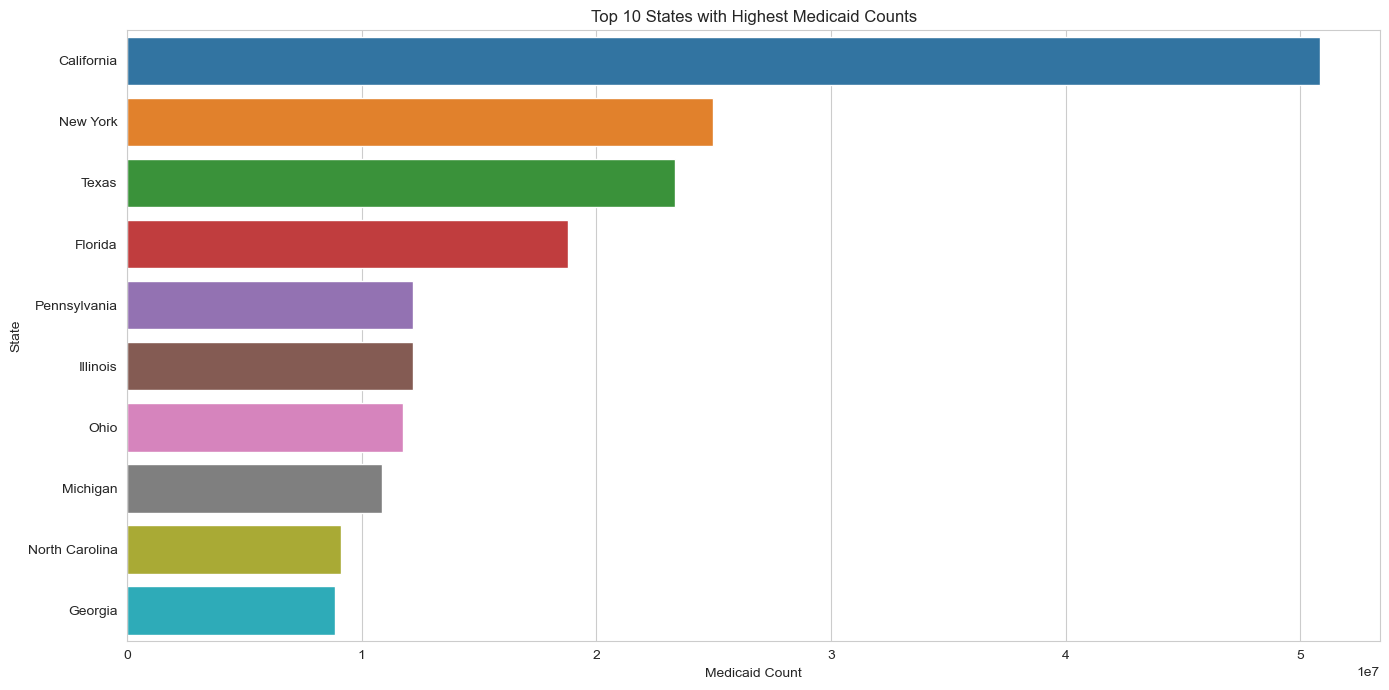

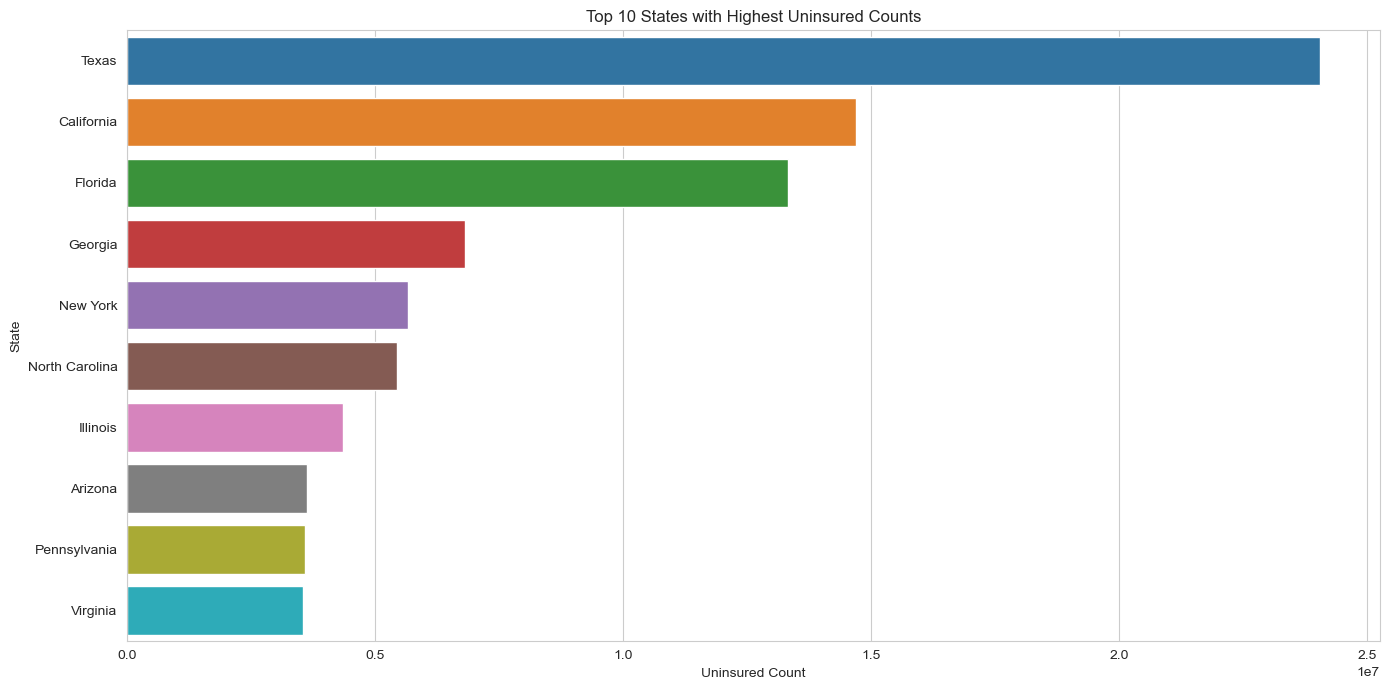

In [547]:
# Identify the top states with the highest Medicaid and Uninsured counts
top_states_medicaid = combined_df.groupby('Location')['Medicaid'].sum().nlargest(10).reset_index()
top_states_uninsured = combined_df.groupby('Location')['Uninsured'].sum().nlargest(10).reset_index()

# Plot top states with the highest Medicaid counts
plt.figure(figsize=(14, 7))
sns.barplot(data=top_states_medicaid, x='Medicaid', y='Location')
plt.title('Top 10 States with Highest Medicaid Counts')
plt.xlabel('Medicaid Count')
plt.ylabel('State')
plt.tight_layout()
plt.show()

# Plot top states with the highest Uninsured counts
plt.figure(figsize=(14, 7))
sns.barplot(data=top_states_uninsured, x='Uninsured', y='Location')
plt.title('Top 10 States with Highest Uninsured Counts')
plt.xlabel('Uninsured Count')
plt.ylabel('State')
plt.tight_layout()
plt.show()

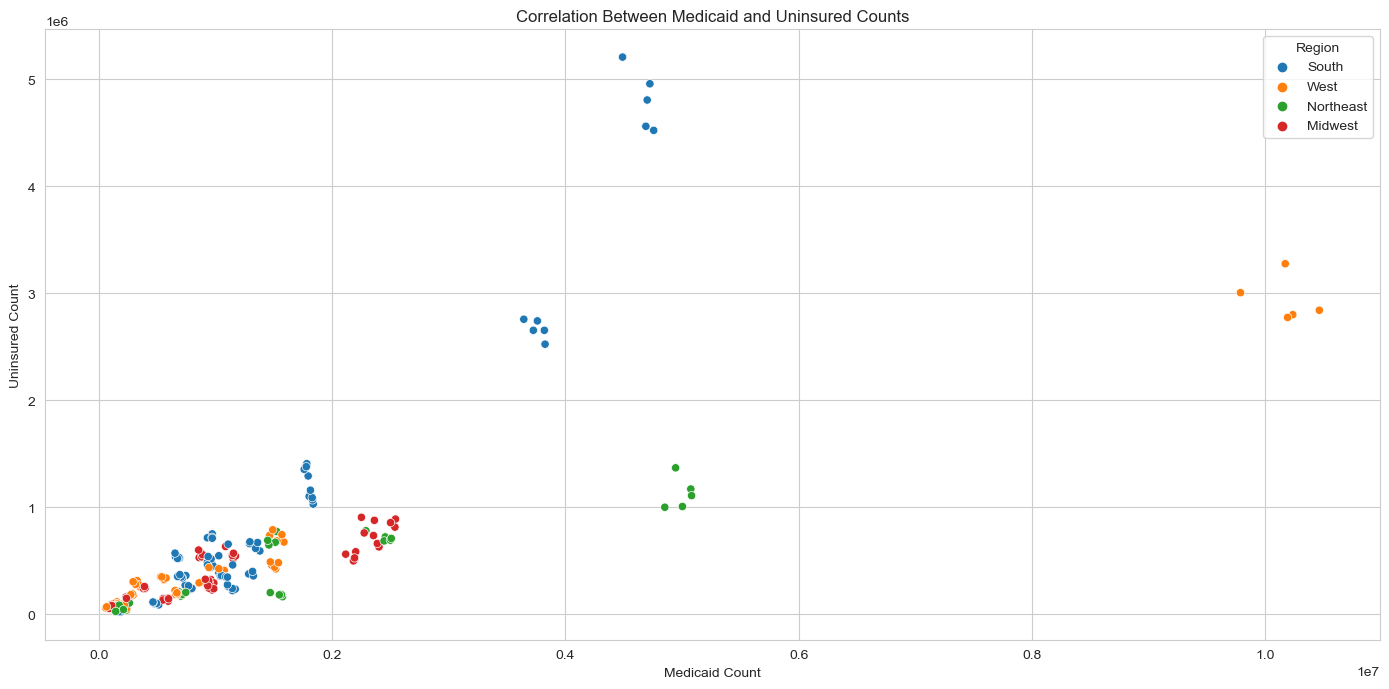

Correlation Coefficient:
           Medicaid  Uninsured
Medicaid   1.000000   0.779519
Uninsured  0.779519   1.000000


In [548]:
# Scatter plot to analyze the correlation between Medicaid and Uninsured counts
plt.figure(figsize=(14, 7))
sns.scatterplot(data=combined_df, x='Medicaid', y='Uninsured', hue='Region')
plt.title('Correlation Between Medicaid and Uninsured Counts')
plt.xlabel('Medicaid Count')
plt.ylabel('Uninsured Count')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation = combined_df[['Medicaid', 'Uninsured']].corr()
print("Correlation Coefficient:")
print(correlation)

In [549]:
# Reading Yearly Medicaid Rates File 

df_2015_rates = pd.read_csv (r'C:\Users\memon\.anaconda\Class_Project_Final\Maroofs Resources\2015 rate.csv' )
df_2016_rates = pd.read_csv (r'C:\Users\memon\.anaconda\Class_Project_Final\Maroofs Resources\2016 rates .csv')
df_2017_rates = pd.read_csv (r'C:\Users\memon\.anaconda\Class_Project_Final\Maroofs Resources\2017 rate .csv')
df_2018_rates = pd.read_csv (r'C:\Users\memon\.anaconda\Class_Project_Final\Maroofs Resources\2018 rates .csv')
df_2019_rates = pd.read_csv ( r'C:\Users\memon\.anaconda\Class_Project_Final\Maroofs Resources\2019 rate .csv')
df_2015_rates


,Location,Medicaid
0,Alabama,0.201
1,Alaska,0.198
2,Arizona,0.220
3,Arkansas,0.256
4,California,0.265
5,Colorado,0.192
6,Connecticut,0.196
7,Delaware,0.205
8,District of Columbia,0.265
9,Florida,0.188


In [550]:
# Assinging States to Region 

regions = {
    "Northeast": ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont", 
                  "New Jersey", "New York", "Pennsylvania"],
    "Midwest": ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", "Kansas", "Minnesota", 
                "Missouri", "Nebraska", "North Dakota", "South Dakota"],
    "South": ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", 
              "District of Columbia", "West Virginia", "Alabama", "Kentucky", "Mississippi", "Tennessee", 
              "Arkansas", "Louisiana", "Oklahoma", "Texas"],
    "West": ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming", 
             "Alaska", "California", "Hawaii", "Oregon", "Washington"]
}

# Create a mapping from state to region
state_to_region = {state: region for region, states in regions.items() for state in states}

# Add a region column to the dataframe
df_2015_rates['Region'] = df_2015_rates['Location'].map(state_to_region)


df_2015_rates.head(51)

,Location,Medicaid,Region
0,Alabama,0.201,South
1,Alaska,0.198,West
2,Arizona,0.220,West
3,Arkansas,0.256,South
4,California,0.265,West
5,Colorado,0.192,West
6,Connecticut,0.196,Northeast
7,Delaware,0.205,South
8,District of Columbia,0.265,South
9,Florida,0.188,South


In [551]:
# Calculate the average Medicaid rate by region
region_rates_2015 = df_2015_rates.groupby('Region')['Medicaid'].mean().reset_index()


region_rates_2015

,Region,Medicaid
0,Midwest,0.166167
1,Northeast,0.206889
2,South,0.207588
3,West,0.197231


c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\memon\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-

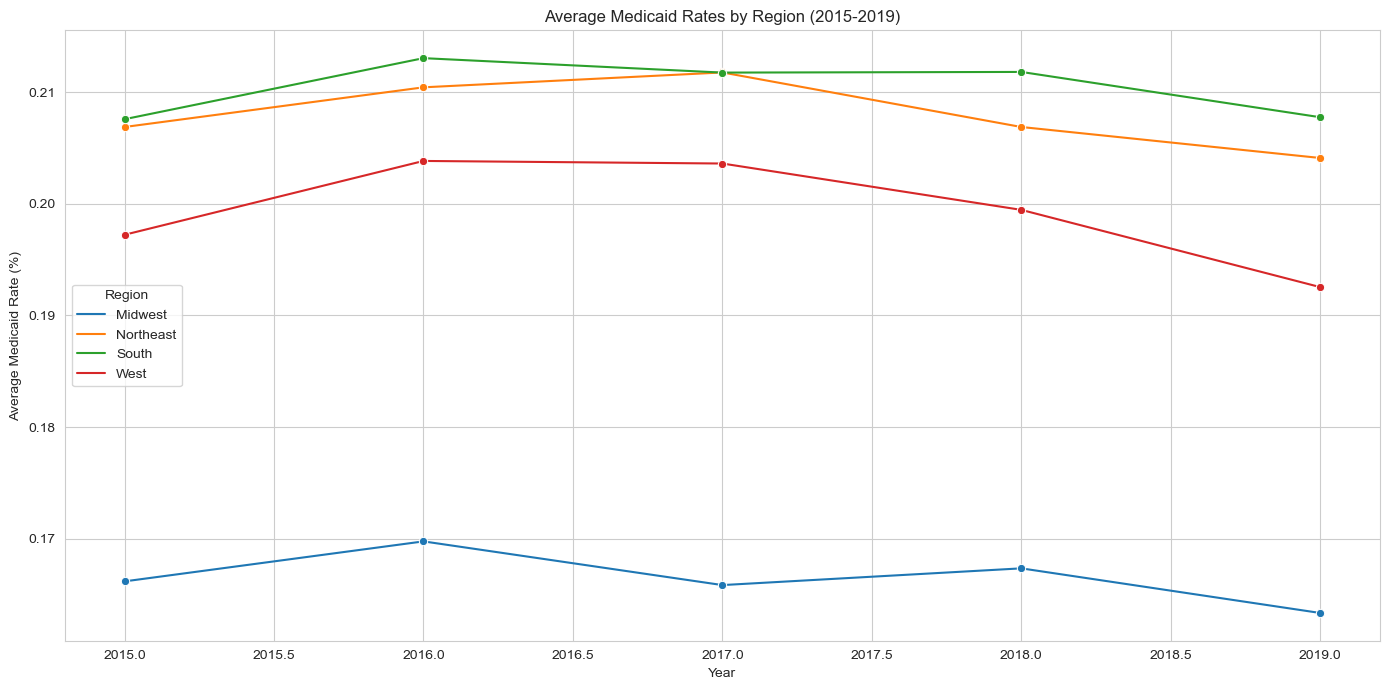

In [552]:

# Assigning Values to File 

df_2015_rates['Year'] = 2015
df_2016_rates['Year'] = 2016
df_2017_rates['Year'] = 2017
df_2018_rates['Year'] = 2018
df_2019_rates['Year'] = 2019

# Concatenate all dataframes into one
combined_df = pd.concat([df_2015_rates, df_2016_rates, df_2017_rates, df_2018_rates, df_2019_rates], ignore_index=True)

# Define the regions for each state
regions = {
    "Northeast": ["Connecticut", "Maine", "Massachusetts", "New Hampshire", "Rhode Island", "Vermont", 
                  "New Jersey", "New York", "Pennsylvania"],
    "Midwest": ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", "Iowa", "Kansas", "Minnesota", 
                "Missouri", "Nebraska", "North Dakota", "South Dakota"],
    "South": ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", "Virginia", 
              "District of Columbia", "West Virginia", "Alabama", "Kentucky", "Mississippi", "Tennessee", 
              "Arkansas", "Louisiana", "Oklahoma", "Texas"],
    "West": ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", "Utah", "Wyoming", 
             "Alaska", "California", "Hawaii", "Oregon", "Washington"]
}

# Create a mapping from state to region
state_to_region = {state: region for region, states in regions.items() for state in states}

# Add a region column to the dataframe
combined_df['Region'] = combined_df['Location'].map(state_to_region)

# Group by Region and Year and calculate the average Medicaid rate
average_medicaid_rate_by_region = combined_df.groupby(['Region', 'Year'])['Medicaid'].mean().reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a line plot to compare Medicaid rates by region over the years
plt.figure(figsize=(14, 7))
sns.lineplot(data=average_medicaid_rate_by_region, x='Year', y='Medicaid', hue='Region', marker='o')

# Add titles and labels
plt.title('Average Medicaid Rates by Region (2015-2019)')
plt.xlabel('Year')
plt.ylabel('Average Medicaid Rate (%)')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

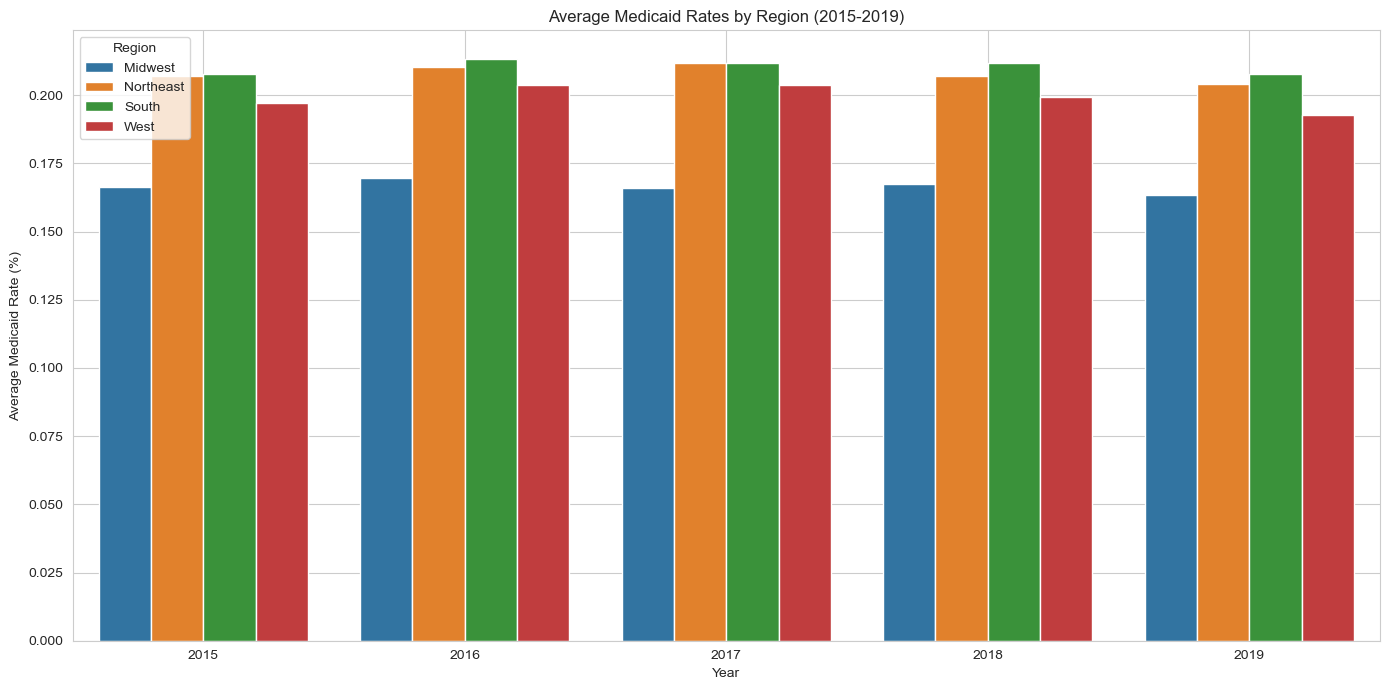

In [553]:
# Set the  style of the plots
sns.set_style("whitegrid")

# Create a bar plot to compare Medicaid rates by region over the years
plt.figure(figsize=(14, 7))
sns.barplot(data=average_medicaid_rate_by_region, x='Year', y='Medicaid', hue='Region')

# Add titles and labels
plt.title('Average Medicaid Rates by Region (2015-2019)')
plt.xlabel('Year')
plt.ylabel('Average Medicaid Rate (%)')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

# Combined Data Graphs 

In [ ]:

# Define the state_abbrev_to_name dictionary again as it might have been lost in the previous steps
state_abbrev_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois',
    'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
    'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota',
    'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia',
    'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Define the regions_to_states dictionary
regions_to_states = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 
                  'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 
                'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 
              'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 
              'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 
             'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

# Reverse map for states to regions
states_to_regions = {state: region for region, states in regions_to_states.items() for state in states}




# Load cancer data files for the years 2015 to 2019
cancer_2015 = pd.read_csv('Aaliyahs Resources/CANCER_20155.csv')
cancer_2016 = pd.read_csv('Aaliyahs Resources/CANCER_2016.csv')
cancer_2017 = pd.read_csv('Aaliyahs Resources/CANCER_2017.csv')
cancer_2018 = pd.read_csv('Aaliyahs Resources/CANCER_2018.csv')
cancer_2019 = pd.read_csv('Aaliyahs Resources/CANCER_2019.csv')

# Add a year column to each dataframe
cancer_2015['Year'] = 2015
cancer_2016['Year'] = 2016
cancer_2017['Year'] = 2017
cancer_2018['Year'] = 2018
cancer_2019['Year'] = 2019

# Concatenate all dataframes
all_cancer_data = pd.concat([cancer_2015, cancer_2016, cancer_2017, cancer_2018, cancer_2019])

# Map states to regions
all_cancer_data['Region'] = all_cancer_data['STATE'].map(state_abbrev_to_name).map(states_to_regions)

# Group by year and region to calculate the average cancer rate for each region
average_cancer_rate_by_region_year = all_cancer_data.groupby(['Year', 'Region'])['RATE'].mean().reset_index()
average_cancer_rate_by_region_year.columns = ['Year', 'Region', 'Average Cancer Rate']

# Identify the year with the highest average cancer rate for each region
highest_cancer_rate_by_region = average_cancer_rate_by_region_year.loc[average_cancer_rate_by_region_year.groupby('Region')['Average Cancer Rate'].idxmax()]



highest_cancer_rate_by_region

,Year,Region,Average Cancer Rate
0,2015,Midwest,163.841667
1,2015,Northeast,159.244444
2,2015,South,172.181250
3,2015,West,146.600000


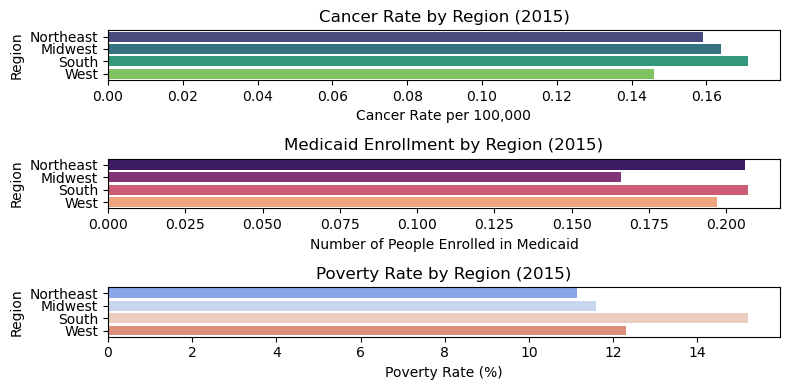

In [ ]:


# Use the provided code structure for the year 2015

# Sample data for 2015 (replace this with actual data)
region_data_2015 = pd.DataFrame({
    'Region': ['Northeast', 'Midwest', 'South', 'West'],
    'Cancer Rate': [0.159, 0.1638, 0.1711, 0.146],
    'Medicaid': [0.206, 0.166, 0.207, 0.197],
    'Poverty Rate': [11.15, 11.6, 15.2, 12.3]
})

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 4))

# Plot 1: Cancer Rate by Region (2015)
sns.barplot(data=region_data_2015, x='Cancer Rate', y='Region', ax=axes[0], palette='viridis')
axes[0].set_title('Cancer Rate by Region (2015)')
axes[0].set_xlabel('Cancer Rate per 100,000')
axes[0].set_ylabel('Region')

# Plot 2: Medicaid Enrollment by Region (2015)
sns.barplot(data=region_data_2015, x='Medicaid', y='Region', ax=axes[1], palette='magma')
axes[1].set_title('Medicaid Enrollment by Region (2015)')
axes[1].set_xlabel('Number of People Enrolled in Medicaid')
axes[1].set_ylabel('Region')

# Plot 3: Poverty Rate by Region (2015)
sns.barplot(data=region_data_2015, x='Poverty Rate', y='Region', ax=axes[2], palette='coolwarm')
axes[2].set_title('Poverty Rate by Region (2015)')
axes[2].set_xlabel('Poverty Rate (%)')
axes[2].set_ylabel('Region')

# Adjust layout for better spacing
plt.tight_layout()



# Display the plot
plt.show()




In [ ]:
# Correlation Between Cancer , Medicaid , and Poverty Rate 

region_data_2015 = region_data_2015.set_index("Region")

region_data_corr = region_data_2015.corr()

region_data_corr

,Cancer Rate,Medicaid,Poverty Rate
Cancer Rate,1.000000,-0.026464,0.532218
Medicaid,-0.026464,1.000000,0.414733
Poverty Rate,0.532218,0.414733,1.000000


In [ ]:
# Find the region with the least cancer rate in 2015

# Calculate the region with the least cancer rate
least_cancer_rate_region_2015 = region_data_2015.loc[region_data_2015['Cancer Rate'].idxmin()]

least_cancer_rate_region_2015

Cancer Rate      0.146
Medicaid         0.197
Poverty Rate    12.300
Name: West, dtype: float64

In [ ]:
# Find the region with the highest cancer rate in 2015

# Calculate the region with the highest cancer rate
least_cancer_rate_region_2015 = region_data_2015.loc[region_data_2015['Cancer Rate'].idxmax()]

least_cancer_rate_region_2015

Cancer Rate      0.1711
Medicaid         0.2070
Poverty Rate    15.2000
Name: South, dtype: float64

In [569]:
combined_df

,Location,Medicaid,Region,Year
0,Alabama,0.201,South,2015
1,Alaska,0.198,West,2015
2,Arizona,0.220,West,2015
3,Arkansas,0.256,South,2015
4,California,0.265,West,2015
...,...,...,...,...
255,Washington,0.198,West,2019
256,West Virginia,0.266,South,2019
257,Wisconsin,0.161,Midwest,2019
258,Wyoming,0.115,West,2019


In [576]:
piviot_medicaid = pd.pivot_table(combined_df,values= 'Medicaid' , index= 'Year', columns= 'Region', aggfunc= 'mean')

piviot_medicaid

Region,Midwest,Northeast,South,West
Year,,,,
2015,0.166167,0.206889,0.207588,0.197231
2016,0.169750,0.210444,0.213059,0.203846
2017,0.165833,0.211778,0.211765,0.203615
2018,0.167333,0.206889,0.211824,0.199462
2019,0.163333,0.204111,0.207765,0.192538


In [578]:
piviot_medicaid_Final = piviot_medicaid.rename(columns={col: f"{col}_Medicaid Rates" for col in piviot_medicaid.columns})

piviot_medicaid_Final

Region,Midwest_Medicaid Rates,Northeast_Medicaid Rates,South_Medicaid Rates,West_Medicaid Rates
Year,,,,
2015,0.166167,0.206889,0.207588,0.197231
2016,0.169750,0.210444,0.213059,0.203846
2017,0.165833,0.211778,0.211765,0.203615
2018,0.167333,0.206889,0.211824,0.199462
2019,0.163333,0.204111,0.207765,0.192538


<Axes: xlabel='Year'>

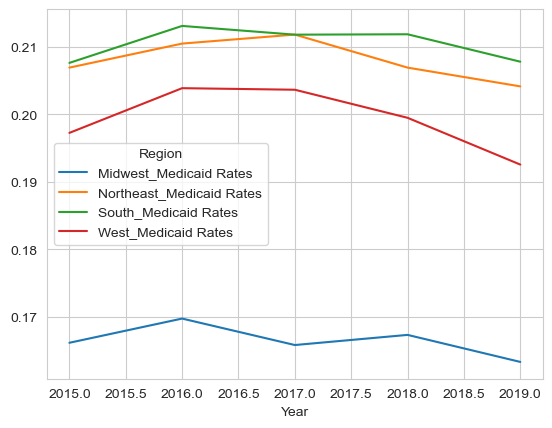

In [579]:
piviot_medicaid_Final.plot()

In [587]:
south_df = piviot_medicaid_Final['South_Medicaid Rates']
south_df.dtypes

for col in south_df.columns:
        south_df[col] = pd.to_numeric(south_df[col], errors= 'coerce')

south_df

AttributeError: 'Series' object has no attribute 'columns'

In [585]:
south_cancer = cancer_data_pivot_final['South_Cancer Rates']

south_cancer.dtypes 





dtype('float64')

In [584]:
south_cancer_medicaid = pd.merge(south_df ,south_cancer, on="Year")

ValueError: You are trying to merge on int64 and object columns for key 'Year'. If you wish to proceed you should use pd.concat

In [590]:
cancer_medicaid_data = pd.concat([south_cancer , south_df])

cancer_medicaid_data

Year
2015    0.171100
2016    0.168447
2017    0.164393
2018    0.161500
2019    0.157673
2015    0.207588
2016    0.213059
2017    0.211765
2018    0.211824
2019    0.207765
dtype: float64

In [570]:
combined_df_group = combined_df.set_index('Region')

combined_df_group = combined_df.groupby(['Region','Location']).mean()
combined_df_group

Medicaid    Year
Region    Location                              
Midwest   Illinois                0.1956  2017.0
          Indiana                 0.1764  2017.0
          Iowa                    0.1894  2017.0
          Kansas                  0.1376  2017.0
          Michigan                0.2236  2017.0
          Minnesota               0.1762  2017.0
          Missouri                0.1474  2017.0
          Nebraska                0.1282  2017.0
          North Dakota            0.1124  2017.0
          Ohio                    0.2080  2017.0
          South Dakota            0.1348  2017.0
          Wisconsin               0.1682  2017.0
Northeast Connecticut             0.2044  2017.0
          Maine                   0.1918  2017.0
          Massachusetts           0.2332  2017.0
          New Hampshire           0.1342  2017.0
          New Jersey              0.1704  2017.0
          New York                0.2608  2017.0
          Pennsylvania            0.1970  2017.0
          Rhode Island            0.2248  2017.0
          Vermont                 0.2556  2017.0
South     Alabama                 0.1996  2017.0
          Arkansas                0.2656  2017.0
          Delaware                0.1992  2017.0
          District of Columbia    0.2726  2017.0
          Florida                 0.1836  2017.0
          Georgia                 0.1756  2017.0
          Kentucky                0.2632  2017.0
          Louisiana               0.2698  2017.0
          Maryland                0.1808  2017.0
          Mississippi             0.2452  2017.0
          North Carolina          0.1834  2017.0
          Oklahoma                0.1762  2017.0
          South Carolina          0.1940  2017.0
          Tennessee               0.2040  2017.0
          Texas                   0.1696  2017.0
          Virginia                0.1218  2017.0
          West Virginia           0.2726  2017.0
West      Alaska                  0.2074  2017.0
          Arizona                 0.2224  2017.0
          California              0.2634  2017.0
          Colorado                0.1872  2017.0
          Hawaii                  0.1762  2017.0
          Idaho                   0.1670  2017.0
          Montana                 0.1940  2017.0
          Nevada                  0.1878  2017.0
          New Mexico              0.3274  2017.0
          Oregon                  0.2260  2017.0
          Utah                    0.1068  2017.0
          Washington              0.2078  2017.0
          Wyoming                 0.1180  2017.0